In [5]:
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
import cv2
import numpy as np

In [6]:
df_guhanzi = pd.read_csv("guhanzi.csv")

In [7]:
df_guhanzi.head()

,character,category,url,filepath
0,一,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E000.svg,hanzi_img/一\jiaguwen-41_E000.jpg
1,一,jinwen,https://img.zdic.net/zy/jinwen/31_E000.svg,hanzi_img/一\jinwen-31_E000.jpg
2,一,chuwenzi,https://img.zdic.net/zy/chuwenzi/51_E00D.svg,hanzi_img/一\chuwenzi-51_E00D.jpg
3,一,xiaozhuan,https://img.zdic.net/zy/xiaozhuan/27_E000.svg,hanzi_img/一\xiaozhuan-27_E000.jpg
4,一,qinwenzi,https://img.zdic.net/zy/qinwenzi/71_E000.svg,hanzi_img/一\qinwenzi-71_E000.jpg


In [12]:
df_jiaguwen = df_guhanzi[df_guhanzi.category == 'xiaozhuan']

In [7]:
df_jiaguwen.shape

(1932, 4)

In [8]:
df_jiaguwen.head()

,character,category,url,filepath
0,一,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E000.svg,hanzi_img/一\jiaguwen-41_E000.jpg
12,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/43_EE62.svg,hanzi_img/乂\jiaguwen-43_EE62.jpg
16,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECB1.svg,hanzi_img/乂\jiaguwen-41_ECB1.jpg
19,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECA8.svg,hanzi_img/乂\jiaguwen-41_ECA8.jpg
20,入,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_E7C5.svg,hanzi_img/入\jiaguwen-42_E7C5.jpg


In [9]:
df_guhanzi.category.unique()

array(['jiaguwen', 'jinwen', 'chuwenzi', 'xiaozhuan', 'qinwenzi', 'tw',
       'kai', 'cn'], dtype=object)

In [10]:
df_jiaguwen.character.unique()

array(['一', '乂', '入', ..., '匕', '九', '乙'], dtype=object)

In [13]:
df_jiaguwen.character.nunique()

5104

In [12]:
character_img = image.load_img(df_jiaguwen.iloc[1]['filepath'], target_size = (64, 64))

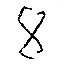

In [13]:
character_img

In [14]:
import matplotlib.pyplot as plt

In [15]:
character_array = image.img_to_array(character_img)

In [16]:
character_array.shape

(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


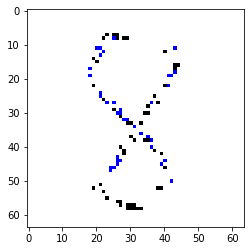

In [17]:
plt.imshow(character_array)

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei']

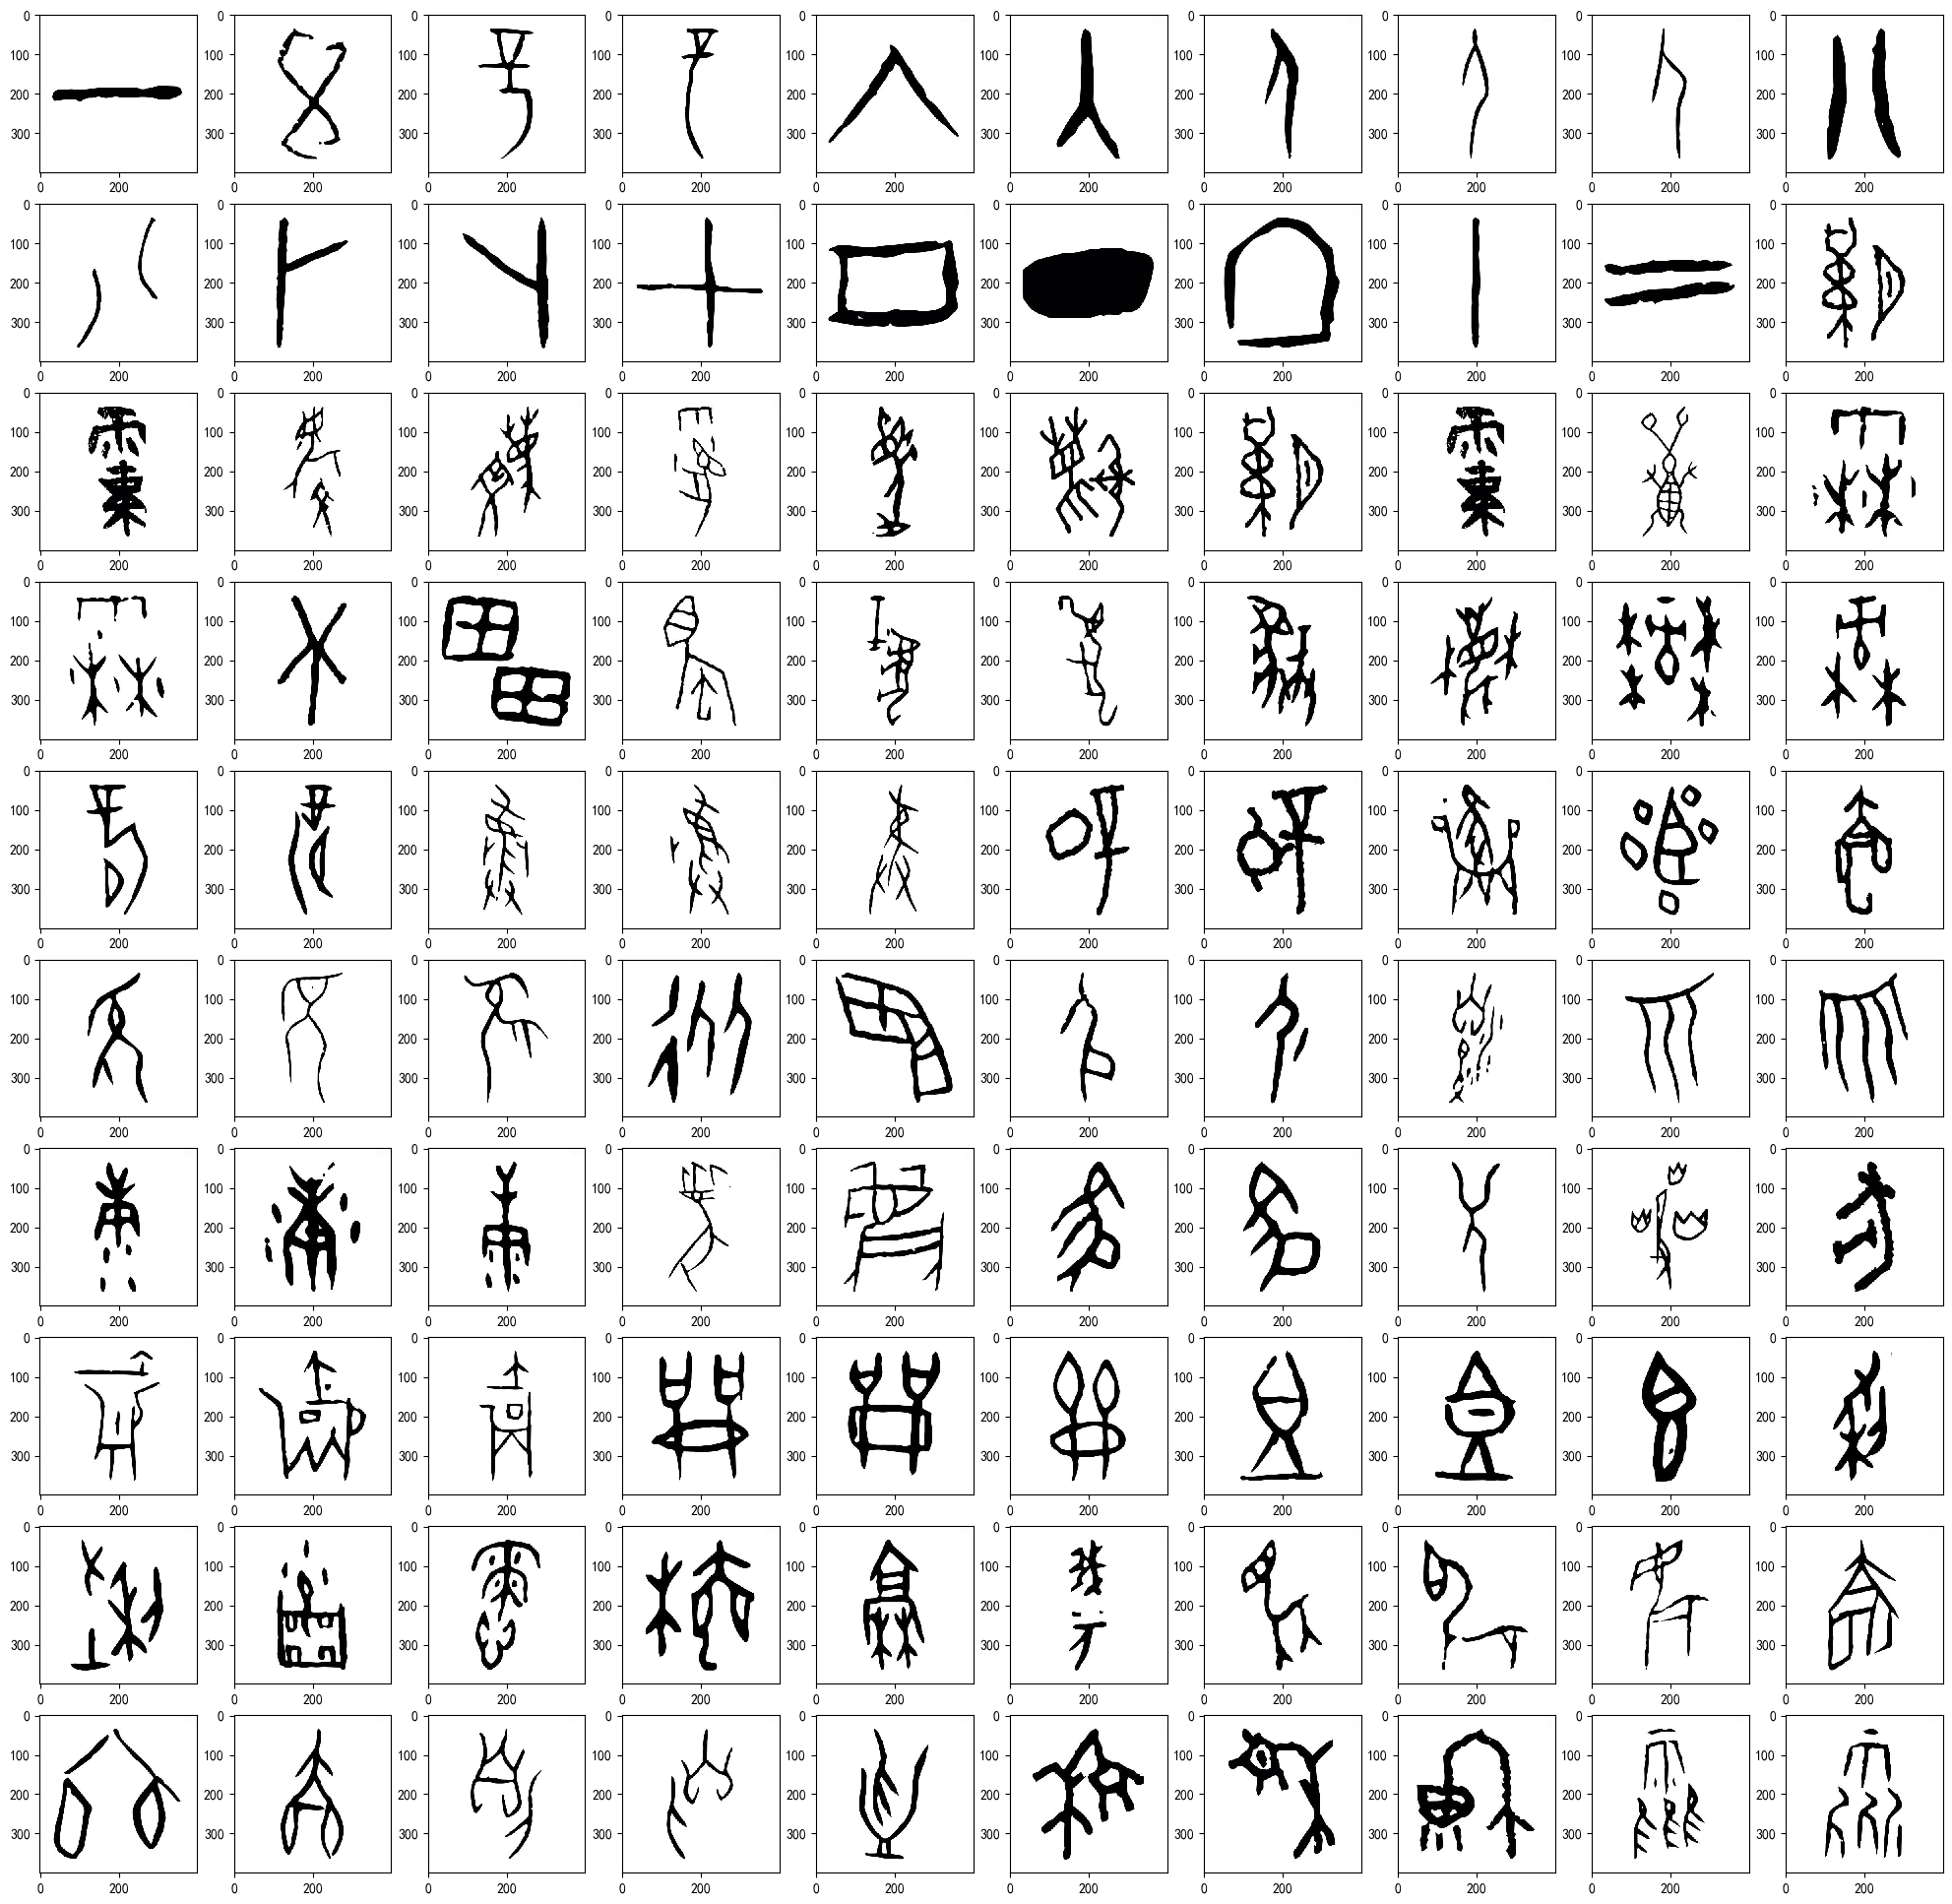

In [25]:
# set up a photo
fig = plt.figure(figsize=(25, 25))

fig.set_dpi(100)

n_rows = 10
n_cols = 10

for i in range(1, n_rows*n_cols+1):
    ax = fig.add_subplot(n_rows, n_cols, i)
    character_img_path = df_jiaguwen.iloc[i-1]['filepath']
    character_img = image.load_img(character_img_path)
    character_img_array = image.img_to_array(character_img)
    character_img_array = character_img_array / 255
    ax.imshow(character_img_array)
    

In [19]:
df_jiaguwen[df_jiaguwen.character == '一']

,character,category,url,filepath
0,一,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E000.svg,hanzi_img/一\jiaguwen-41_E000.jpg


In [20]:
datagen = image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False
    )

In [21]:
import os
for name in ['train','validation','test']:
    if not os.path.exists(name):
        os.mkdir(name)

In [22]:
df_jiaguwen.iloc[0]['filepath'].split('一')[-1][:-4]

'\\jiaguwen-41_E000'

In [105]:
for idx, row in df_jiaguwen.iterrows():
    character = row.character
    filepath = row.filepath
    code = filepath.split('-')[-1][:-4]
    img_char = image.load_img(filepath, target_size = (64, 64))
    arr_char = image.img_to_array(img_char)
    x = np.array([arr_char])
    i = 0
    for batch in datagen.flow(x, batch_size = 1):
        i = i + 1
        if i <= 20:
            dir_name = 'train/{}'.format(character)
        elif i <= 25:
            dir_name = 'validation/{}'.format(character)
        elif i <= 30:
            dir_name = 'test/{}'.format(character)
        else:
            break
            
        if not os.path.exists(dir_name):
            os.mkdir(dir_name)
            
        image_name = "{}/{}-{}.jpg".format(dir_name, code, i)
        
        if not os.path.exists(image_name):
            print(image_name)
            image.save_img(image_name, batch[0])
        else:
            print("{}-{}.jpg is already exist.".format(character, image_name))

C:\Users\jiang\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\jiang\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


一-train/一/41_E000-1.jpg.jpg is already exist.
一-train/一/41_E000-2.jpg.jpg is already exist.
一-train/一/41_E000-3.jpg.jpg is already exist.
一-train/一/41_E000-4.jpg.jpg is already exist.
一-train/一/41_E000-5.jpg.jpg is already exist.
一-train/一/41_E000-6.jpg.jpg is already exist.
一-train/一/41_E000-7.jpg.jpg is already exist.
一-train/一/41_E000-8.jpg.jpg is already exist.
一-train/一/41_E000-9.jpg.jpg is already exist.
一-train/一/41_E000-10.jpg.jpg is already exist.
一-train/一/41_E000-11.jpg.jpg is already exist.
一-train/一/41_E000-12.jpg.jpg is already exist.
一-train/一/41_E000-13.jpg.jpg is already exist.
一-train/一/41_E000-14.jpg.jpg is already exist.
一-train/一/41_E000-15.jpg.jpg is already exist.
一-train/一/41_E000-16.jpg.jpg is already exist.
一-train/一/41_E000-17.jpg.jpg is already exist.
一-train/一/41_E000-18.jpg.jpg is already exist.
一-train/一/41_E000-19.jpg.jpg is already exist.
一-train/一/41_E000-20.jpg.jpg is already exist.
validation/一/41_E000-21.jpg
validation/一/41_E000-22.jpg
validation/一/

人-train/人/42_F47E-6.jpg.jpg is already exist.
人-train/人/42_F47E-7.jpg.jpg is already exist.
人-train/人/42_F47E-8.jpg.jpg is already exist.
人-train/人/42_F47E-9.jpg.jpg is already exist.
人-train/人/42_F47E-10.jpg.jpg is already exist.
人-train/人/42_F47E-11.jpg.jpg is already exist.
人-train/人/42_F47E-12.jpg.jpg is already exist.
人-train/人/42_F47E-13.jpg.jpg is already exist.
人-train/人/42_F47E-14.jpg.jpg is already exist.
人-train/人/42_F47E-15.jpg.jpg is already exist.
人-train/人/42_F47E-16.jpg.jpg is already exist.
人-train/人/42_F47E-17.jpg.jpg is already exist.
人-train/人/42_F47E-18.jpg.jpg is already exist.
人-train/人/42_F47E-19.jpg.jpg is already exist.
人-train/人/42_F47E-20.jpg.jpg is already exist.
validation/人/42_F47E-21.jpg
validation/人/42_F47E-22.jpg
validation/人/42_F47E-23.jpg
validation/人/42_F47E-24.jpg
validation/人/42_F47E-25.jpg
test/人/42_F47E-26.jpg
test/人/42_F47E-27.jpg
test/人/42_F47E-28.jpg
test/人/42_F47E-29.jpg
test/人/42_F47E-30.jpg
人-train/人/42_F47F-1.jpg.jpg is already exist.
人-t

validation/丁/43_F66F-24.jpg
validation/丁/43_F66F-25.jpg
test/丁/43_F66F-26.jpg
test/丁/43_F66F-27.jpg
test/丁/43_F66F-28.jpg
test/丁/43_F66F-29.jpg
test/丁/43_F66F-30.jpg
丁-train/丁/43_F670-1.jpg.jpg is already exist.
丁-train/丁/43_F670-2.jpg.jpg is already exist.
丁-train/丁/43_F670-3.jpg.jpg is already exist.
丁-train/丁/43_F670-4.jpg.jpg is already exist.
丁-train/丁/43_F670-5.jpg.jpg is already exist.
丁-train/丁/43_F670-6.jpg.jpg is already exist.
丁-train/丁/43_F670-7.jpg.jpg is already exist.
丁-train/丁/43_F670-8.jpg.jpg is already exist.
丁-train/丁/43_F670-9.jpg.jpg is already exist.
丁-train/丁/43_F670-10.jpg.jpg is already exist.
丁-train/丁/43_F670-11.jpg.jpg is already exist.
丁-train/丁/43_F670-12.jpg.jpg is already exist.
丁-train/丁/43_F670-13.jpg.jpg is already exist.
丁-train/丁/43_F670-14.jpg.jpg is already exist.
丁-train/丁/43_F670-15.jpg.jpg is already exist.
丁-train/丁/43_F670-16.jpg.jpg is already exist.
丁-train/丁/43_F670-17.jpg.jpg is already exist.
丁-train/丁/43_F670-18.jpg.jpg is already exis

麟-train/麟/43_E418-2.jpg.jpg is already exist.
麟-train/麟/43_E418-3.jpg.jpg is already exist.
麟-train/麟/43_E418-4.jpg.jpg is already exist.
麟-train/麟/43_E418-5.jpg.jpg is already exist.
麟-train/麟/43_E418-6.jpg.jpg is already exist.
麟-train/麟/43_E418-7.jpg.jpg is already exist.
麟-train/麟/43_E418-8.jpg.jpg is already exist.
麟-train/麟/43_E418-9.jpg.jpg is already exist.
麟-train/麟/43_E418-10.jpg.jpg is already exist.
麟-train/麟/43_E418-11.jpg.jpg is already exist.
麟-train/麟/43_E418-12.jpg.jpg is already exist.
麟-train/麟/43_E418-13.jpg.jpg is already exist.
麟-train/麟/43_E418-14.jpg.jpg is already exist.
麟-train/麟/43_E418-15.jpg.jpg is already exist.
麟-train/麟/43_E418-16.jpg.jpg is already exist.
麟-train/麟/43_E418-17.jpg.jpg is already exist.
麟-train/麟/43_E418-18.jpg.jpg is already exist.
麟-train/麟/43_E418-19.jpg.jpg is already exist.
麟-train/麟/43_E418-20.jpg.jpg is already exist.
validation/麟/43_E418-21.jpg
validation/麟/43_E418-22.jpg
validation/麟/43_E418-23.jpg
validation/麟/43_E418-24.jpg
val

霰-train/霰/43_EAA7-12.jpg.jpg is already exist.
霰-train/霰/43_EAA7-13.jpg.jpg is already exist.
霰-train/霰/43_EAA7-14.jpg.jpg is already exist.
霰-train/霰/43_EAA7-15.jpg.jpg is already exist.
霰-train/霰/43_EAA7-16.jpg.jpg is already exist.
霰-train/霰/43_EAA7-17.jpg.jpg is already exist.
霰-train/霰/43_EAA7-18.jpg.jpg is already exist.
霰-train/霰/43_EAA7-19.jpg.jpg is already exist.
霰-train/霰/43_EAA7-20.jpg.jpg is already exist.
validation/霰/43_EAA7-21.jpg
validation/霰/43_EAA7-22.jpg
validation/霰/43_EAA7-23.jpg
validation/霰/43_EAA7-24.jpg
validation/霰/43_EAA7-25.jpg
test/霰/43_EAA7-26.jpg
test/霰/43_EAA7-27.jpg
test/霰/43_EAA7-28.jpg
test/霰/43_EAA7-29.jpg
test/霰/43_EAA7-30.jpg
霰-train/霰/43_EAA8-1.jpg.jpg is already exist.
霰-train/霰/43_EAA8-2.jpg.jpg is already exist.
霰-train/霰/43_EAA8-3.jpg.jpg is already exist.
霰-train/霰/43_EAA8-4.jpg.jpg is already exist.
霰-train/霰/43_EAA8-5.jpg.jpg is already exist.
霰-train/霰/43_EAA8-6.jpg.jpg is already exist.
霰-train/霰/43_EAA8-7.jpg.jpg is already exist.
霰-tra

validation/曝/45_ED93-21.jpg
validation/曝/45_ED93-22.jpg
validation/曝/45_ED93-23.jpg
validation/曝/45_ED93-24.jpg
validation/曝/45_ED93-25.jpg
test/曝/45_ED93-26.jpg
test/曝/45_ED93-27.jpg
test/曝/45_ED93-28.jpg
test/曝/45_ED93-29.jpg
test/曝/45_ED93-30.jpg
麓-train/麓/42_EB5D-1.jpg.jpg is already exist.
麓-train/麓/42_EB5D-2.jpg.jpg is already exist.
麓-train/麓/42_EB5D-3.jpg.jpg is already exist.
麓-train/麓/42_EB5D-4.jpg.jpg is already exist.
麓-train/麓/42_EB5D-5.jpg.jpg is already exist.
麓-train/麓/42_EB5D-6.jpg.jpg is already exist.
麓-train/麓/42_EB5D-7.jpg.jpg is already exist.
麓-train/麓/42_EB5D-8.jpg.jpg is already exist.
麓-train/麓/42_EB5D-9.jpg.jpg is already exist.
麓-train/麓/42_EB5D-10.jpg.jpg is already exist.
麓-train/麓/42_EB5D-11.jpg.jpg is already exist.
麓-train/麓/42_EB5D-12.jpg.jpg is already exist.
麓-train/麓/42_EB5D-13.jpg.jpg is already exist.
麓-train/麓/42_EB5D-14.jpg.jpg is already exist.
麓-train/麓/42_EB5D-15.jpg.jpg is already exist.
麓-train/麓/42_EB5D-16.jpg.jpg is already exist.
麓-train

彝-train/彝/43_F10E-4.jpg.jpg is already exist.
彝-train/彝/43_F10E-5.jpg.jpg is already exist.
彝-train/彝/43_F10E-6.jpg.jpg is already exist.
彝-train/彝/43_F10E-7.jpg.jpg is already exist.
彝-train/彝/43_F10E-8.jpg.jpg is already exist.
彝-train/彝/43_F10E-9.jpg.jpg is already exist.
彝-train/彝/43_F10E-10.jpg.jpg is already exist.
彝-train/彝/43_F10E-11.jpg.jpg is already exist.
彝-train/彝/43_F10E-12.jpg.jpg is already exist.
彝-train/彝/43_F10E-13.jpg.jpg is already exist.
彝-train/彝/43_F10E-14.jpg.jpg is already exist.
彝-train/彝/43_F10E-15.jpg.jpg is already exist.
彝-train/彝/43_F10E-16.jpg.jpg is already exist.
彝-train/彝/43_F10E-17.jpg.jpg is already exist.
彝-train/彝/43_F10E-18.jpg.jpg is already exist.
彝-train/彝/43_F10E-19.jpg.jpg is already exist.
彝-train/彝/43_F10E-20.jpg.jpg is already exist.
validation/彝/43_F10E-21.jpg
validation/彝/43_F10E-22.jpg
validation/彝/43_F10E-23.jpg
validation/彝/43_F10E-24.jpg
validation/彝/43_F10E-25.jpg
test/彝/43_F10E-26.jpg
test/彝/43_F10E-27.jpg
test/彝/43_F10E-28.jpg
t

瞽-train/瞽/42_F6C0-5.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-6.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-7.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-8.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-9.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-10.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-11.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-12.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-13.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-14.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-15.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-16.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-17.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-18.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-19.jpg.jpg is already exist.
瞽-train/瞽/42_F6C0-20.jpg.jpg is already exist.
validation/瞽/42_F6C0-21.jpg
validation/瞽/42_F6C0-22.jpg
validation/瞽/42_F6C0-23.jpg
validation/瞽/42_F6C0-24.jpg
validation/瞽/42_F6C0-25.jpg
test/瞽/42_F6C0-26.jpg
test/瞽/42_F6C0-27.jpg
test/瞽/42_F6C0-28.jpg
test/瞽/42_F6C0-29.jpg
test/瞽/42_F6C0-30.jpg
瞽-t

馘-train/馘/45_F438-5.jpg.jpg is already exist.
馘-train/馘/45_F438-6.jpg.jpg is already exist.
馘-train/馘/45_F438-7.jpg.jpg is already exist.
馘-train/馘/45_F438-8.jpg.jpg is already exist.
馘-train/馘/45_F438-9.jpg.jpg is already exist.
馘-train/馘/45_F438-10.jpg.jpg is already exist.
馘-train/馘/45_F438-11.jpg.jpg is already exist.
馘-train/馘/45_F438-12.jpg.jpg is already exist.
馘-train/馘/45_F438-13.jpg.jpg is already exist.
馘-train/馘/45_F438-14.jpg.jpg is already exist.
馘-train/馘/45_F438-15.jpg.jpg is already exist.
馘-train/馘/45_F438-16.jpg.jpg is already exist.
馘-train/馘/45_F438-17.jpg.jpg is already exist.
馘-train/馘/45_F438-18.jpg.jpg is already exist.
馘-train/馘/45_F438-19.jpg.jpg is already exist.
馘-train/馘/45_F438-20.jpg.jpg is already exist.
validation/馘/45_F438-21.jpg
validation/馘/45_F438-22.jpg
validation/馘/45_F438-23.jpg
validation/馘/45_F438-24.jpg
validation/馘/45_F438-25.jpg
test/馘/45_F438-26.jpg
test/馘/45_F438-27.jpg
test/馘/45_F438-28.jpg
test/馘/45_F438-29.jpg
test/馘/45_F438-30.jpg
馘-t

膺-train/膺/45_E6DB-16.jpg.jpg is already exist.
膺-train/膺/45_E6DB-17.jpg.jpg is already exist.
膺-train/膺/45_E6DB-18.jpg.jpg is already exist.
膺-train/膺/45_E6DB-19.jpg.jpg is already exist.
膺-train/膺/45_E6DB-20.jpg.jpg is already exist.
validation/膺/45_E6DB-21.jpg
validation/膺/45_E6DB-22.jpg
validation/膺/45_E6DB-23.jpg
validation/膺/45_E6DB-24.jpg
validation/膺/45_E6DB-25.jpg
test/膺/45_E6DB-26.jpg
test/膺/45_E6DB-27.jpg
test/膺/45_E6DB-28.jpg
test/膺/45_E6DB-29.jpg
test/膺/45_E6DB-30.jpg
膺-train/膺/45_E6DC-1.jpg.jpg is already exist.
膺-train/膺/45_E6DC-2.jpg.jpg is already exist.
膺-train/膺/45_E6DC-3.jpg.jpg is already exist.
膺-train/膺/45_E6DC-4.jpg.jpg is already exist.
膺-train/膺/45_E6DC-5.jpg.jpg is already exist.
膺-train/膺/45_E6DC-6.jpg.jpg is already exist.
膺-train/膺/45_E6DC-7.jpg.jpg is already exist.
膺-train/膺/45_E6DC-8.jpg.jpg is already exist.
膺-train/膺/45_E6DC-9.jpg.jpg is already exist.
膺-train/膺/45_E6DC-10.jpg.jpg is already exist.
膺-train/膺/45_E6DC-11.jpg.jpg is already exist.
膺-train

test/爵/42_E74F-30.jpg
龠-train/龠/41_EB3A-1.jpg.jpg is already exist.
龠-train/龠/41_EB3A-2.jpg.jpg is already exist.
龠-train/龠/41_EB3A-3.jpg.jpg is already exist.
龠-train/龠/41_EB3A-4.jpg.jpg is already exist.
龠-train/龠/41_EB3A-5.jpg.jpg is already exist.
龠-train/龠/41_EB3A-6.jpg.jpg is already exist.
龠-train/龠/41_EB3A-7.jpg.jpg is already exist.
龠-train/龠/41_EB3A-8.jpg.jpg is already exist.
龠-train/龠/41_EB3A-9.jpg.jpg is already exist.
龠-train/龠/41_EB3A-10.jpg.jpg is already exist.
龠-train/龠/41_EB3A-11.jpg.jpg is already exist.
龠-train/龠/41_EB3A-12.jpg.jpg is already exist.
龠-train/龠/41_EB3A-13.jpg.jpg is already exist.
龠-train/龠/41_EB3A-14.jpg.jpg is already exist.
龠-train/龠/41_EB3A-15.jpg.jpg is already exist.
龠-train/龠/41_EB3A-16.jpg.jpg is already exist.
龠-train/龠/41_EB3A-17.jpg.jpg is already exist.
龠-train/龠/41_EB3A-18.jpg.jpg is already exist.
龠-train/龠/41_EB3A-19.jpg.jpg is already exist.
龠-train/龠/41_EB3A-20.jpg.jpg is already exist.
validation/龠/41_EB3A-21.jpg
validation/龠/41_EB3

穗-train/穗/42_F0DD-3.jpg.jpg is already exist.
穗-train/穗/42_F0DD-4.jpg.jpg is already exist.
穗-train/穗/42_F0DD-5.jpg.jpg is already exist.
穗-train/穗/42_F0DD-6.jpg.jpg is already exist.
穗-train/穗/42_F0DD-7.jpg.jpg is already exist.
穗-train/穗/42_F0DD-8.jpg.jpg is already exist.
穗-train/穗/42_F0DD-9.jpg.jpg is already exist.
穗-train/穗/42_F0DD-10.jpg.jpg is already exist.
穗-train/穗/42_F0DD-11.jpg.jpg is already exist.
穗-train/穗/42_F0DD-12.jpg.jpg is already exist.
穗-train/穗/42_F0DD-13.jpg.jpg is already exist.
穗-train/穗/42_F0DD-14.jpg.jpg is already exist.
穗-train/穗/42_F0DD-15.jpg.jpg is already exist.
穗-train/穗/42_F0DD-16.jpg.jpg is already exist.
穗-train/穗/42_F0DD-17.jpg.jpg is already exist.
穗-train/穗/42_F0DD-18.jpg.jpg is already exist.
穗-train/穗/42_F0DD-19.jpg.jpg is already exist.
穗-train/穗/42_F0DD-20.jpg.jpg is already exist.
validation/穗/42_F0DD-21.jpg
validation/穗/42_F0DD-22.jpg
validation/穗/42_F0DD-23.jpg
validation/穗/42_F0DD-24.jpg
validation/穗/42_F0DD-25.jpg
test/穗/42_F0DD-26.jpg

麇-train/麇/43_E449-17.jpg.jpg is already exist.
麇-train/麇/43_E449-18.jpg.jpg is already exist.
麇-train/麇/43_E449-19.jpg.jpg is already exist.
麇-train/麇/43_E449-20.jpg.jpg is already exist.
validation/麇/43_E449-21.jpg
validation/麇/43_E449-22.jpg
validation/麇/43_E449-23.jpg
validation/麇/43_E449-24.jpg
validation/麇/43_E449-25.jpg
test/麇/43_E449-26.jpg
test/麇/43_E449-27.jpg
test/麇/43_E449-28.jpg
test/麇/43_E449-29.jpg
test/麇/43_E449-30.jpg
麇-train/麇/43_E451-1.jpg.jpg is already exist.
麇-train/麇/43_E451-2.jpg.jpg is already exist.
麇-train/麇/43_E451-3.jpg.jpg is already exist.
麇-train/麇/43_E451-4.jpg.jpg is already exist.
麇-train/麇/43_E451-5.jpg.jpg is already exist.
麇-train/麇/43_E451-6.jpg.jpg is already exist.
麇-train/麇/43_E451-7.jpg.jpg is already exist.
麇-train/麇/43_E451-8.jpg.jpg is already exist.
麇-train/麇/43_E451-9.jpg.jpg is already exist.
麇-train/麇/43_E451-10.jpg.jpg is already exist.
麇-train/麇/43_E451-11.jpg.jpg is already exist.
麇-train/麇/43_E451-12.jpg.jpg is already exist.
麇-train

test/盥/42_E628-27.jpg
test/盥/42_E628-28.jpg
test/盥/42_E628-29.jpg
test/盥/42_E628-30.jpg
穆-train/穆/44_E272-1.jpg.jpg is already exist.
穆-train/穆/44_E272-2.jpg.jpg is already exist.
穆-train/穆/44_E272-3.jpg.jpg is already exist.
穆-train/穆/44_E272-4.jpg.jpg is already exist.
穆-train/穆/44_E272-5.jpg.jpg is already exist.
穆-train/穆/44_E272-6.jpg.jpg is already exist.
穆-train/穆/44_E272-7.jpg.jpg is already exist.
穆-train/穆/44_E272-8.jpg.jpg is already exist.
穆-train/穆/44_E272-9.jpg.jpg is already exist.
穆-train/穆/44_E272-10.jpg.jpg is already exist.
穆-train/穆/44_E272-11.jpg.jpg is already exist.
穆-train/穆/44_E272-12.jpg.jpg is already exist.
穆-train/穆/44_E272-13.jpg.jpg is already exist.
穆-train/穆/44_E272-14.jpg.jpg is already exist.
穆-train/穆/44_E272-15.jpg.jpg is already exist.
穆-train/穆/44_E272-16.jpg.jpg is already exist.
穆-train/穆/44_E272-17.jpg.jpg is already exist.
穆-train/穆/44_E272-18.jpg.jpg is already exist.
穆-train/穆/44_E272-19.jpg.jpg is already exist.
穆-train/穆/44_E272-20.jpg.jpg

橹-train/橹/45_EDD0-1.jpg.jpg is already exist.
橹-train/橹/45_EDD0-2.jpg.jpg is already exist.
橹-train/橹/45_EDD0-3.jpg.jpg is already exist.
橹-train/橹/45_EDD0-4.jpg.jpg is already exist.
橹-train/橹/45_EDD0-5.jpg.jpg is already exist.
橹-train/橹/45_EDD0-6.jpg.jpg is already exist.
橹-train/橹/45_EDD0-7.jpg.jpg is already exist.
橹-train/橹/45_EDD0-8.jpg.jpg is already exist.
橹-train/橹/45_EDD0-9.jpg.jpg is already exist.
橹-train/橹/45_EDD0-10.jpg.jpg is already exist.
橹-train/橹/45_EDD0-11.jpg.jpg is already exist.
橹-train/橹/45_EDD0-12.jpg.jpg is already exist.
橹-train/橹/45_EDD0-13.jpg.jpg is already exist.
橹-train/橹/45_EDD0-14.jpg.jpg is already exist.
橹-train/橹/45_EDD0-15.jpg.jpg is already exist.
橹-train/橹/45_EDD0-16.jpg.jpg is already exist.
橹-train/橹/45_EDD0-17.jpg.jpg is already exist.
橹-train/橹/45_EDD0-18.jpg.jpg is already exist.
橹-train/橹/45_EDD0-19.jpg.jpg is already exist.
橹-train/橹/45_EDD0-20.jpg.jpg is already exist.
validation/橹/45_EDD0-21.jpg
validation/橹/45_EDD0-22.jpg
validation/橹/

磬-train/磬/43_E208-13.jpg.jpg is already exist.
磬-train/磬/43_E208-14.jpg.jpg is already exist.
磬-train/磬/43_E208-15.jpg.jpg is already exist.
磬-train/磬/43_E208-16.jpg.jpg is already exist.
磬-train/磬/43_E208-17.jpg.jpg is already exist.
磬-train/磬/43_E208-18.jpg.jpg is already exist.
磬-train/磬/43_E208-19.jpg.jpg is already exist.
磬-train/磬/43_E208-20.jpg.jpg is already exist.
validation/磬/43_E208-21.jpg
validation/磬/43_E208-22.jpg
validation/磬/43_E208-23.jpg
validation/磬/43_E208-24.jpg
validation/磬/43_E208-25.jpg
test/磬/43_E208-26.jpg
test/磬/43_E208-27.jpg
test/磬/43_E208-28.jpg
test/磬/43_E208-29.jpg
test/磬/43_E208-30.jpg
磬-train/磬/43_E20D-1.jpg.jpg is already exist.
磬-train/磬/43_E20D-2.jpg.jpg is already exist.
磬-train/磬/43_E20D-3.jpg.jpg is already exist.
磬-train/磬/43_E20D-4.jpg.jpg is already exist.
磬-train/磬/43_E20D-5.jpg.jpg is already exist.
磬-train/磬/43_E20D-6.jpg.jpg is already exist.
磬-train/磬/43_E20D-7.jpg.jpg is already exist.
磬-train/磬/43_E20D-8.jpg.jpg is already exist.
磬-trai

test/嬉/43_EE0C-29.jpg
test/嬉/43_EE0C-30.jpg
履-train/履/44_E25A-1.jpg.jpg is already exist.
履-train/履/44_E25A-2.jpg.jpg is already exist.
履-train/履/44_E25A-3.jpg.jpg is already exist.
履-train/履/44_E25A-4.jpg.jpg is already exist.
履-train/履/44_E25A-5.jpg.jpg is already exist.
履-train/履/44_E25A-6.jpg.jpg is already exist.
履-train/履/44_E25A-7.jpg.jpg is already exist.
履-train/履/44_E25A-8.jpg.jpg is already exist.
履-train/履/44_E25A-9.jpg.jpg is already exist.
履-train/履/44_E25A-10.jpg.jpg is already exist.
履-train/履/44_E25A-11.jpg.jpg is already exist.
履-train/履/44_E25A-12.jpg.jpg is already exist.
履-train/履/44_E25A-13.jpg.jpg is already exist.
履-train/履/44_E25A-14.jpg.jpg is already exist.
履-train/履/44_E25A-15.jpg.jpg is already exist.
履-train/履/44_E25A-16.jpg.jpg is already exist.
履-train/履/44_E25A-17.jpg.jpg is already exist.
履-train/履/44_E25A-18.jpg.jpg is already exist.
履-train/履/44_E25A-19.jpg.jpg is already exist.
履-train/履/44_E25A-20.jpg.jpg is already exist.
validation/履/44_E25A-21.j

德-train/德/41_E9A3-12.jpg.jpg is already exist.
德-train/德/41_E9A3-13.jpg.jpg is already exist.
德-train/德/41_E9A3-14.jpg.jpg is already exist.
德-train/德/41_E9A3-15.jpg.jpg is already exist.
德-train/德/41_E9A3-16.jpg.jpg is already exist.
德-train/德/41_E9A3-17.jpg.jpg is already exist.
德-train/德/41_E9A3-18.jpg.jpg is already exist.
德-train/德/41_E9A3-19.jpg.jpg is already exist.
德-train/德/41_E9A3-20.jpg.jpg is already exist.
validation/德/41_E9A3-21.jpg
validation/德/41_E9A3-22.jpg
validation/德/41_E9A3-23.jpg
validation/德/41_E9A3-24.jpg
validation/德/41_E9A3-25.jpg
test/德/41_E9A3-26.jpg
test/德/41_E9A3-27.jpg
test/德/41_E9A3-28.jpg
test/德/41_E9A3-29.jpg
test/德/41_E9A3-30.jpg
稼-train/稼/42_E95F-1.jpg.jpg is already exist.
稼-train/稼/42_E95F-2.jpg.jpg is already exist.
稼-train/稼/42_E95F-3.jpg.jpg is already exist.
稼-train/稼/42_E95F-4.jpg.jpg is already exist.
稼-train/稼/42_E95F-5.jpg.jpg is already exist.
稼-train/稼/42_E95F-6.jpg.jpg is already exist.
稼-train/稼/42_E95F-7.jpg.jpg is already exist.
稼-tra

test/暴/45_F4F9-29.jpg
test/暴/45_F4F9-30.jpg
暴-train/暴/45_ED93-1.jpg.jpg is already exist.
暴-train/暴/45_ED93-2.jpg.jpg is already exist.
暴-train/暴/45_ED93-3.jpg.jpg is already exist.
暴-train/暴/45_ED93-4.jpg.jpg is already exist.
暴-train/暴/45_ED93-5.jpg.jpg is already exist.
暴-train/暴/45_ED93-6.jpg.jpg is already exist.
暴-train/暴/45_ED93-7.jpg.jpg is already exist.
暴-train/暴/45_ED93-8.jpg.jpg is already exist.
暴-train/暴/45_ED93-9.jpg.jpg is already exist.
暴-train/暴/45_ED93-10.jpg.jpg is already exist.
暴-train/暴/45_ED93-11.jpg.jpg is already exist.
暴-train/暴/45_ED93-12.jpg.jpg is already exist.
暴-train/暴/45_ED93-13.jpg.jpg is already exist.
暴-train/暴/45_ED93-14.jpg.jpg is already exist.
暴-train/暴/45_ED93-15.jpg.jpg is already exist.
暴-train/暴/45_ED93-16.jpg.jpg is already exist.
暴-train/暴/45_ED93-17.jpg.jpg is already exist.
暴-train/暴/45_ED93-18.jpg.jpg is already exist.
暴-train/暴/45_ED93-19.jpg.jpg is already exist.
暴-train/暴/45_ED93-20.jpg.jpg is already exist.
validation/暴/45_ED93-21.j

test/隧/43_F4C6-30.jpg
褪-train/褪/42_EA00-1.jpg.jpg is already exist.
褪-train/褪/42_EA00-2.jpg.jpg is already exist.
褪-train/褪/42_EA00-3.jpg.jpg is already exist.
褪-train/褪/42_EA00-4.jpg.jpg is already exist.
褪-train/褪/42_EA00-5.jpg.jpg is already exist.
褪-train/褪/42_EA00-6.jpg.jpg is already exist.
褪-train/褪/42_EA00-7.jpg.jpg is already exist.
褪-train/褪/42_EA00-8.jpg.jpg is already exist.
褪-train/褪/42_EA00-9.jpg.jpg is already exist.
褪-train/褪/42_EA00-10.jpg.jpg is already exist.
褪-train/褪/42_EA00-11.jpg.jpg is already exist.
褪-train/褪/42_EA00-12.jpg.jpg is already exist.
褪-train/褪/42_EA00-13.jpg.jpg is already exist.
褪-train/褪/42_EA00-14.jpg.jpg is already exist.
褪-train/褪/42_EA00-15.jpg.jpg is already exist.
褪-train/褪/42_EA00-16.jpg.jpg is already exist.
褪-train/褪/42_EA00-17.jpg.jpg is already exist.
褪-train/褪/42_EA00-18.jpg.jpg is already exist.
褪-train/褪/42_EA00-19.jpg.jpg is already exist.
褪-train/褪/42_EA00-20.jpg.jpg is already exist.
validation/褪/42_EA00-21.jpg
validation/褪/42_EA0

膏-train/膏/42_E234-1.jpg.jpg is already exist.
膏-train/膏/42_E234-2.jpg.jpg is already exist.
膏-train/膏/42_E234-3.jpg.jpg is already exist.
膏-train/膏/42_E234-4.jpg.jpg is already exist.
膏-train/膏/42_E234-5.jpg.jpg is already exist.
膏-train/膏/42_E234-6.jpg.jpg is already exist.
膏-train/膏/42_E234-7.jpg.jpg is already exist.
膏-train/膏/42_E234-8.jpg.jpg is already exist.
膏-train/膏/42_E234-9.jpg.jpg is already exist.
膏-train/膏/42_E234-10.jpg.jpg is already exist.
膏-train/膏/42_E234-11.jpg.jpg is already exist.
膏-train/膏/42_E234-12.jpg.jpg is already exist.
膏-train/膏/42_E234-13.jpg.jpg is already exist.
膏-train/膏/42_E234-14.jpg.jpg is already exist.
膏-train/膏/42_E234-15.jpg.jpg is already exist.
膏-train/膏/42_E234-16.jpg.jpg is already exist.
膏-train/膏/42_E234-17.jpg.jpg is already exist.
膏-train/膏/42_E234-18.jpg.jpg is already exist.
膏-train/膏/42_E234-19.jpg.jpg is already exist.
膏-train/膏/42_E234-20.jpg.jpg is already exist.
validation/膏/42_E234-21.jpg
validation/膏/42_E234-22.jpg
validation/膏/

鼻-train/鼻/41_F554-1.jpg.jpg is already exist.
鼻-train/鼻/41_F554-2.jpg.jpg is already exist.
鼻-train/鼻/41_F554-3.jpg.jpg is already exist.
鼻-train/鼻/41_F554-4.jpg.jpg is already exist.
鼻-train/鼻/41_F554-5.jpg.jpg is already exist.
鼻-train/鼻/41_F554-6.jpg.jpg is already exist.
鼻-train/鼻/41_F554-7.jpg.jpg is already exist.
鼻-train/鼻/41_F554-8.jpg.jpg is already exist.
鼻-train/鼻/41_F554-9.jpg.jpg is already exist.
鼻-train/鼻/41_F554-10.jpg.jpg is already exist.
鼻-train/鼻/41_F554-11.jpg.jpg is already exist.
鼻-train/鼻/41_F554-12.jpg.jpg is already exist.
鼻-train/鼻/41_F554-13.jpg.jpg is already exist.
鼻-train/鼻/41_F554-14.jpg.jpg is already exist.
鼻-train/鼻/41_F554-15.jpg.jpg is already exist.
鼻-train/鼻/41_F554-16.jpg.jpg is already exist.
鼻-train/鼻/41_F554-17.jpg.jpg is already exist.
鼻-train/鼻/41_F554-18.jpg.jpg is already exist.
鼻-train/鼻/41_F554-19.jpg.jpg is already exist.
鼻-train/鼻/41_F554-20.jpg.jpg is already exist.
validation/鼻/41_F554-21.jpg
validation/鼻/41_F554-22.jpg
validation/鼻/

test/箕/42_E2DF-30.jpg
犒-train/犒/42_EA85-1.jpg.jpg is already exist.
犒-train/犒/42_EA85-2.jpg.jpg is already exist.
犒-train/犒/42_EA85-3.jpg.jpg is already exist.
犒-train/犒/42_EA85-4.jpg.jpg is already exist.
犒-train/犒/42_EA85-5.jpg.jpg is already exist.
犒-train/犒/42_EA85-6.jpg.jpg is already exist.
犒-train/犒/42_EA85-7.jpg.jpg is already exist.
犒-train/犒/42_EA85-8.jpg.jpg is already exist.
犒-train/犒/42_EA85-9.jpg.jpg is already exist.
犒-train/犒/42_EA85-10.jpg.jpg is already exist.
犒-train/犒/42_EA85-11.jpg.jpg is already exist.
犒-train/犒/42_EA85-12.jpg.jpg is already exist.
犒-train/犒/42_EA85-13.jpg.jpg is already exist.
犒-train/犒/42_EA85-14.jpg.jpg is already exist.
犒-train/犒/42_EA85-15.jpg.jpg is already exist.
犒-train/犒/42_EA85-16.jpg.jpg is already exist.
犒-train/犒/42_EA85-17.jpg.jpg is already exist.
犒-train/犒/42_EA85-18.jpg.jpg is already exist.
犒-train/犒/42_EA85-19.jpg.jpg is already exist.
犒-train/犒/42_EA85-20.jpg.jpg is already exist.
validation/犒/42_EA85-21.jpg
validation/犒/42_EA8

墅-train/墅/43_F30D-3.jpg.jpg is already exist.
墅-train/墅/43_F30D-4.jpg.jpg is already exist.
墅-train/墅/43_F30D-5.jpg.jpg is already exist.
墅-train/墅/43_F30D-6.jpg.jpg is already exist.
墅-train/墅/43_F30D-7.jpg.jpg is already exist.
墅-train/墅/43_F30D-8.jpg.jpg is already exist.
墅-train/墅/43_F30D-9.jpg.jpg is already exist.
墅-train/墅/43_F30D-10.jpg.jpg is already exist.
墅-train/墅/43_F30D-11.jpg.jpg is already exist.
墅-train/墅/43_F30D-12.jpg.jpg is already exist.
墅-train/墅/43_F30D-13.jpg.jpg is already exist.
墅-train/墅/43_F30D-14.jpg.jpg is already exist.
墅-train/墅/43_F30D-15.jpg.jpg is already exist.
墅-train/墅/43_F30D-16.jpg.jpg is already exist.
墅-train/墅/43_F30D-17.jpg.jpg is already exist.
墅-train/墅/43_F30D-18.jpg.jpg is already exist.
墅-train/墅/43_F30D-19.jpg.jpg is already exist.
墅-train/墅/43_F30D-20.jpg.jpg is already exist.
validation/墅/43_F30D-21.jpg
validation/墅/43_F30D-22.jpg
validation/墅/43_F30D-23.jpg
validation/墅/43_F30D-24.jpg
validation/墅/43_F30D-25.jpg
test/墅/43_F30D-26.jpg

validation/辟/43_E13C-22.jpg
validation/辟/43_E13C-23.jpg
validation/辟/43_E13C-24.jpg
validation/辟/43_E13C-25.jpg
test/辟/43_E13C-26.jpg
test/辟/43_E13C-27.jpg
test/辟/43_E13C-28.jpg
test/辟/43_E13C-29.jpg
test/辟/43_E13C-30.jpg
辟-train/辟/43_E131-1.jpg.jpg is already exist.
辟-train/辟/43_E131-2.jpg.jpg is already exist.
辟-train/辟/43_E131-3.jpg.jpg is already exist.
辟-train/辟/43_E131-4.jpg.jpg is already exist.
辟-train/辟/43_E131-5.jpg.jpg is already exist.
辟-train/辟/43_E131-6.jpg.jpg is already exist.
辟-train/辟/43_E131-7.jpg.jpg is already exist.
辟-train/辟/43_E131-8.jpg.jpg is already exist.
辟-train/辟/43_E131-9.jpg.jpg is already exist.
辟-train/辟/43_E131-10.jpg.jpg is already exist.
辟-train/辟/43_E131-11.jpg.jpg is already exist.
辟-train/辟/43_E131-12.jpg.jpg is already exist.
辟-train/辟/43_E131-13.jpg.jpg is already exist.
辟-train/辟/43_E131-14.jpg.jpg is already exist.
辟-train/辟/43_E131-15.jpg.jpg is already exist.
辟-train/辟/43_E131-16.jpg.jpg is already exist.
辟-train/辟/43_E131-17.jpg.jpg is alr

雍-train/雍/41_F764-4.jpg.jpg is already exist.
雍-train/雍/41_F764-5.jpg.jpg is already exist.
雍-train/雍/41_F764-6.jpg.jpg is already exist.
雍-train/雍/41_F764-7.jpg.jpg is already exist.
雍-train/雍/41_F764-8.jpg.jpg is already exist.
雍-train/雍/41_F764-9.jpg.jpg is already exist.
雍-train/雍/41_F764-10.jpg.jpg is already exist.
雍-train/雍/41_F764-11.jpg.jpg is already exist.
雍-train/雍/41_F764-12.jpg.jpg is already exist.
雍-train/雍/41_F764-13.jpg.jpg is already exist.
雍-train/雍/41_F764-14.jpg.jpg is already exist.
雍-train/雍/41_F764-15.jpg.jpg is already exist.
雍-train/雍/41_F764-16.jpg.jpg is already exist.
雍-train/雍/41_F764-17.jpg.jpg is already exist.
雍-train/雍/41_F764-18.jpg.jpg is already exist.
雍-train/雍/41_F764-19.jpg.jpg is already exist.
雍-train/雍/41_F764-20.jpg.jpg is already exist.
validation/雍/41_F764-21.jpg
validation/雍/41_F764-22.jpg
validation/雍/41_F764-23.jpg
validation/雍/41_F764-24.jpg
validation/雍/41_F764-25.jpg
test/雍/41_F764-26.jpg
test/雍/41_F764-27.jpg
test/雍/41_F764-28.jpg
t

肄-train/肄/41_F069-4.jpg.jpg is already exist.
肄-train/肄/41_F069-5.jpg.jpg is already exist.
肄-train/肄/41_F069-6.jpg.jpg is already exist.
肄-train/肄/41_F069-7.jpg.jpg is already exist.
肄-train/肄/41_F069-8.jpg.jpg is already exist.
肄-train/肄/41_F069-9.jpg.jpg is already exist.
肄-train/肄/41_F069-10.jpg.jpg is already exist.
肄-train/肄/41_F069-11.jpg.jpg is already exist.
肄-train/肄/41_F069-12.jpg.jpg is already exist.
肄-train/肄/41_F069-13.jpg.jpg is already exist.
肄-train/肄/41_F069-14.jpg.jpg is already exist.
肄-train/肄/41_F069-15.jpg.jpg is already exist.
肄-train/肄/41_F069-16.jpg.jpg is already exist.
肄-train/肄/41_F069-17.jpg.jpg is already exist.
肄-train/肄/41_F069-18.jpg.jpg is already exist.
肄-train/肄/41_F069-19.jpg.jpg is already exist.
肄-train/肄/41_F069-20.jpg.jpg is already exist.
validation/肄/41_F069-21.jpg
validation/肄/41_F069-22.jpg
validation/肄/41_F069-23.jpg
validation/肄/41_F069-24.jpg
validation/肄/41_F069-25.jpg
test/肄/41_F069-26.jpg
test/肄/41_F069-27.jpg
test/肄/41_F069-28.jpg
t

鼠-train/鼠/45_EE29-5.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-6.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-7.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-8.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-9.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-10.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-11.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-12.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-13.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-14.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-15.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-16.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-17.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-18.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-19.jpg.jpg is already exist.
鼠-train/鼠/45_EE29-20.jpg.jpg is already exist.
validation/鼠/45_EE29-21.jpg
validation/鼠/45_EE29-22.jpg
validation/鼠/45_EE29-23.jpg
validation/鼠/45_EE29-24.jpg
validation/鼠/45_EE29-25.jpg
test/鼠/45_EE29-26.jpg
test/鼠/45_EE29-27.jpg
test/鼠/45_EE29-28.jpg
test/鼠/45_EE29-29.jpg
test/鼠/45_EE29-30.jpg
雉-t

置-train/置/41_E798-17.jpg.jpg is already exist.
置-train/置/41_E798-18.jpg.jpg is already exist.
置-train/置/41_E798-19.jpg.jpg is already exist.
置-train/置/41_E798-20.jpg.jpg is already exist.
validation/置/41_E798-21.jpg
validation/置/41_E798-22.jpg
validation/置/41_E798-23.jpg
validation/置/41_E798-24.jpg
validation/置/41_E798-25.jpg
test/置/41_E798-26.jpg
test/置/41_E798-27.jpg
test/置/41_E798-28.jpg
test/置/41_E798-29.jpg
test/置/41_E798-30.jpg
置-train/置/41_ED8B-1.jpg.jpg is already exist.
置-train/置/41_ED8B-2.jpg.jpg is already exist.
置-train/置/41_ED8B-3.jpg.jpg is already exist.
置-train/置/41_ED8B-4.jpg.jpg is already exist.
置-train/置/41_ED8B-5.jpg.jpg is already exist.
置-train/置/41_ED8B-6.jpg.jpg is already exist.
置-train/置/41_ED8B-7.jpg.jpg is already exist.
置-train/置/41_ED8B-8.jpg.jpg is already exist.
置-train/置/41_ED8B-9.jpg.jpg is already exist.
置-train/置/41_ED8B-10.jpg.jpg is already exist.
置-train/置/41_ED8B-11.jpg.jpg is already exist.
置-train/置/41_ED8B-12.jpg.jpg is already exist.
置-train

validation/盟/42_E613-23.jpg
validation/盟/42_E613-24.jpg
validation/盟/42_E613-25.jpg
test/盟/42_E613-26.jpg
test/盟/42_E613-27.jpg
test/盟/42_E613-28.jpg
test/盟/42_E613-29.jpg
test/盟/42_E613-30.jpg
鄙-train/鄙/42_E951-1.jpg.jpg is already exist.
鄙-train/鄙/42_E951-2.jpg.jpg is already exist.
鄙-train/鄙/42_E951-3.jpg.jpg is already exist.
鄙-train/鄙/42_E951-4.jpg.jpg is already exist.
鄙-train/鄙/42_E951-5.jpg.jpg is already exist.
鄙-train/鄙/42_E951-6.jpg.jpg is already exist.
鄙-train/鄙/42_E951-7.jpg.jpg is already exist.
鄙-train/鄙/42_E951-8.jpg.jpg is already exist.
鄙-train/鄙/42_E951-9.jpg.jpg is already exist.
鄙-train/鄙/42_E951-10.jpg.jpg is already exist.
鄙-train/鄙/42_E951-11.jpg.jpg is already exist.
鄙-train/鄙/42_E951-12.jpg.jpg is already exist.
鄙-train/鄙/42_E951-13.jpg.jpg is already exist.
鄙-train/鄙/42_E951-14.jpg.jpg is already exist.
鄙-train/鄙/42_E951-15.jpg.jpg is already exist.
鄙-train/鄙/42_E951-16.jpg.jpg is already exist.
鄙-train/鄙/42_E951-17.jpg.jpg is already exist.
鄙-train/鄙/42_E95

雷-train/雷/43_EA85-12.jpg.jpg is already exist.
雷-train/雷/43_EA85-13.jpg.jpg is already exist.
雷-train/雷/43_EA85-14.jpg.jpg is already exist.
雷-train/雷/43_EA85-15.jpg.jpg is already exist.
雷-train/雷/43_EA85-16.jpg.jpg is already exist.
雷-train/雷/43_EA85-17.jpg.jpg is already exist.
雷-train/雷/43_EA85-18.jpg.jpg is already exist.
雷-train/雷/43_EA85-19.jpg.jpg is already exist.
雷-train/雷/43_EA85-20.jpg.jpg is already exist.
validation/雷/43_EA85-21.jpg
validation/雷/43_EA85-22.jpg
validation/雷/43_EA85-23.jpg
validation/雷/43_EA85-24.jpg
validation/雷/43_EA85-25.jpg
test/雷/43_EA85-26.jpg
test/雷/43_EA85-27.jpg
test/雷/43_EA85-28.jpg
test/雷/43_EA85-29.jpg
test/雷/43_EA85-30.jpg
雷-train/雷/43_EA8B-1.jpg.jpg is already exist.
雷-train/雷/43_EA8B-2.jpg.jpg is already exist.
雷-train/雷/43_EA8B-3.jpg.jpg is already exist.
雷-train/雷/43_EA8B-4.jpg.jpg is already exist.
雷-train/雷/43_EA8B-5.jpg.jpg is already exist.
雷-train/雷/43_EA8B-6.jpg.jpg is already exist.
雷-train/雷/43_EA8B-7.jpg.jpg is already exist.
雷-tra

test/蒿/41_E30E-27.jpg
test/蒿/41_E30E-28.jpg
test/蒿/41_E30E-29.jpg
test/蒿/41_E30E-30.jpg
蒿-train/蒿/41_E30F-1.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-2.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-3.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-4.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-5.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-6.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-7.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-8.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-9.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-10.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-11.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-12.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-13.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-14.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-15.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-16.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-17.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-18.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-19.jpg.jpg is already exist.
蒿-train/蒿/41_E30F-20.jpg.jpg

鼓-train/鼓/42_E52C-8.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-9.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-10.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-11.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-12.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-13.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-14.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-15.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-16.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-17.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-18.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-19.jpg.jpg is already exist.
鼓-train/鼓/42_E52C-20.jpg.jpg is already exist.
validation/鼓/42_E52C-21.jpg
validation/鼓/42_E52C-22.jpg
validation/鼓/42_E52C-23.jpg
validation/鼓/42_E52C-24.jpg
validation/鼓/42_E52C-25.jpg
test/鼓/42_E52C-26.jpg
test/鼓/42_E52C-27.jpg
test/鼓/42_E52C-28.jpg
test/鼓/42_E52C-29.jpg
test/鼓/42_E52C-30.jpg
遘-train/遘/41_E89E-1.jpg.jpg is already exist.
遘-train/遘/41_E89E-2.jpg.jpg is already exist.
遘-train/遘/41_E89E-3.jpg.jpg is already exist.
遘-t

validation/彘/43_E2F7-23.jpg
validation/彘/43_E2F7-24.jpg
validation/彘/43_E2F7-25.jpg
test/彘/43_E2F7-26.jpg
test/彘/43_E2F7-27.jpg
test/彘/43_E2F7-28.jpg
test/彘/43_E2F7-29.jpg
test/彘/43_E2F7-30.jpg
登-train/登/41_E7B3-1.jpg.jpg is already exist.
登-train/登/41_E7B3-2.jpg.jpg is already exist.
登-train/登/41_E7B3-3.jpg.jpg is already exist.
登-train/登/41_E7B3-4.jpg.jpg is already exist.
登-train/登/41_E7B3-5.jpg.jpg is already exist.
登-train/登/41_E7B3-6.jpg.jpg is already exist.
登-train/登/41_E7B3-7.jpg.jpg is already exist.
登-train/登/41_E7B3-8.jpg.jpg is already exist.
登-train/登/41_E7B3-9.jpg.jpg is already exist.
登-train/登/41_E7B3-10.jpg.jpg is already exist.
登-train/登/41_E7B3-11.jpg.jpg is already exist.
登-train/登/41_E7B3-12.jpg.jpg is already exist.
登-train/登/41_E7B3-13.jpg.jpg is already exist.
登-train/登/41_E7B3-14.jpg.jpg is already exist.
登-train/登/41_E7B3-15.jpg.jpg is already exist.
登-train/登/41_E7B3-16.jpg.jpg is already exist.
登-train/登/41_E7B3-17.jpg.jpg is already exist.
登-train/登/41_E7B

validation/祼/41_E0CC-24.jpg
validation/祼/41_E0CC-25.jpg
test/祼/41_E0CC-26.jpg
test/祼/41_E0CC-27.jpg
test/祼/41_E0CC-28.jpg
test/祼/41_E0CC-29.jpg
test/祼/41_E0CC-30.jpg
祼-train/祼/41_E0CE-1.jpg.jpg is already exist.
祼-train/祼/41_E0CE-2.jpg.jpg is already exist.
祼-train/祼/41_E0CE-3.jpg.jpg is already exist.
祼-train/祼/41_E0CE-4.jpg.jpg is already exist.
祼-train/祼/41_E0CE-5.jpg.jpg is already exist.
祼-train/祼/41_E0CE-6.jpg.jpg is already exist.
祼-train/祼/41_E0CE-7.jpg.jpg is already exist.
祼-train/祼/41_E0CE-8.jpg.jpg is already exist.
祼-train/祼/41_E0CE-9.jpg.jpg is already exist.
祼-train/祼/41_E0CE-10.jpg.jpg is already exist.
祼-train/祼/41_E0CE-11.jpg.jpg is already exist.
祼-train/祼/41_E0CE-12.jpg.jpg is already exist.
祼-train/祼/41_E0CE-13.jpg.jpg is already exist.
祼-train/祼/41_E0CE-14.jpg.jpg is already exist.
祼-train/祼/41_E0CE-15.jpg.jpg is already exist.
祼-train/祼/41_E0CE-16.jpg.jpg is already exist.
祼-train/祼/41_E0CE-17.jpg.jpg is already exist.
祼-train/祼/41_E0CE-18.jpg.jpg is already exis

温-train/温/45_E7F7-1.jpg.jpg is already exist.
温-train/温/45_E7F7-2.jpg.jpg is already exist.
温-train/温/45_E7F7-3.jpg.jpg is already exist.
温-train/温/45_E7F7-4.jpg.jpg is already exist.
温-train/温/45_E7F7-5.jpg.jpg is already exist.
温-train/温/45_E7F7-6.jpg.jpg is already exist.
温-train/温/45_E7F7-7.jpg.jpg is already exist.
温-train/温/45_E7F7-8.jpg.jpg is already exist.
温-train/温/45_E7F7-9.jpg.jpg is already exist.
温-train/温/45_E7F7-10.jpg.jpg is already exist.
温-train/温/45_E7F7-11.jpg.jpg is already exist.
温-train/温/45_E7F7-12.jpg.jpg is already exist.
温-train/温/45_E7F7-13.jpg.jpg is already exist.
温-train/温/45_E7F7-14.jpg.jpg is already exist.
温-train/温/45_E7F7-15.jpg.jpg is already exist.
温-train/温/45_E7F7-16.jpg.jpg is already exist.
温-train/温/45_E7F7-17.jpg.jpg is already exist.
温-train/温/45_E7F7-18.jpg.jpg is already exist.
温-train/温/45_E7F7-19.jpg.jpg is already exist.
温-train/温/45_E7F7-20.jpg.jpg is already exist.
validation/温/45_E7F7-21.jpg
validation/温/45_E7F7-22.jpg
validation/温/

尊-train/尊/44_E1B1-11.jpg.jpg is already exist.
尊-train/尊/44_E1B1-12.jpg.jpg is already exist.
尊-train/尊/44_E1B1-13.jpg.jpg is already exist.
尊-train/尊/44_E1B1-14.jpg.jpg is already exist.
尊-train/尊/44_E1B1-15.jpg.jpg is already exist.
尊-train/尊/44_E1B1-16.jpg.jpg is already exist.
尊-train/尊/44_E1B1-17.jpg.jpg is already exist.
尊-train/尊/44_E1B1-18.jpg.jpg is already exist.
尊-train/尊/44_E1B1-19.jpg.jpg is already exist.
尊-train/尊/44_E1B1-20.jpg.jpg is already exist.
validation/尊/44_E1B1-21.jpg
validation/尊/44_E1B1-22.jpg
validation/尊/44_E1B1-23.jpg
validation/尊/44_E1B1-24.jpg
validation/尊/44_E1B1-25.jpg
test/尊/44_E1B1-26.jpg
test/尊/44_E1B1-27.jpg
test/尊/44_E1B1-28.jpg
test/尊/44_E1B1-29.jpg
test/尊/44_E1B1-30.jpg
粪-train/粪/42_E2F8-1.jpg.jpg is already exist.
粪-train/粪/42_E2F8-2.jpg.jpg is already exist.
粪-train/粪/42_E2F8-3.jpg.jpg is already exist.
粪-train/粪/42_E2F8-4.jpg.jpg is already exist.
粪-train/粪/42_E2F8-5.jpg.jpg is already exist.
粪-train/粪/42_E2F8-6.jpg.jpg is already exist.
粪-tr

validation/痘/42_E531-21.jpg
validation/痘/42_E531-22.jpg
validation/痘/42_E531-23.jpg
validation/痘/42_E531-24.jpg
validation/痘/42_E531-25.jpg
test/痘/42_E531-26.jpg
test/痘/42_E531-27.jpg
test/痘/42_E531-28.jpg
test/痘/42_E531-29.jpg
test/痘/42_E531-30.jpg
痘-train/痘/42_E52F-1.jpg.jpg is already exist.
痘-train/痘/42_E52F-2.jpg.jpg is already exist.
痘-train/痘/42_E52F-3.jpg.jpg is already exist.
痘-train/痘/42_E52F-4.jpg.jpg is already exist.
痘-train/痘/42_E52F-5.jpg.jpg is already exist.
痘-train/痘/42_E52F-6.jpg.jpg is already exist.
痘-train/痘/42_E52F-7.jpg.jpg is already exist.
痘-train/痘/42_E52F-8.jpg.jpg is already exist.
痘-train/痘/42_E52F-9.jpg.jpg is already exist.
痘-train/痘/42_E52F-10.jpg.jpg is already exist.
痘-train/痘/42_E52F-11.jpg.jpg is already exist.
痘-train/痘/42_E52F-12.jpg.jpg is already exist.
痘-train/痘/42_E52F-13.jpg.jpg is already exist.
痘-train/痘/42_E52F-14.jpg.jpg is already exist.
痘-train/痘/42_E52F-15.jpg.jpg is already exist.
痘-train/痘/42_E52F-16.jpg.jpg is already exist.
痘-train

validation/腊/42_EDC4-25.jpg
test/腊/42_EDC4-26.jpg
test/腊/42_EDC4-27.jpg
test/腊/42_EDC4-28.jpg
test/腊/42_EDC4-29.jpg
test/腊/42_EDC4-30.jpg
腊-train/腊/42_EDC7-1.jpg.jpg is already exist.
腊-train/腊/42_EDC7-2.jpg.jpg is already exist.
腊-train/腊/42_EDC7-3.jpg.jpg is already exist.
腊-train/腊/42_EDC7-4.jpg.jpg is already exist.
腊-train/腊/42_EDC7-5.jpg.jpg is already exist.
腊-train/腊/42_EDC7-6.jpg.jpg is already exist.
腊-train/腊/42_EDC7-7.jpg.jpg is already exist.
腊-train/腊/42_EDC7-8.jpg.jpg is already exist.
腊-train/腊/42_EDC7-9.jpg.jpg is already exist.
腊-train/腊/42_EDC7-10.jpg.jpg is already exist.
腊-train/腊/42_EDC7-11.jpg.jpg is already exist.
腊-train/腊/42_EDC7-12.jpg.jpg is already exist.
腊-train/腊/42_EDC7-13.jpg.jpg is already exist.
腊-train/腊/42_EDC7-14.jpg.jpg is already exist.
腊-train/腊/42_EDC7-15.jpg.jpg is already exist.
腊-train/腊/42_EDC7-16.jpg.jpg is already exist.
腊-train/腊/42_EDC7-17.jpg.jpg is already exist.
腊-train/腊/42_EDC7-18.jpg.jpg is already exist.
腊-train/腊/42_EDC7-19.jpg.

御-train/御/41_E9E4-16.jpg.jpg is already exist.
御-train/御/41_E9E4-17.jpg.jpg is already exist.
御-train/御/41_E9E4-18.jpg.jpg is already exist.
御-train/御/41_E9E4-19.jpg.jpg is already exist.
御-train/御/41_E9E4-20.jpg.jpg is already exist.
validation/御/41_E9E4-21.jpg
validation/御/41_E9E4-22.jpg
validation/御/41_E9E4-23.jpg
validation/御/41_E9E4-24.jpg
validation/御/41_E9E4-25.jpg
test/御/41_E9E4-26.jpg
test/御/41_E9E4-27.jpg
test/御/41_E9E4-28.jpg
test/御/41_E9E4-29.jpg
test/御/41_E9E4-30.jpg
街-train/街/45_E3CE-1.jpg.jpg is already exist.
街-train/街/45_E3CE-2.jpg.jpg is already exist.
街-train/街/45_E3CE-3.jpg.jpg is already exist.
街-train/街/45_E3CE-4.jpg.jpg is already exist.
街-train/街/45_E3CE-5.jpg.jpg is already exist.
街-train/街/45_E3CE-6.jpg.jpg is already exist.
街-train/街/45_E3CE-7.jpg.jpg is already exist.
街-train/街/45_E3CE-8.jpg.jpg is already exist.
街-train/街/45_E3CE-9.jpg.jpg is already exist.
街-train/街/45_E3CE-10.jpg.jpg is already exist.
街-train/街/45_E3CE-11.jpg.jpg is already exist.
街-train

集-train/集/42_E069-19.jpg.jpg is already exist.
集-train/集/42_E069-20.jpg.jpg is already exist.
validation/集/42_E069-21.jpg
validation/集/42_E069-22.jpg
validation/集/42_E069-23.jpg
validation/集/42_E069-24.jpg
validation/集/42_E069-25.jpg
test/集/42_E069-26.jpg
test/集/42_E069-27.jpg
test/集/42_E069-28.jpg
test/集/42_E069-29.jpg
test/集/42_E069-30.jpg
集-train/集/42_E06C-1.jpg.jpg is already exist.
集-train/集/42_E06C-2.jpg.jpg is already exist.
集-train/集/42_E06C-3.jpg.jpg is already exist.
集-train/集/42_E06C-4.jpg.jpg is already exist.
集-train/集/42_E06C-5.jpg.jpg is already exist.
集-train/集/42_E06C-6.jpg.jpg is already exist.
集-train/集/42_E06C-7.jpg.jpg is already exist.
集-train/集/42_E06C-8.jpg.jpg is already exist.
集-train/集/42_E06C-9.jpg.jpg is already exist.
集-train/集/42_E06C-10.jpg.jpg is already exist.
集-train/集/42_E06C-11.jpg.jpg is already exist.
集-train/集/42_E06C-12.jpg.jpg is already exist.
集-train/集/42_E06C-13.jpg.jpg is already exist.
集-train/集/42_E06C-14.jpg.jpg is already exist.
集-train

黍-train/黍/42_F152-9.jpg.jpg is already exist.
黍-train/黍/42_F152-10.jpg.jpg is already exist.
黍-train/黍/42_F152-11.jpg.jpg is already exist.
黍-train/黍/42_F152-12.jpg.jpg is already exist.
黍-train/黍/42_F152-13.jpg.jpg is already exist.
黍-train/黍/42_F152-14.jpg.jpg is already exist.
黍-train/黍/42_F152-15.jpg.jpg is already exist.
黍-train/黍/42_F152-16.jpg.jpg is already exist.
黍-train/黍/42_F152-17.jpg.jpg is already exist.
黍-train/黍/42_F152-18.jpg.jpg is already exist.
黍-train/黍/42_F152-19.jpg.jpg is already exist.
黍-train/黍/42_F152-20.jpg.jpg is already exist.
validation/黍/42_F152-21.jpg
validation/黍/42_F152-22.jpg
validation/黍/42_F152-23.jpg
validation/黍/42_F152-24.jpg
validation/黍/42_F152-25.jpg
test/黍/42_F152-26.jpg
test/黍/42_F152-27.jpg
test/黍/42_F152-28.jpg
test/黍/42_F152-29.jpg
test/黍/42_F152-30.jpg
黍-train/黍/42_F16C-1.jpg.jpg is already exist.
黍-train/黍/42_F16C-2.jpg.jpg is already exist.
黍-train/黍/42_F16C-3.jpg.jpg is already exist.
黍-train/黍/42_F16C-4.jpg.jpg is already exist.
黍-t

喙-train/喙/41_E51D-18.jpg.jpg is already exist.
喙-train/喙/41_E51D-19.jpg.jpg is already exist.
喙-train/喙/41_E51D-20.jpg.jpg is already exist.
validation/喙/41_E51D-21.jpg
validation/喙/41_E51D-22.jpg
validation/喙/41_E51D-23.jpg
validation/喙/41_E51D-24.jpg
validation/喙/41_E51D-25.jpg
test/喙/41_E51D-26.jpg
test/喙/41_E51D-27.jpg
test/喙/41_E51D-28.jpg
test/喙/41_E51D-29.jpg
test/喙/41_E51D-30.jpg
斝-train/斝/43_F421-1.jpg.jpg is already exist.
斝-train/斝/43_F421-2.jpg.jpg is already exist.
斝-train/斝/43_F421-3.jpg.jpg is already exist.
斝-train/斝/43_F421-4.jpg.jpg is already exist.
斝-train/斝/43_F421-5.jpg.jpg is already exist.
斝-train/斝/43_F421-6.jpg.jpg is already exist.
斝-train/斝/43_F421-7.jpg.jpg is already exist.
斝-train/斝/43_F421-8.jpg.jpg is already exist.
斝-train/斝/43_F421-9.jpg.jpg is already exist.
斝-train/斝/43_F421-10.jpg.jpg is already exist.
斝-train/斝/43_F421-11.jpg.jpg is already exist.
斝-train/斝/43_F421-12.jpg.jpg is already exist.
斝-train/斝/43_F421-13.jpg.jpg is already exist.
斝-train

test/晶/42_EE8E-27.jpg
test/晶/42_EE8E-28.jpg
test/晶/42_EE8E-29.jpg
test/晶/42_EE8E-30.jpg
晶-train/晶/42_EE8F-1.jpg.jpg is already exist.
晶-train/晶/42_EE8F-2.jpg.jpg is already exist.
晶-train/晶/42_EE8F-3.jpg.jpg is already exist.
晶-train/晶/42_EE8F-4.jpg.jpg is already exist.
晶-train/晶/42_EE8F-5.jpg.jpg is already exist.
晶-train/晶/42_EE8F-6.jpg.jpg is already exist.
晶-train/晶/42_EE8F-7.jpg.jpg is already exist.
晶-train/晶/42_EE8F-8.jpg.jpg is already exist.
晶-train/晶/42_EE8F-9.jpg.jpg is already exist.
晶-train/晶/42_EE8F-10.jpg.jpg is already exist.
晶-train/晶/42_EE8F-11.jpg.jpg is already exist.
晶-train/晶/42_EE8F-12.jpg.jpg is already exist.
晶-train/晶/42_EE8F-13.jpg.jpg is already exist.
晶-train/晶/42_EE8F-14.jpg.jpg is already exist.
晶-train/晶/42_EE8F-15.jpg.jpg is already exist.
晶-train/晶/42_EE8F-16.jpg.jpg is already exist.
晶-train/晶/42_EE8F-17.jpg.jpg is already exist.
晶-train/晶/42_EE8F-18.jpg.jpg is already exist.
晶-train/晶/42_EE8F-19.jpg.jpg is already exist.
晶-train/晶/42_EE8F-20.jpg.jpg

量-train/量/42_EDE3-1.jpg.jpg is already exist.
量-train/量/42_EDE3-2.jpg.jpg is already exist.
量-train/量/42_EDE3-3.jpg.jpg is already exist.
量-train/量/42_EDE3-4.jpg.jpg is already exist.
量-train/量/42_EDE3-5.jpg.jpg is already exist.
量-train/量/42_EDE3-6.jpg.jpg is already exist.
量-train/量/42_EDE3-7.jpg.jpg is already exist.
量-train/量/42_EDE3-8.jpg.jpg is already exist.
量-train/量/42_EDE3-9.jpg.jpg is already exist.
量-train/量/42_EDE3-10.jpg.jpg is already exist.
量-train/量/42_EDE3-11.jpg.jpg is already exist.
量-train/量/42_EDE3-12.jpg.jpg is already exist.
量-train/量/42_EDE3-13.jpg.jpg is already exist.
量-train/量/42_EDE3-14.jpg.jpg is already exist.
量-train/量/42_EDE3-15.jpg.jpg is already exist.
量-train/量/42_EDE3-16.jpg.jpg is already exist.
量-train/量/42_EDE3-17.jpg.jpg is already exist.
量-train/量/42_EDE3-18.jpg.jpg is already exist.
量-train/量/42_EDE3-19.jpg.jpg is already exist.
量-train/量/42_EDE3-20.jpg.jpg is already exist.
validation/量/42_EDE3-21.jpg
validation/量/42_EDE3-22.jpg
validation/量/

森-train/森/42_EB6D-6.jpg.jpg is already exist.
森-train/森/42_EB6D-7.jpg.jpg is already exist.
森-train/森/42_EB6D-8.jpg.jpg is already exist.
森-train/森/42_EB6D-9.jpg.jpg is already exist.
森-train/森/42_EB6D-10.jpg.jpg is already exist.
森-train/森/42_EB6D-11.jpg.jpg is already exist.
森-train/森/42_EB6D-12.jpg.jpg is already exist.
森-train/森/42_EB6D-13.jpg.jpg is already exist.
森-train/森/42_EB6D-14.jpg.jpg is already exist.
森-train/森/42_EB6D-15.jpg.jpg is already exist.
森-train/森/42_EB6D-16.jpg.jpg is already exist.
森-train/森/42_EB6D-17.jpg.jpg is already exist.
森-train/森/42_EB6D-18.jpg.jpg is already exist.
森-train/森/42_EB6D-19.jpg.jpg is already exist.
森-train/森/42_EB6D-20.jpg.jpg is already exist.
validation/森/42_EB6D-21.jpg
validation/森/42_EB6D-22.jpg
validation/森/42_EB6D-23.jpg
validation/森/42_EB6D-24.jpg
validation/森/42_EB6D-25.jpg
test/森/42_EB6D-26.jpg
test/森/42_EB6D-27.jpg
test/森/42_EB6D-28.jpg
test/森/42_EB6D-29.jpg
test/森/42_EB6D-30.jpg
棋-train/棋/42_EAA7-1.jpg.jpg is already exist.
棋-t

葬-train/葬/42_ECAF-9.jpg.jpg is already exist.
葬-train/葬/42_ECAF-10.jpg.jpg is already exist.
葬-train/葬/42_ECAF-11.jpg.jpg is already exist.
葬-train/葬/42_ECAF-12.jpg.jpg is already exist.
葬-train/葬/42_ECAF-13.jpg.jpg is already exist.
葬-train/葬/42_ECAF-14.jpg.jpg is already exist.
葬-train/葬/42_ECAF-15.jpg.jpg is already exist.
葬-train/葬/42_ECAF-16.jpg.jpg is already exist.
葬-train/葬/42_ECAF-17.jpg.jpg is already exist.
葬-train/葬/42_ECAF-18.jpg.jpg is already exist.
葬-train/葬/42_ECAF-19.jpg.jpg is already exist.
葬-train/葬/42_ECAF-20.jpg.jpg is already exist.
validation/葬/42_ECAF-21.jpg
validation/葬/42_ECAF-22.jpg
validation/葬/42_ECAF-23.jpg
validation/葬/42_ECAF-24.jpg
validation/葬/42_ECAF-25.jpg
test/葬/42_ECAF-26.jpg
test/葬/42_ECAF-27.jpg
test/葬/42_ECAF-28.jpg
test/葬/42_ECAF-29.jpg
test/葬/42_ECAF-30.jpg
散-train/散/41_F298-1.jpg.jpg is already exist.
散-train/散/41_F298-2.jpg.jpg is already exist.
散-train/散/41_F298-3.jpg.jpg is already exist.
散-train/散/41_F298-4.jpg.jpg is already exist.
散-t

validation/喜/42_E4C8-24.jpg
validation/喜/42_E4C8-25.jpg
test/喜/42_E4C8-26.jpg
test/喜/42_E4C8-27.jpg
test/喜/42_E4C8-28.jpg
test/喜/42_E4C8-29.jpg
test/喜/42_E4C8-30.jpg
揍-train/揍/45_E4D9-1.jpg.jpg is already exist.
揍-train/揍/45_E4D9-2.jpg.jpg is already exist.
揍-train/揍/45_E4D9-3.jpg.jpg is already exist.
揍-train/揍/45_E4D9-4.jpg.jpg is already exist.
揍-train/揍/45_E4D9-5.jpg.jpg is already exist.
揍-train/揍/45_E4D9-6.jpg.jpg is already exist.
揍-train/揍/45_E4D9-7.jpg.jpg is already exist.
揍-train/揍/45_E4D9-8.jpg.jpg is already exist.
揍-train/揍/45_E4D9-9.jpg.jpg is already exist.
揍-train/揍/45_E4D9-10.jpg.jpg is already exist.
揍-train/揍/45_E4D9-11.jpg.jpg is already exist.
揍-train/揍/45_E4D9-12.jpg.jpg is already exist.
揍-train/揍/45_E4D9-13.jpg.jpg is already exist.
揍-train/揍/45_E4D9-14.jpg.jpg is already exist.
揍-train/揍/45_E4D9-15.jpg.jpg is already exist.
揍-train/揍/45_E4D9-16.jpg.jpg is already exist.
揍-train/揍/45_E4D9-17.jpg.jpg is already exist.
揍-train/揍/45_E4D9-18.jpg.jpg is already exis

翌-train/翌/41_F5CF-1.jpg.jpg is already exist.
翌-train/翌/41_F5CF-2.jpg.jpg is already exist.
翌-train/翌/41_F5CF-3.jpg.jpg is already exist.
翌-train/翌/41_F5CF-4.jpg.jpg is already exist.
翌-train/翌/41_F5CF-5.jpg.jpg is already exist.
翌-train/翌/41_F5CF-6.jpg.jpg is already exist.
翌-train/翌/41_F5CF-7.jpg.jpg is already exist.
翌-train/翌/41_F5CF-8.jpg.jpg is already exist.
翌-train/翌/41_F5CF-9.jpg.jpg is already exist.
翌-train/翌/41_F5CF-10.jpg.jpg is already exist.
翌-train/翌/41_F5CF-11.jpg.jpg is already exist.
翌-train/翌/41_F5CF-12.jpg.jpg is already exist.
翌-train/翌/41_F5CF-13.jpg.jpg is already exist.
翌-train/翌/41_F5CF-14.jpg.jpg is already exist.
翌-train/翌/41_F5CF-15.jpg.jpg is already exist.
翌-train/翌/41_F5CF-16.jpg.jpg is already exist.
翌-train/翌/41_F5CF-17.jpg.jpg is already exist.
翌-train/翌/41_F5CF-18.jpg.jpg is already exist.
翌-train/翌/41_F5CF-19.jpg.jpg is already exist.
翌-train/翌/41_F5CF-20.jpg.jpg is already exist.
validation/翌/41_F5CF-21.jpg
validation/翌/41_F5CF-22.jpg
validation/翌/

敝-train/敝/42_F473-1.jpg.jpg is already exist.
敝-train/敝/42_F473-2.jpg.jpg is already exist.
敝-train/敝/42_F473-3.jpg.jpg is already exist.
敝-train/敝/42_F473-4.jpg.jpg is already exist.
敝-train/敝/42_F473-5.jpg.jpg is already exist.
敝-train/敝/42_F473-6.jpg.jpg is already exist.
敝-train/敝/42_F473-7.jpg.jpg is already exist.
敝-train/敝/42_F473-8.jpg.jpg is already exist.
敝-train/敝/42_F473-9.jpg.jpg is already exist.
敝-train/敝/42_F473-10.jpg.jpg is already exist.
敝-train/敝/42_F473-11.jpg.jpg is already exist.
敝-train/敝/42_F473-12.jpg.jpg is already exist.
敝-train/敝/42_F473-13.jpg.jpg is already exist.
敝-train/敝/42_F473-14.jpg.jpg is already exist.
敝-train/敝/42_F473-15.jpg.jpg is already exist.
敝-train/敝/42_F473-16.jpg.jpg is already exist.
敝-train/敝/42_F473-17.jpg.jpg is already exist.
敝-train/敝/42_F473-18.jpg.jpg is already exist.
敝-train/敝/42_F473-19.jpg.jpg is already exist.
敝-train/敝/42_F473-20.jpg.jpg is already exist.
validation/敝/42_F473-21.jpg
validation/敝/42_F473-22.jpg
validation/敝/

寅-train/寅/43_F824-6.jpg.jpg is already exist.
寅-train/寅/43_F824-7.jpg.jpg is already exist.
寅-train/寅/43_F824-8.jpg.jpg is already exist.
寅-train/寅/43_F824-9.jpg.jpg is already exist.
寅-train/寅/43_F824-10.jpg.jpg is already exist.
寅-train/寅/43_F824-11.jpg.jpg is already exist.
寅-train/寅/43_F824-12.jpg.jpg is already exist.
寅-train/寅/43_F824-13.jpg.jpg is already exist.
寅-train/寅/43_F824-14.jpg.jpg is already exist.
寅-train/寅/43_F824-15.jpg.jpg is already exist.
寅-train/寅/43_F824-16.jpg.jpg is already exist.
寅-train/寅/43_F824-17.jpg.jpg is already exist.
寅-train/寅/43_F824-18.jpg.jpg is already exist.
寅-train/寅/43_F824-19.jpg.jpg is already exist.
寅-train/寅/43_F824-20.jpg.jpg is already exist.
validation/寅/43_F824-21.jpg
validation/寅/43_F824-22.jpg
validation/寅/43_F824-23.jpg
validation/寅/43_F824-24.jpg
validation/寅/43_F824-25.jpg
test/寅/43_F824-26.jpg
test/寅/43_F824-27.jpg
test/寅/43_F824-28.jpg
test/寅/43_F824-29.jpg
test/寅/43_F824-30.jpg
寇-train/寇/45_EAFE-1.jpg.jpg is already exist.
寇-t

test/渔/43_EB12-26.jpg
test/渔/43_EB12-27.jpg
test/渔/43_EB12-28.jpg
test/渔/43_EB12-29.jpg
test/渔/43_EB12-30.jpg
渔-train/渔/43_EB32-1.jpg.jpg is already exist.
渔-train/渔/43_EB32-2.jpg.jpg is already exist.
渔-train/渔/43_EB32-3.jpg.jpg is already exist.
渔-train/渔/43_EB32-4.jpg.jpg is already exist.
渔-train/渔/43_EB32-5.jpg.jpg is already exist.
渔-train/渔/43_EB32-6.jpg.jpg is already exist.
渔-train/渔/43_EB32-7.jpg.jpg is already exist.
渔-train/渔/43_EB32-8.jpg.jpg is already exist.
渔-train/渔/43_EB32-9.jpg.jpg is already exist.
渔-train/渔/43_EB32-10.jpg.jpg is already exist.
渔-train/渔/43_EB32-11.jpg.jpg is already exist.
渔-train/渔/43_EB32-12.jpg.jpg is already exist.
渔-train/渔/43_EB32-13.jpg.jpg is already exist.
渔-train/渔/43_EB32-14.jpg.jpg is already exist.
渔-train/渔/43_EB32-15.jpg.jpg is already exist.
渔-train/渔/43_EB32-16.jpg.jpg is already exist.
渔-train/渔/43_EB32-17.jpg.jpg is already exist.
渔-train/渔/43_EB32-18.jpg.jpg is already exist.
渔-train/渔/43_EB32-19.jpg.jpg is already exist.
渔-trai

族-train/族/42_EE6A-2.jpg.jpg is already exist.
族-train/族/42_EE6A-3.jpg.jpg is already exist.
族-train/族/42_EE6A-4.jpg.jpg is already exist.
族-train/族/42_EE6A-5.jpg.jpg is already exist.
族-train/族/42_EE6A-6.jpg.jpg is already exist.
族-train/族/42_EE6A-7.jpg.jpg is already exist.
族-train/族/42_EE6A-8.jpg.jpg is already exist.
族-train/族/42_EE6A-9.jpg.jpg is already exist.
族-train/族/42_EE6A-10.jpg.jpg is already exist.
族-train/族/42_EE6A-11.jpg.jpg is already exist.
族-train/族/42_EE6A-12.jpg.jpg is already exist.
族-train/族/42_EE6A-13.jpg.jpg is already exist.
族-train/族/42_EE6A-14.jpg.jpg is already exist.
族-train/族/42_EE6A-15.jpg.jpg is already exist.
族-train/族/42_EE6A-16.jpg.jpg is already exist.
族-train/族/42_EE6A-17.jpg.jpg is already exist.
族-train/族/42_EE6A-18.jpg.jpg is already exist.
族-train/族/42_EE6A-19.jpg.jpg is already exist.
族-train/族/42_EE6A-20.jpg.jpg is already exist.
validation/族/42_EE6A-21.jpg
validation/族/42_EE6A-22.jpg
validation/族/42_EE6A-23.jpg
validation/族/42_EE6A-24.jpg
val

test/翊/41_F629-30.jpg
竟-train/竟/41_ECA6-1.jpg.jpg is already exist.
竟-train/竟/41_ECA6-2.jpg.jpg is already exist.
竟-train/竟/41_ECA6-3.jpg.jpg is already exist.
竟-train/竟/41_ECA6-4.jpg.jpg is already exist.
竟-train/竟/41_ECA6-5.jpg.jpg is already exist.
竟-train/竟/41_ECA6-6.jpg.jpg is already exist.
竟-train/竟/41_ECA6-7.jpg.jpg is already exist.
竟-train/竟/41_ECA6-8.jpg.jpg is already exist.
竟-train/竟/41_ECA6-9.jpg.jpg is already exist.
竟-train/竟/41_ECA6-10.jpg.jpg is already exist.
竟-train/竟/41_ECA6-11.jpg.jpg is already exist.
竟-train/竟/41_ECA6-12.jpg.jpg is already exist.
竟-train/竟/41_ECA6-13.jpg.jpg is already exist.
竟-train/竟/41_ECA6-14.jpg.jpg is already exist.
竟-train/竟/41_ECA6-15.jpg.jpg is already exist.
竟-train/竟/41_ECA6-16.jpg.jpg is already exist.
竟-train/竟/41_ECA6-17.jpg.jpg is already exist.
竟-train/竟/41_ECA6-18.jpg.jpg is already exist.
竟-train/竟/41_ECA6-19.jpg.jpg is already exist.
竟-train/竟/41_ECA6-20.jpg.jpg is already exist.
validation/竟/41_ECA6-21.jpg
validation/竟/41_ECA

庸-train/庸/43_F717-6.jpg.jpg is already exist.
庸-train/庸/43_F717-7.jpg.jpg is already exist.
庸-train/庸/43_F717-8.jpg.jpg is already exist.
庸-train/庸/43_F717-9.jpg.jpg is already exist.
庸-train/庸/43_F717-10.jpg.jpg is already exist.
庸-train/庸/43_F717-11.jpg.jpg is already exist.
庸-train/庸/43_F717-12.jpg.jpg is already exist.
庸-train/庸/43_F717-13.jpg.jpg is already exist.
庸-train/庸/43_F717-14.jpg.jpg is already exist.
庸-train/庸/43_F717-15.jpg.jpg is already exist.
庸-train/庸/43_F717-16.jpg.jpg is already exist.
庸-train/庸/43_F717-17.jpg.jpg is already exist.
庸-train/庸/43_F717-18.jpg.jpg is already exist.
庸-train/庸/43_F717-19.jpg.jpg is already exist.
庸-train/庸/43_F717-20.jpg.jpg is already exist.
validation/庸/43_F717-21.jpg
validation/庸/43_F717-22.jpg
validation/庸/43_F717-23.jpg
validation/庸/43_F717-24.jpg
validation/庸/43_F717-25.jpg
test/庸/43_F717-26.jpg
test/庸/43_F717-27.jpg
test/庸/43_F717-28.jpg
test/庸/43_F717-29.jpg
test/庸/43_F717-30.jpg
康-train/康/42_F0EB-1.jpg.jpg is already exist.
康-t

孰-train/孰/44_E28A-5.jpg.jpg is already exist.
孰-train/孰/44_E28A-6.jpg.jpg is already exist.
孰-train/孰/44_E28A-7.jpg.jpg is already exist.
孰-train/孰/44_E28A-8.jpg.jpg is already exist.
孰-train/孰/44_E28A-9.jpg.jpg is already exist.
孰-train/孰/44_E28A-10.jpg.jpg is already exist.
孰-train/孰/44_E28A-11.jpg.jpg is already exist.
孰-train/孰/44_E28A-12.jpg.jpg is already exist.
孰-train/孰/44_E28A-13.jpg.jpg is already exist.
孰-train/孰/44_E28A-14.jpg.jpg is already exist.
孰-train/孰/44_E28A-15.jpg.jpg is already exist.
孰-train/孰/44_E28A-16.jpg.jpg is already exist.
孰-train/孰/44_E28A-17.jpg.jpg is already exist.
孰-train/孰/44_E28A-18.jpg.jpg is already exist.
孰-train/孰/44_E28A-19.jpg.jpg is already exist.
孰-train/孰/44_E28A-20.jpg.jpg is already exist.
validation/孰/44_E28A-21.jpg
validation/孰/44_E28A-22.jpg
validation/孰/44_E28A-23.jpg
validation/孰/44_E28A-24.jpg
validation/孰/44_E28A-25.jpg
test/孰/44_E28A-26.jpg
test/孰/44_E28A-27.jpg
test/孰/44_E28A-28.jpg
test/孰/44_E28A-29.jpg
test/孰/44_E28A-30.jpg
祭-t

test/象/43_E368-27.jpg
test/象/43_E368-28.jpg
test/象/43_E368-29.jpg
test/象/43_E368-30.jpg
豚-train/豚/43_E30C-1.jpg.jpg is already exist.
豚-train/豚/43_E30C-2.jpg.jpg is already exist.
豚-train/豚/43_E30C-3.jpg.jpg is already exist.
豚-train/豚/43_E30C-4.jpg.jpg is already exist.
豚-train/豚/43_E30C-5.jpg.jpg is already exist.
豚-train/豚/43_E30C-6.jpg.jpg is already exist.
豚-train/豚/43_E30C-7.jpg.jpg is already exist.
豚-train/豚/43_E30C-8.jpg.jpg is already exist.
豚-train/豚/43_E30C-9.jpg.jpg is already exist.
豚-train/豚/43_E30C-10.jpg.jpg is already exist.
豚-train/豚/43_E30C-11.jpg.jpg is already exist.
豚-train/豚/43_E30C-12.jpg.jpg is already exist.
豚-train/豚/43_E30C-13.jpg.jpg is already exist.
豚-train/豚/43_E30C-14.jpg.jpg is already exist.
豚-train/豚/43_E30C-15.jpg.jpg is already exist.
豚-train/豚/43_E30C-16.jpg.jpg is already exist.
豚-train/豚/43_E30C-17.jpg.jpg is already exist.
豚-train/豚/43_E30C-18.jpg.jpg is already exist.
豚-train/豚/43_E30C-19.jpg.jpg is already exist.
豚-train/豚/43_E30C-20.jpg.jpg

鸺-train/鸺/41_F7D7-4.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-5.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-6.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-7.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-8.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-9.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-10.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-11.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-12.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-13.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-14.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-15.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-16.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-17.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-18.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-19.jpg.jpg is already exist.
鸺-train/鸺/41_F7D7-20.jpg.jpg is already exist.
validation/鸺/41_F7D7-21.jpg
validation/鸺/41_F7D7-22.jpg
validation/鸺/41_F7D7-23.jpg
validation/鸺/41_F7D7-24.jpg
validation/鸺/41_F7D7-25.jpg
test/鸺/41_F7D7-26.jpg
test/鸺/41_F7D7-27.jpg
test/鸺/41_F7D7-28.jpg
t

蛇-train/蛇/45_F0F4-14.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-15.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-16.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-17.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-18.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-19.jpg.jpg is already exist.
蛇-train/蛇/45_F0F4-20.jpg.jpg is already exist.
validation/蛇/45_F0F4-21.jpg
validation/蛇/45_F0F4-22.jpg
validation/蛇/45_F0F4-23.jpg
validation/蛇/45_F0F4-24.jpg
validation/蛇/45_F0F4-25.jpg
test/蛇/45_F0F4-26.jpg
test/蛇/45_F0F4-27.jpg
test/蛇/45_F0F4-28.jpg
test/蛇/45_F0F4-29.jpg
test/蛇/45_F0F4-30.jpg
蛇-train/蛇/45_F0F6-1.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-2.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-3.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-4.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-5.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-6.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-7.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-8.jpg.jpg is already exist.
蛇-train/蛇/45_F0F6-9.jpg.jpg is already exist.
蛇-train

validation/蛊/43_F195-23.jpg
validation/蛊/43_F195-24.jpg
validation/蛊/43_F195-25.jpg
test/蛊/43_F195-26.jpg
test/蛊/43_F195-27.jpg
test/蛊/43_F195-28.jpg
test/蛊/43_F195-29.jpg
test/蛊/43_F195-30.jpg
趾-train/趾/41_E750-1.jpg.jpg is already exist.
趾-train/趾/41_E750-2.jpg.jpg is already exist.
趾-train/趾/41_E750-3.jpg.jpg is already exist.
趾-train/趾/41_E750-4.jpg.jpg is already exist.
趾-train/趾/41_E750-5.jpg.jpg is already exist.
趾-train/趾/41_E750-6.jpg.jpg is already exist.
趾-train/趾/41_E750-7.jpg.jpg is already exist.
趾-train/趾/41_E750-8.jpg.jpg is already exist.
趾-train/趾/41_E750-9.jpg.jpg is already exist.
趾-train/趾/41_E750-10.jpg.jpg is already exist.
趾-train/趾/41_E750-11.jpg.jpg is already exist.
趾-train/趾/41_E750-12.jpg.jpg is already exist.
趾-train/趾/41_E750-13.jpg.jpg is already exist.
趾-train/趾/41_E750-14.jpg.jpg is already exist.
趾-train/趾/41_E750-15.jpg.jpg is already exist.
趾-train/趾/41_E750-16.jpg.jpg is already exist.
趾-train/趾/41_E750-17.jpg.jpg is already exist.
趾-train/趾/41_E75

validation/曼/43_EC4E-24.jpg
validation/曼/43_EC4E-25.jpg
test/曼/43_EC4E-26.jpg
test/曼/43_EC4E-27.jpg
test/曼/43_EC4E-28.jpg
test/曼/43_EC4E-29.jpg
test/曼/43_EC4E-30.jpg
曼-train/曼/43_EC59-1.jpg.jpg is already exist.
曼-train/曼/43_EC59-2.jpg.jpg is already exist.
曼-train/曼/43_EC59-3.jpg.jpg is already exist.
曼-train/曼/43_EC59-4.jpg.jpg is already exist.
曼-train/曼/43_EC59-5.jpg.jpg is already exist.
曼-train/曼/43_EC59-6.jpg.jpg is already exist.
曼-train/曼/43_EC59-7.jpg.jpg is already exist.
曼-train/曼/43_EC59-8.jpg.jpg is already exist.
曼-train/曼/43_EC59-9.jpg.jpg is already exist.
曼-train/曼/43_EC59-10.jpg.jpg is already exist.
曼-train/曼/43_EC59-11.jpg.jpg is already exist.
曼-train/曼/43_EC59-12.jpg.jpg is already exist.
曼-train/曼/43_EC59-13.jpg.jpg is already exist.
曼-train/曼/43_EC59-14.jpg.jpg is already exist.
曼-train/曼/43_EC59-15.jpg.jpg is already exist.
曼-train/曼/43_EC59-16.jpg.jpg is already exist.
曼-train/曼/43_EC59-17.jpg.jpg is already exist.
曼-train/曼/43_EC59-18.jpg.jpg is already exis

雩-train/雩/43_EAB6-1.jpg.jpg is already exist.
雩-train/雩/43_EAB6-2.jpg.jpg is already exist.
雩-train/雩/43_EAB6-3.jpg.jpg is already exist.
雩-train/雩/43_EAB6-4.jpg.jpg is already exist.
雩-train/雩/43_EAB6-5.jpg.jpg is already exist.
雩-train/雩/43_EAB6-6.jpg.jpg is already exist.
雩-train/雩/43_EAB6-7.jpg.jpg is already exist.
雩-train/雩/43_EAB6-8.jpg.jpg is already exist.
雩-train/雩/43_EAB6-9.jpg.jpg is already exist.
雩-train/雩/43_EAB6-10.jpg.jpg is already exist.
雩-train/雩/43_EAB6-11.jpg.jpg is already exist.
雩-train/雩/43_EAB6-12.jpg.jpg is already exist.
雩-train/雩/43_EAB6-13.jpg.jpg is already exist.
雩-train/雩/43_EAB6-14.jpg.jpg is already exist.
雩-train/雩/43_EAB6-15.jpg.jpg is already exist.
雩-train/雩/43_EAB6-16.jpg.jpg is already exist.
雩-train/雩/43_EAB6-17.jpg.jpg is already exist.
雩-train/雩/43_EAB6-18.jpg.jpg is already exist.
雩-train/雩/43_EAB6-19.jpg.jpg is already exist.
雩-train/雩/43_EAB6-20.jpg.jpg is already exist.
validation/雩/43_EAB6-21.jpg
validation/雩/43_EAB6-22.jpg
validation/雩/

戚-train/戚/45_EFE4-9.jpg.jpg is already exist.
戚-train/戚/45_EFE4-10.jpg.jpg is already exist.
戚-train/戚/45_EFE4-11.jpg.jpg is already exist.
戚-train/戚/45_EFE4-12.jpg.jpg is already exist.
戚-train/戚/45_EFE4-13.jpg.jpg is already exist.
戚-train/戚/45_EFE4-14.jpg.jpg is already exist.
戚-train/戚/45_EFE4-15.jpg.jpg is already exist.
戚-train/戚/45_EFE4-16.jpg.jpg is already exist.
戚-train/戚/45_EFE4-17.jpg.jpg is already exist.
戚-train/戚/45_EFE4-18.jpg.jpg is already exist.
戚-train/戚/45_EFE4-19.jpg.jpg is already exist.
戚-train/戚/45_EFE4-20.jpg.jpg is already exist.
validation/戚/45_EFE4-21.jpg
validation/戚/45_EFE4-22.jpg
validation/戚/45_EFE4-23.jpg
validation/戚/45_EFE4-24.jpg
validation/戚/45_EFE4-25.jpg
test/戚/45_EFE4-26.jpg
test/戚/45_EFE4-27.jpg
test/戚/45_EFE4-28.jpg
test/戚/45_EFE4-29.jpg
test/戚/45_EFE4-30.jpg
曹-train/曹/42_EB4B-1.jpg.jpg is already exist.
曹-train/曹/42_EB4B-2.jpg.jpg is already exist.
曹-train/曹/42_EB4B-3.jpg.jpg is already exist.
曹-train/曹/42_EB4B-4.jpg.jpg is already exist.
曹-t

validation/梦/42_F346-22.jpg
validation/梦/42_F346-23.jpg
validation/梦/42_F346-24.jpg
validation/梦/42_F346-25.jpg
test/梦/42_F346-26.jpg
test/梦/42_F346-27.jpg
test/梦/42_F346-28.jpg
test/梦/42_F346-29.jpg
test/梦/42_F346-30.jpg
梦-train/梦/42_F347-1.jpg.jpg is already exist.
梦-train/梦/42_F347-2.jpg.jpg is already exist.
梦-train/梦/42_F347-3.jpg.jpg is already exist.
梦-train/梦/42_F347-4.jpg.jpg is already exist.
梦-train/梦/42_F347-5.jpg.jpg is already exist.
梦-train/梦/42_F347-6.jpg.jpg is already exist.
梦-train/梦/42_F347-7.jpg.jpg is already exist.
梦-train/梦/42_F347-8.jpg.jpg is already exist.
梦-train/梦/42_F347-9.jpg.jpg is already exist.
梦-train/梦/42_F347-10.jpg.jpg is already exist.
梦-train/梦/42_F347-11.jpg.jpg is already exist.
梦-train/梦/42_F347-12.jpg.jpg is already exist.
梦-train/梦/42_F347-13.jpg.jpg is already exist.
梦-train/梦/42_F347-14.jpg.jpg is already exist.
梦-train/梦/42_F347-15.jpg.jpg is already exist.
梦-train/梦/42_F347-16.jpg.jpg is already exist.
梦-train/梦/42_F347-17.jpg.jpg is alr

黄-train/黄/43_E6D0-20.jpg.jpg is already exist.
validation/黄/43_E6D0-21.jpg
validation/黄/43_E6D0-22.jpg
validation/黄/43_E6D0-23.jpg
validation/黄/43_E6D0-24.jpg
validation/黄/43_E6D0-25.jpg
test/黄/43_E6D0-26.jpg
test/黄/43_E6D0-27.jpg
test/黄/43_E6D0-28.jpg
test/黄/43_E6D0-29.jpg
test/黄/43_E6D0-30.jpg
黄-train/黄/43_F33E-1.jpg.jpg is already exist.
黄-train/黄/43_F33E-2.jpg.jpg is already exist.
黄-train/黄/43_F33E-3.jpg.jpg is already exist.
黄-train/黄/43_F33E-4.jpg.jpg is already exist.
黄-train/黄/43_F33E-5.jpg.jpg is already exist.
黄-train/黄/43_F33E-6.jpg.jpg is already exist.
黄-train/黄/43_F33E-7.jpg.jpg is already exist.
黄-train/黄/43_F33E-8.jpg.jpg is already exist.
黄-train/黄/43_F33E-9.jpg.jpg is already exist.
黄-train/黄/43_F33E-10.jpg.jpg is already exist.
黄-train/黄/43_F33E-11.jpg.jpg is already exist.
黄-train/黄/43_F33E-12.jpg.jpg is already exist.
黄-train/黄/43_F33E-13.jpg.jpg is already exist.
黄-train/黄/43_F33E-14.jpg.jpg is already exist.
黄-train/黄/43_F33E-15.jpg.jpg is already exist.
黄-train

validation/教/41_F2D5-21.jpg
validation/教/41_F2D5-22.jpg
validation/教/41_F2D5-23.jpg
validation/教/41_F2D5-24.jpg
validation/教/41_F2D5-25.jpg
test/教/41_F2D5-26.jpg
test/教/41_F2D5-27.jpg
test/教/41_F2D5-28.jpg
test/教/41_F2D5-29.jpg
test/教/41_F2D5-30.jpg
埠-train/埠/41_E7D3-1.jpg.jpg is already exist.
埠-train/埠/41_E7D3-2.jpg.jpg is already exist.
埠-train/埠/41_E7D3-3.jpg.jpg is already exist.
埠-train/埠/41_E7D3-4.jpg.jpg is already exist.
埠-train/埠/41_E7D3-5.jpg.jpg is already exist.
埠-train/埠/41_E7D3-6.jpg.jpg is already exist.
埠-train/埠/41_E7D3-7.jpg.jpg is already exist.
埠-train/埠/41_E7D3-8.jpg.jpg is already exist.
埠-train/埠/41_E7D3-9.jpg.jpg is already exist.
埠-train/埠/41_E7D3-10.jpg.jpg is already exist.
埠-train/埠/41_E7D3-11.jpg.jpg is already exist.
埠-train/埠/41_E7D3-12.jpg.jpg is already exist.
埠-train/埠/41_E7D3-13.jpg.jpg is already exist.
埠-train/埠/41_E7D3-14.jpg.jpg is already exist.
埠-train/埠/41_E7D3-15.jpg.jpg is already exist.
埠-train/埠/41_E7D3-16.jpg.jpg is already exist.
埠-train

继-train/继/45_F0D3-20.jpg.jpg is already exist.
validation/继/45_F0D3-21.jpg
validation/继/45_F0D3-22.jpg
validation/继/45_F0D3-23.jpg
validation/继/45_F0D3-24.jpg
validation/继/45_F0D3-25.jpg
test/继/45_F0D3-26.jpg
test/继/45_F0D3-27.jpg
test/继/45_F0D3-28.jpg
test/继/45_F0D3-29.jpg
test/继/45_F0D3-30.jpg
绥-train/绥/43_F104-1.jpg.jpg is already exist.
绥-train/绥/43_F104-2.jpg.jpg is already exist.
绥-train/绥/43_F104-3.jpg.jpg is already exist.
绥-train/绥/43_F104-4.jpg.jpg is already exist.
绥-train/绥/43_F104-5.jpg.jpg is already exist.
绥-train/绥/43_F104-6.jpg.jpg is already exist.
绥-train/绥/43_F104-7.jpg.jpg is already exist.
绥-train/绥/43_F104-8.jpg.jpg is already exist.
绥-train/绥/43_F104-9.jpg.jpg is already exist.
绥-train/绥/43_F104-10.jpg.jpg is already exist.
绥-train/绥/43_F104-11.jpg.jpg is already exist.
绥-train/绥/43_F104-12.jpg.jpg is already exist.
绥-train/绥/43_F104-13.jpg.jpg is already exist.
绥-train/绥/43_F104-14.jpg.jpg is already exist.
绥-train/绥/43_F104-15.jpg.jpg is already exist.
绥-train

validation/娩/45_E4C5-24.jpg
validation/娩/45_E4C5-25.jpg
test/娩/45_E4C5-26.jpg
test/娩/45_E4C5-27.jpg
test/娩/45_E4C5-28.jpg
test/娩/45_E4C5-29.jpg
test/娩/45_E4C5-30.jpg
娩-train/娩/45_E4BF-1.jpg.jpg is already exist.
娩-train/娩/45_E4BF-2.jpg.jpg is already exist.
娩-train/娩/45_E4BF-3.jpg.jpg is already exist.
娩-train/娩/45_E4BF-4.jpg.jpg is already exist.
娩-train/娩/45_E4BF-5.jpg.jpg is already exist.
娩-train/娩/45_E4BF-6.jpg.jpg is already exist.
娩-train/娩/45_E4BF-7.jpg.jpg is already exist.
娩-train/娩/45_E4BF-8.jpg.jpg is already exist.
娩-train/娩/45_E4BF-9.jpg.jpg is already exist.
娩-train/娩/45_E4BF-10.jpg.jpg is already exist.
娩-train/娩/45_E4BF-11.jpg.jpg is already exist.
娩-train/娩/45_E4BF-12.jpg.jpg is already exist.
娩-train/娩/45_E4BF-13.jpg.jpg is already exist.
娩-train/娩/45_E4BF-14.jpg.jpg is already exist.
娩-train/娩/45_E4BF-15.jpg.jpg is already exist.
娩-train/娩/45_E4BF-16.jpg.jpg is already exist.
娩-train/娩/45_E4BF-17.jpg.jpg is already exist.
娩-train/娩/45_E4BF-18.jpg.jpg is already exis

陷-train/陷/41_E2FC-3.jpg.jpg is already exist.
陷-train/陷/41_E2FC-4.jpg.jpg is already exist.
陷-train/陷/41_E2FC-5.jpg.jpg is already exist.
陷-train/陷/41_E2FC-6.jpg.jpg is already exist.
陷-train/陷/41_E2FC-7.jpg.jpg is already exist.
陷-train/陷/41_E2FC-8.jpg.jpg is already exist.
陷-train/陷/41_E2FC-9.jpg.jpg is already exist.
陷-train/陷/41_E2FC-10.jpg.jpg is already exist.
陷-train/陷/41_E2FC-11.jpg.jpg is already exist.
陷-train/陷/41_E2FC-12.jpg.jpg is already exist.
陷-train/陷/41_E2FC-13.jpg.jpg is already exist.
陷-train/陷/41_E2FC-14.jpg.jpg is already exist.
陷-train/陷/41_E2FC-15.jpg.jpg is already exist.
陷-train/陷/41_E2FC-16.jpg.jpg is already exist.
陷-train/陷/41_E2FC-17.jpg.jpg is already exist.
陷-train/陷/41_E2FC-18.jpg.jpg is already exist.
陷-train/陷/41_E2FC-19.jpg.jpg is already exist.
陷-train/陷/41_E2FC-20.jpg.jpg is already exist.
validation/陷/41_E2FC-21.jpg
validation/陷/41_E2FC-22.jpg
validation/陷/41_E2FC-23.jpg
validation/陷/41_E2FC-24.jpg
validation/陷/41_E2FC-25.jpg
test/陷/41_E2FC-26.jpg

宰-train/宰/42_F206-12.jpg.jpg is already exist.
宰-train/宰/42_F206-13.jpg.jpg is already exist.
宰-train/宰/42_F206-14.jpg.jpg is already exist.
宰-train/宰/42_F206-15.jpg.jpg is already exist.
宰-train/宰/42_F206-16.jpg.jpg is already exist.
宰-train/宰/42_F206-17.jpg.jpg is already exist.
宰-train/宰/42_F206-18.jpg.jpg is already exist.
宰-train/宰/42_F206-19.jpg.jpg is already exist.
宰-train/宰/42_F206-20.jpg.jpg is already exist.
validation/宰/42_F206-21.jpg
validation/宰/42_F206-22.jpg
validation/宰/42_F206-23.jpg
validation/宰/42_F206-24.jpg
validation/宰/42_F206-25.jpg
test/宰/42_F206-26.jpg
test/宰/42_F206-27.jpg
test/宰/42_F206-28.jpg
test/宰/42_F206-29.jpg
test/宰/42_F206-30.jpg
宰-train/宰/42_F20A-1.jpg.jpg is already exist.
宰-train/宰/42_F20A-2.jpg.jpg is already exist.
宰-train/宰/42_F20A-3.jpg.jpg is already exist.
宰-train/宰/42_F20A-4.jpg.jpg is already exist.
宰-train/宰/42_F20A-5.jpg.jpg is already exist.
宰-train/宰/42_F20A-6.jpg.jpg is already exist.
宰-train/宰/42_F20A-7.jpg.jpg is already exist.
宰-tra

浸-train/浸/43_E857-1.jpg.jpg is already exist.
浸-train/浸/43_E857-2.jpg.jpg is already exist.
浸-train/浸/43_E857-3.jpg.jpg is already exist.
浸-train/浸/43_E857-4.jpg.jpg is already exist.
浸-train/浸/43_E857-5.jpg.jpg is already exist.
浸-train/浸/43_E857-6.jpg.jpg is already exist.
浸-train/浸/43_E857-7.jpg.jpg is already exist.
浸-train/浸/43_E857-8.jpg.jpg is already exist.
浸-train/浸/43_E857-9.jpg.jpg is already exist.
浸-train/浸/43_E857-10.jpg.jpg is already exist.
浸-train/浸/43_E857-11.jpg.jpg is already exist.
浸-train/浸/43_E857-12.jpg.jpg is already exist.
浸-train/浸/43_E857-13.jpg.jpg is already exist.
浸-train/浸/43_E857-14.jpg.jpg is already exist.
浸-train/浸/43_E857-15.jpg.jpg is already exist.
浸-train/浸/43_E857-16.jpg.jpg is already exist.
浸-train/浸/43_E857-17.jpg.jpg is already exist.
浸-train/浸/43_E857-18.jpg.jpg is already exist.
浸-train/浸/43_E857-19.jpg.jpg is already exist.
浸-train/浸/43_E857-20.jpg.jpg is already exist.
validation/浸/43_E857-21.jpg
validation/浸/43_E857-22.jpg
validation/浸/

恙-train/恙/42_E044-20.jpg.jpg is already exist.
validation/恙/42_E044-21.jpg
validation/恙/42_E044-22.jpg
validation/恙/42_E044-23.jpg
validation/恙/42_E044-24.jpg
validation/恙/42_E044-25.jpg
test/恙/42_E044-26.jpg
test/恙/42_E044-27.jpg
test/恙/42_E044-28.jpg
test/恙/42_E044-29.jpg
test/恙/42_E044-30.jpg
羞-train/羞/43_F809-1.jpg.jpg is already exist.
羞-train/羞/43_F809-2.jpg.jpg is already exist.
羞-train/羞/43_F809-3.jpg.jpg is already exist.
羞-train/羞/43_F809-4.jpg.jpg is already exist.
羞-train/羞/43_F809-5.jpg.jpg is already exist.
羞-train/羞/43_F809-6.jpg.jpg is already exist.
羞-train/羞/43_F809-7.jpg.jpg is already exist.
羞-train/羞/43_F809-8.jpg.jpg is already exist.
羞-train/羞/43_F809-9.jpg.jpg is already exist.
羞-train/羞/43_F809-10.jpg.jpg is already exist.
羞-train/羞/43_F809-11.jpg.jpg is already exist.
羞-train/羞/43_F809-12.jpg.jpg is already exist.
羞-train/羞/43_F809-13.jpg.jpg is already exist.
羞-train/羞/43_F809-14.jpg.jpg is already exist.
羞-train/羞/43_F809-15.jpg.jpg is already exist.
羞-train

test/旅/42_EE43-27.jpg
test/旅/42_EE43-28.jpg
test/旅/42_EE43-29.jpg
test/旅/42_EE43-30.jpg
旁-train/旁/41_E08B-1.jpg.jpg is already exist.
旁-train/旁/41_E08B-2.jpg.jpg is already exist.
旁-train/旁/41_E08B-3.jpg.jpg is already exist.
旁-train/旁/41_E08B-4.jpg.jpg is already exist.
旁-train/旁/41_E08B-5.jpg.jpg is already exist.
旁-train/旁/41_E08B-6.jpg.jpg is already exist.
旁-train/旁/41_E08B-7.jpg.jpg is already exist.
旁-train/旁/41_E08B-8.jpg.jpg is already exist.
旁-train/旁/41_E08B-9.jpg.jpg is already exist.
旁-train/旁/41_E08B-10.jpg.jpg is already exist.
旁-train/旁/41_E08B-11.jpg.jpg is already exist.
旁-train/旁/41_E08B-12.jpg.jpg is already exist.
旁-train/旁/41_E08B-13.jpg.jpg is already exist.
旁-train/旁/41_E08B-14.jpg.jpg is already exist.
旁-train/旁/41_E08B-15.jpg.jpg is already exist.
旁-train/旁/41_E08B-16.jpg.jpg is already exist.
旁-train/旁/41_E08B-17.jpg.jpg is already exist.
旁-train/旁/41_E08B-18.jpg.jpg is already exist.
旁-train/旁/41_E08B-19.jpg.jpg is already exist.
旁-train/旁/41_E08B-20.jpg.jpg

疾-train/疾/45_EB25-10.jpg.jpg is already exist.
疾-train/疾/45_EB25-11.jpg.jpg is already exist.
疾-train/疾/45_EB25-12.jpg.jpg is already exist.
疾-train/疾/45_EB25-13.jpg.jpg is already exist.
疾-train/疾/45_EB25-14.jpg.jpg is already exist.
疾-train/疾/45_EB25-15.jpg.jpg is already exist.
疾-train/疾/45_EB25-16.jpg.jpg is already exist.
疾-train/疾/45_EB25-17.jpg.jpg is already exist.
疾-train/疾/45_EB25-18.jpg.jpg is already exist.
疾-train/疾/45_EB25-19.jpg.jpg is already exist.
疾-train/疾/45_EB25-20.jpg.jpg is already exist.
validation/疾/45_EB25-21.jpg
validation/疾/45_EB25-22.jpg
validation/疾/45_EB25-23.jpg
validation/疾/45_EB25-24.jpg
validation/疾/45_EB25-25.jpg
test/疾/45_EB25-26.jpg
test/疾/45_EB25-27.jpg
test/疾/45_EB25-28.jpg
test/疾/45_EB25-29.jpg
test/疾/45_EB25-30.jpg
疴-train/疴/45_F5DB-1.jpg.jpg is already exist.
疴-train/疴/45_F5DB-2.jpg.jpg is already exist.
疴-train/疴/45_F5DB-3.jpg.jpg is already exist.
疴-train/疴/45_F5DB-4.jpg.jpg is already exist.
疴-train/疴/45_F5DB-5.jpg.jpg is already exist.
疴-t

挛-train/挛/43_F0D5-18.jpg.jpg is already exist.
挛-train/挛/43_F0D5-19.jpg.jpg is already exist.
挛-train/挛/43_F0D5-20.jpg.jpg is already exist.
validation/挛/43_F0D5-21.jpg
validation/挛/43_F0D5-22.jpg
validation/挛/43_F0D5-23.jpg
validation/挛/43_F0D5-24.jpg
validation/挛/43_F0D5-25.jpg
test/挛/43_F0D5-26.jpg
test/挛/43_F0D5-27.jpg
test/挛/43_F0D5-28.jpg
test/挛/43_F0D5-29.jpg
test/挛/43_F0D5-30.jpg
馀-train/馀/41_E3D8-1.jpg.jpg is already exist.
馀-train/馀/41_E3D8-2.jpg.jpg is already exist.
馀-train/馀/41_E3D8-3.jpg.jpg is already exist.
馀-train/馀/41_E3D8-4.jpg.jpg is already exist.
馀-train/馀/41_E3D8-5.jpg.jpg is already exist.
馀-train/馀/41_E3D8-6.jpg.jpg is already exist.
馀-train/馀/41_E3D8-7.jpg.jpg is already exist.
馀-train/馀/41_E3D8-8.jpg.jpg is already exist.
馀-train/馀/41_E3D8-9.jpg.jpg is already exist.
馀-train/馀/41_E3D8-10.jpg.jpg is already exist.
馀-train/馀/41_E3D8-11.jpg.jpg is already exist.
馀-train/馀/41_E3D8-12.jpg.jpg is already exist.
馀-train/馀/41_E3D8-13.jpg.jpg is already exist.
馀-train

朕-train/朕/42_F6F8-7.jpg.jpg is already exist.
朕-train/朕/42_F6F8-8.jpg.jpg is already exist.
朕-train/朕/42_F6F8-9.jpg.jpg is already exist.
朕-train/朕/42_F6F8-10.jpg.jpg is already exist.
朕-train/朕/42_F6F8-11.jpg.jpg is already exist.
朕-train/朕/42_F6F8-12.jpg.jpg is already exist.
朕-train/朕/42_F6F8-13.jpg.jpg is already exist.
朕-train/朕/42_F6F8-14.jpg.jpg is already exist.
朕-train/朕/42_F6F8-15.jpg.jpg is already exist.
朕-train/朕/42_F6F8-16.jpg.jpg is already exist.
朕-train/朕/42_F6F8-17.jpg.jpg is already exist.
朕-train/朕/42_F6F8-18.jpg.jpg is already exist.
朕-train/朕/42_F6F8-19.jpg.jpg is already exist.
朕-train/朕/42_F6F8-20.jpg.jpg is already exist.
validation/朕/42_F6F8-21.jpg
validation/朕/42_F6F8-22.jpg
validation/朕/42_F6F8-23.jpg
validation/朕/42_F6F8-24.jpg
validation/朕/42_F6F8-25.jpg
test/朕/42_F6F8-26.jpg
test/朕/42_F6F8-27.jpg
test/朕/42_F6F8-28.jpg
test/朕/42_F6F8-29.jpg
test/朕/42_F6F8-30.jpg
鬯-train/鬯/42_E739-1.jpg.jpg is already exist.
鬯-train/鬯/42_E739-2.jpg.jpg is already exist.
鬯-t

豹-train/豹/42_E5AE-18.jpg.jpg is already exist.
豹-train/豹/42_E5AE-19.jpg.jpg is already exist.
豹-train/豹/42_E5AE-20.jpg.jpg is already exist.
validation/豹/42_E5AE-21.jpg
validation/豹/42_E5AE-22.jpg
validation/豹/42_E5AE-23.jpg
validation/豹/42_E5AE-24.jpg
validation/豹/42_E5AE-25.jpg
test/豹/42_E5AE-26.jpg
test/豹/42_E5AE-27.jpg
test/豹/42_E5AE-28.jpg
test/豹/42_E5AE-29.jpg
test/豹/42_E5AE-30.jpg
豹-train/豹/42_E5B0-1.jpg.jpg is already exist.
豹-train/豹/42_E5B0-2.jpg.jpg is already exist.
豹-train/豹/42_E5B0-3.jpg.jpg is already exist.
豹-train/豹/42_E5B0-4.jpg.jpg is already exist.
豹-train/豹/42_E5B0-5.jpg.jpg is already exist.
豹-train/豹/42_E5B0-6.jpg.jpg is already exist.
豹-train/豹/42_E5B0-7.jpg.jpg is already exist.
豹-train/豹/42_E5B0-8.jpg.jpg is already exist.
豹-train/豹/42_E5B0-9.jpg.jpg is already exist.
豹-train/豹/42_E5B0-10.jpg.jpg is already exist.
豹-train/豹/42_E5B0-11.jpg.jpg is already exist.
豹-train/豹/42_E5B0-12.jpg.jpg is already exist.
豹-train/豹/42_E5B0-13.jpg.jpg is already exist.
豹-train

射-train/射/42_E811-18.jpg.jpg is already exist.
射-train/射/42_E811-19.jpg.jpg is already exist.
射-train/射/42_E811-20.jpg.jpg is already exist.
validation/射/42_E811-21.jpg
validation/射/42_E811-22.jpg
validation/射/42_E811-23.jpg
validation/射/42_E811-24.jpg
validation/射/42_E811-25.jpg
test/射/42_E811-26.jpg
test/射/42_E811-27.jpg
test/射/42_E811-28.jpg
test/射/42_E811-29.jpg
test/射/42_E811-30.jpg
臭-train/臭/43_E4BB-1.jpg.jpg is already exist.
臭-train/臭/43_E4BB-2.jpg.jpg is already exist.
臭-train/臭/43_E4BB-3.jpg.jpg is already exist.
臭-train/臭/43_E4BB-4.jpg.jpg is already exist.
臭-train/臭/43_E4BB-5.jpg.jpg is already exist.
臭-train/臭/43_E4BB-6.jpg.jpg is already exist.
臭-train/臭/43_E4BB-7.jpg.jpg is already exist.
臭-train/臭/43_E4BB-8.jpg.jpg is already exist.
臭-train/臭/43_E4BB-9.jpg.jpg is already exist.
臭-train/臭/43_E4BB-10.jpg.jpg is already exist.
臭-train/臭/43_E4BB-11.jpg.jpg is already exist.
臭-train/臭/43_E4BB-12.jpg.jpg is already exist.
臭-train/臭/43_E4BB-13.jpg.jpg is already exist.
臭-train

validation/乘/42_EA57-22.jpg
validation/乘/42_EA57-23.jpg
validation/乘/42_EA57-24.jpg
validation/乘/42_EA57-25.jpg
test/乘/42_EA57-26.jpg
test/乘/42_EA57-27.jpg
test/乘/42_EA57-28.jpg
test/乘/42_EA57-29.jpg
test/乘/42_EA57-30.jpg
乘-train/乘/42_EA58-1.jpg.jpg is already exist.
乘-train/乘/42_EA58-2.jpg.jpg is already exist.
乘-train/乘/42_EA58-3.jpg.jpg is already exist.
乘-train/乘/42_EA58-4.jpg.jpg is already exist.
乘-train/乘/42_EA58-5.jpg.jpg is already exist.
乘-train/乘/42_EA58-6.jpg.jpg is already exist.
乘-train/乘/42_EA58-7.jpg.jpg is already exist.
乘-train/乘/42_EA58-8.jpg.jpg is already exist.
乘-train/乘/42_EA58-9.jpg.jpg is already exist.
乘-train/乘/42_EA58-10.jpg.jpg is already exist.
乘-train/乘/42_EA58-11.jpg.jpg is already exist.
乘-train/乘/42_EA58-12.jpg.jpg is already exist.
乘-train/乘/42_EA58-13.jpg.jpg is already exist.
乘-train/乘/42_EA58-14.jpg.jpg is already exist.
乘-train/乘/42_EA58-15.jpg.jpg is already exist.
乘-train/乘/42_EA58-16.jpg.jpg is already exist.
乘-train/乘/42_EA58-17.jpg.jpg is alr

validation/哼/43_E196-23.jpg
validation/哼/43_E196-24.jpg
validation/哼/43_E196-25.jpg
test/哼/43_E196-26.jpg
test/哼/43_E196-27.jpg
test/哼/43_E196-28.jpg
test/哼/43_E196-29.jpg
test/哼/43_E196-30.jpg
晕-train/晕/42_EDD0-1.jpg.jpg is already exist.
晕-train/晕/42_EDD0-2.jpg.jpg is already exist.
晕-train/晕/42_EDD0-3.jpg.jpg is already exist.
晕-train/晕/42_EDD0-4.jpg.jpg is already exist.
晕-train/晕/42_EDD0-5.jpg.jpg is already exist.
晕-train/晕/42_EDD0-6.jpg.jpg is already exist.
晕-train/晕/42_EDD0-7.jpg.jpg is already exist.
晕-train/晕/42_EDD0-8.jpg.jpg is already exist.
晕-train/晕/42_EDD0-9.jpg.jpg is already exist.
晕-train/晕/42_EDD0-10.jpg.jpg is already exist.
晕-train/晕/42_EDD0-11.jpg.jpg is already exist.
晕-train/晕/42_EDD0-12.jpg.jpg is already exist.
晕-train/晕/42_EDD0-13.jpg.jpg is already exist.
晕-train/晕/42_EDD0-14.jpg.jpg is already exist.
晕-train/晕/42_EDD0-15.jpg.jpg is already exist.
晕-train/晕/42_EDD0-16.jpg.jpg is already exist.
晕-train/晕/42_EDD0-17.jpg.jpg is already exist.
晕-train/晕/42_EDD

test/殊/44_E2BF-30.jpg
逐-train/逐/41_E8F6-1.jpg.jpg is already exist.
逐-train/逐/41_E8F6-2.jpg.jpg is already exist.
逐-train/逐/41_E8F6-3.jpg.jpg is already exist.
逐-train/逐/41_E8F6-4.jpg.jpg is already exist.
逐-train/逐/41_E8F6-5.jpg.jpg is already exist.
逐-train/逐/41_E8F6-6.jpg.jpg is already exist.
逐-train/逐/41_E8F6-7.jpg.jpg is already exist.
逐-train/逐/41_E8F6-8.jpg.jpg is already exist.
逐-train/逐/41_E8F6-9.jpg.jpg is already exist.
逐-train/逐/41_E8F6-10.jpg.jpg is already exist.
逐-train/逐/41_E8F6-11.jpg.jpg is already exist.
逐-train/逐/41_E8F6-12.jpg.jpg is already exist.
逐-train/逐/41_E8F6-13.jpg.jpg is already exist.
逐-train/逐/41_E8F6-14.jpg.jpg is already exist.
逐-train/逐/41_E8F6-15.jpg.jpg is already exist.
逐-train/逐/41_E8F6-16.jpg.jpg is already exist.
逐-train/逐/41_E8F6-17.jpg.jpg is already exist.
逐-train/逐/41_E8F6-18.jpg.jpg is already exist.
逐-train/逐/41_E8F6-19.jpg.jpg is already exist.
逐-train/逐/41_E8F6-20.jpg.jpg is already exist.
validation/逐/41_E8F6-21.jpg
validation/逐/41_E8F

夏-train/夏/42_EDF5-15.jpg.jpg is already exist.
夏-train/夏/42_EDF5-16.jpg.jpg is already exist.
夏-train/夏/42_EDF5-17.jpg.jpg is already exist.
夏-train/夏/42_EDF5-18.jpg.jpg is already exist.
夏-train/夏/42_EDF5-19.jpg.jpg is already exist.
夏-train/夏/42_EDF5-20.jpg.jpg is already exist.
validation/夏/42_EDF5-21.jpg
validation/夏/42_EDF5-22.jpg
validation/夏/42_EDF5-23.jpg
validation/夏/42_EDF5-24.jpg
validation/夏/42_EDF5-25.jpg
test/夏/42_EDF5-26.jpg
test/夏/42_EDF5-27.jpg
test/夏/42_EDF5-28.jpg
test/夏/42_EDF5-29.jpg
test/夏/42_EDF5-30.jpg
配-train/配/44_E2DB-1.jpg.jpg is already exist.
配-train/配/44_E2DB-2.jpg.jpg is already exist.
配-train/配/44_E2DB-3.jpg.jpg is already exist.
配-train/配/44_E2DB-4.jpg.jpg is already exist.
配-train/配/44_E2DB-5.jpg.jpg is already exist.
配-train/配/44_E2DB-6.jpg.jpg is already exist.
配-train/配/44_E2DB-7.jpg.jpg is already exist.
配-train/配/44_E2DB-8.jpg.jpg is already exist.
配-train/配/44_E2DB-9.jpg.jpg is already exist.
配-train/配/44_E2DB-10.jpg.jpg is already exist.
配-train

validation/鬲/41_EDC7-24.jpg
validation/鬲/41_EDC7-25.jpg
test/鬲/41_EDC7-26.jpg
test/鬲/41_EDC7-27.jpg
test/鬲/41_EDC7-28.jpg
test/鬲/41_EDC7-29.jpg
test/鬲/41_EDC7-30.jpg
鬲-train/鬲/41_EDC9-1.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-2.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-3.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-4.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-5.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-6.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-7.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-8.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-9.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-10.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-11.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-12.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-13.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-14.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-15.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-16.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-17.jpg.jpg is already exist.
鬲-train/鬲/41_EDC9-18.jpg.jpg is already exis

test/桐/42_EB11-26.jpg
test/桐/42_EB11-27.jpg
test/桐/42_EB11-28.jpg
test/桐/42_EB11-29.jpg
test/桐/42_EB11-30.jpg
栖-train/栖/43_EBB5-1.jpg.jpg is already exist.
栖-train/栖/43_EBB5-2.jpg.jpg is already exist.
栖-train/栖/43_EBB5-3.jpg.jpg is already exist.
栖-train/栖/43_EBB5-4.jpg.jpg is already exist.
栖-train/栖/43_EBB5-5.jpg.jpg is already exist.
栖-train/栖/43_EBB5-6.jpg.jpg is already exist.
栖-train/栖/43_EBB5-7.jpg.jpg is already exist.
栖-train/栖/43_EBB5-8.jpg.jpg is already exist.
栖-train/栖/43_EBB5-9.jpg.jpg is already exist.
栖-train/栖/43_EBB5-10.jpg.jpg is already exist.
栖-train/栖/43_EBB5-11.jpg.jpg is already exist.
栖-train/栖/43_EBB5-12.jpg.jpg is already exist.
栖-train/栖/43_EBB5-13.jpg.jpg is already exist.
栖-train/栖/43_EBB5-14.jpg.jpg is already exist.
栖-train/栖/43_EBB5-15.jpg.jpg is already exist.
栖-train/栖/43_EBB5-16.jpg.jpg is already exist.
栖-train/栖/43_EBB5-17.jpg.jpg is already exist.
栖-train/栖/43_EBB5-18.jpg.jpg is already exist.
栖-train/栖/43_EBB5-19.jpg.jpg is already exist.
栖-trai

莫-train/莫/41_E341-11.jpg.jpg is already exist.
莫-train/莫/41_E341-12.jpg.jpg is already exist.
莫-train/莫/41_E341-13.jpg.jpg is already exist.
莫-train/莫/41_E341-14.jpg.jpg is already exist.
莫-train/莫/41_E341-15.jpg.jpg is already exist.
莫-train/莫/41_E341-16.jpg.jpg is already exist.
莫-train/莫/41_E341-17.jpg.jpg is already exist.
莫-train/莫/41_E341-18.jpg.jpg is already exist.
莫-train/莫/41_E341-19.jpg.jpg is already exist.
莫-train/莫/41_E341-20.jpg.jpg is already exist.
validation/莫/41_E341-21.jpg
validation/莫/41_E341-22.jpg
validation/莫/41_E341-23.jpg
validation/莫/41_E341-24.jpg
validation/莫/41_E341-25.jpg
test/莫/41_E341-26.jpg
test/莫/41_E341-27.jpg
test/莫/41_E341-28.jpg
test/莫/41_E341-29.jpg
test/莫/41_E341-30.jpg
莽-train/莽/42_EB74-1.jpg.jpg is already exist.
莽-train/莽/42_EB74-2.jpg.jpg is already exist.
莽-train/莽/42_EB74-3.jpg.jpg is already exist.
莽-train/莽/42_EB74-4.jpg.jpg is already exist.
莽-train/莽/42_EB74-5.jpg.jpg is already exist.
莽-train/莽/42_EB74-6.jpg.jpg is already exist.
莽-tr

挚-train/挚/43_EC40-15.jpg.jpg is already exist.
挚-train/挚/43_EC40-16.jpg.jpg is already exist.
挚-train/挚/43_EC40-17.jpg.jpg is already exist.
挚-train/挚/43_EC40-18.jpg.jpg is already exist.
挚-train/挚/43_EC40-19.jpg.jpg is already exist.
挚-train/挚/43_EC40-20.jpg.jpg is already exist.
validation/挚/43_EC40-21.jpg
validation/挚/43_EC40-22.jpg
validation/挚/43_EC40-23.jpg
validation/挚/43_EC40-24.jpg
validation/挚/43_EC40-25.jpg
test/挚/43_EC40-26.jpg
test/挚/43_EC40-27.jpg
test/挚/43_EC40-28.jpg
test/挚/43_EC40-29.jpg
test/挚/43_EC40-30.jpg
袁-train/袁/41_F01E-1.jpg.jpg is already exist.
袁-train/袁/41_F01E-2.jpg.jpg is already exist.
袁-train/袁/41_F01E-3.jpg.jpg is already exist.
袁-train/袁/41_F01E-4.jpg.jpg is already exist.
袁-train/袁/41_F01E-5.jpg.jpg is already exist.
袁-train/袁/41_F01E-6.jpg.jpg is already exist.
袁-train/袁/41_F01E-7.jpg.jpg is already exist.
袁-train/袁/41_F01E-8.jpg.jpg is already exist.
袁-train/袁/41_F01E-9.jpg.jpg is already exist.
袁-train/袁/41_F01E-10.jpg.jpg is already exist.
袁-train

绝-train/绝/42_E285-2.jpg.jpg is already exist.
绝-train/绝/42_E285-3.jpg.jpg is already exist.
绝-train/绝/42_E285-4.jpg.jpg is already exist.
绝-train/绝/42_E285-5.jpg.jpg is already exist.
绝-train/绝/42_E285-6.jpg.jpg is already exist.
绝-train/绝/42_E285-7.jpg.jpg is already exist.
绝-train/绝/42_E285-8.jpg.jpg is already exist.
绝-train/绝/42_E285-9.jpg.jpg is already exist.
绝-train/绝/42_E285-10.jpg.jpg is already exist.
绝-train/绝/42_E285-11.jpg.jpg is already exist.
绝-train/绝/42_E285-12.jpg.jpg is already exist.
绝-train/绝/42_E285-13.jpg.jpg is already exist.
绝-train/绝/42_E285-14.jpg.jpg is already exist.
绝-train/绝/42_E285-15.jpg.jpg is already exist.
绝-train/绝/42_E285-16.jpg.jpg is already exist.
绝-train/绝/42_E285-17.jpg.jpg is already exist.
绝-train/绝/42_E285-18.jpg.jpg is already exist.
绝-train/绝/42_E285-19.jpg.jpg is already exist.
绝-train/绝/42_E285-20.jpg.jpg is already exist.
validation/绝/42_E285-21.jpg
validation/绝/42_E285-22.jpg
validation/绝/42_E285-23.jpg
validation/绝/42_E285-24.jpg
val

眉-train/眉/41_F500-7.jpg.jpg is already exist.
眉-train/眉/41_F500-8.jpg.jpg is already exist.
眉-train/眉/41_F500-9.jpg.jpg is already exist.
眉-train/眉/41_F500-10.jpg.jpg is already exist.
眉-train/眉/41_F500-11.jpg.jpg is already exist.
眉-train/眉/41_F500-12.jpg.jpg is already exist.
眉-train/眉/41_F500-13.jpg.jpg is already exist.
眉-train/眉/41_F500-14.jpg.jpg is already exist.
眉-train/眉/41_F500-15.jpg.jpg is already exist.
眉-train/眉/41_F500-16.jpg.jpg is already exist.
眉-train/眉/41_F500-17.jpg.jpg is already exist.
眉-train/眉/41_F500-18.jpg.jpg is already exist.
眉-train/眉/41_F500-19.jpg.jpg is already exist.
眉-train/眉/41_F500-20.jpg.jpg is already exist.
validation/眉/41_F500-21.jpg
validation/眉/41_F500-22.jpg
validation/眉/41_F500-23.jpg
validation/眉/41_F500-24.jpg
validation/眉/41_F500-25.jpg
test/眉/41_F500-26.jpg
test/眉/41_F500-27.jpg
test/眉/41_F500-28.jpg
test/眉/41_F500-29.jpg
test/眉/41_F500-30.jpg
眉-train/眉/41_F50A-1.jpg.jpg is already exist.
眉-train/眉/41_F50A-2.jpg.jpg is already exist.
眉-t

既-train/既/42_E6F2-19.jpg.jpg is already exist.
既-train/既/42_E6F2-20.jpg.jpg is already exist.
validation/既/42_E6F2-21.jpg
validation/既/42_E6F2-22.jpg
validation/既/42_E6F2-23.jpg
validation/既/42_E6F2-24.jpg
validation/既/42_E6F2-25.jpg
test/既/42_E6F2-26.jpg
test/既/42_E6F2-27.jpg
test/既/42_E6F2-28.jpg
test/既/42_E6F2-29.jpg
test/既/42_E6F2-30.jpg
既-train/既/42_E6F3-1.jpg.jpg is already exist.
既-train/既/42_E6F3-2.jpg.jpg is already exist.
既-train/既/42_E6F3-3.jpg.jpg is already exist.
既-train/既/42_E6F3-4.jpg.jpg is already exist.
既-train/既/42_E6F3-5.jpg.jpg is already exist.
既-train/既/42_E6F3-6.jpg.jpg is already exist.
既-train/既/42_E6F3-7.jpg.jpg is already exist.
既-train/既/42_E6F3-8.jpg.jpg is already exist.
既-train/既/42_E6F3-9.jpg.jpg is already exist.
既-train/既/42_E6F3-10.jpg.jpg is already exist.
既-train/既/42_E6F3-11.jpg.jpg is already exist.
既-train/既/42_E6F3-12.jpg.jpg is already exist.
既-train/既/42_E6F3-13.jpg.jpg is already exist.
既-train/既/42_E6F3-14.jpg.jpg is already exist.
既-train

test/祝/41_E14A-27.jpg
test/祝/41_E14A-28.jpg
test/祝/41_E14A-29.jpg
test/祝/41_E14A-30.jpg
祖-train/祖/41_E139-1.jpg.jpg is already exist.
祖-train/祖/41_E139-2.jpg.jpg is already exist.
祖-train/祖/41_E139-3.jpg.jpg is already exist.
祖-train/祖/41_E139-4.jpg.jpg is already exist.
祖-train/祖/41_E139-5.jpg.jpg is already exist.
祖-train/祖/41_E139-6.jpg.jpg is already exist.
祖-train/祖/41_E139-7.jpg.jpg is already exist.
祖-train/祖/41_E139-8.jpg.jpg is already exist.
祖-train/祖/41_E139-9.jpg.jpg is already exist.
祖-train/祖/41_E139-10.jpg.jpg is already exist.
祖-train/祖/41_E139-11.jpg.jpg is already exist.
祖-train/祖/41_E139-12.jpg.jpg is already exist.
祖-train/祖/41_E139-13.jpg.jpg is already exist.
祖-train/祖/41_E139-14.jpg.jpg is already exist.
祖-train/祖/41_E139-15.jpg.jpg is already exist.
祖-train/祖/41_E139-16.jpg.jpg is already exist.
祖-train/祖/41_E139-17.jpg.jpg is already exist.
祖-train/祖/41_E139-18.jpg.jpg is already exist.
祖-train/祖/41_E139-19.jpg.jpg is already exist.
祖-train/祖/41_E139-20.jpg.jpg

宣-train/宣/42_F1DB-4.jpg.jpg is already exist.
宣-train/宣/42_F1DB-5.jpg.jpg is already exist.
宣-train/宣/42_F1DB-6.jpg.jpg is already exist.
宣-train/宣/42_F1DB-7.jpg.jpg is already exist.
宣-train/宣/42_F1DB-8.jpg.jpg is already exist.
宣-train/宣/42_F1DB-9.jpg.jpg is already exist.
宣-train/宣/42_F1DB-10.jpg.jpg is already exist.
宣-train/宣/42_F1DB-11.jpg.jpg is already exist.
宣-train/宣/42_F1DB-12.jpg.jpg is already exist.
宣-train/宣/42_F1DB-13.jpg.jpg is already exist.
宣-train/宣/42_F1DB-14.jpg.jpg is already exist.
宣-train/宣/42_F1DB-15.jpg.jpg is already exist.
宣-train/宣/42_F1DB-16.jpg.jpg is already exist.
宣-train/宣/42_F1DB-17.jpg.jpg is already exist.
宣-train/宣/42_F1DB-18.jpg.jpg is already exist.
宣-train/宣/42_F1DB-19.jpg.jpg is already exist.
宣-train/宣/42_F1DB-20.jpg.jpg is already exist.
validation/宣/42_F1DB-21.jpg
validation/宣/42_F1DB-22.jpg
validation/宣/42_F1DB-23.jpg
validation/宣/42_F1DB-24.jpg
validation/宣/42_F1DB-25.jpg
test/宣/42_F1DB-26.jpg
test/宣/42_F1DB-27.jpg
test/宣/42_F1DB-28.jpg
t

洧-train/洧/43_E82C-12.jpg.jpg is already exist.
洧-train/洧/43_E82C-13.jpg.jpg is already exist.
洧-train/洧/43_E82C-14.jpg.jpg is already exist.
洧-train/洧/43_E82C-15.jpg.jpg is already exist.
洧-train/洧/43_E82C-16.jpg.jpg is already exist.
洧-train/洧/43_E82C-17.jpg.jpg is already exist.
洧-train/洧/43_E82C-18.jpg.jpg is already exist.
洧-train/洧/43_E82C-19.jpg.jpg is already exist.
洧-train/洧/43_E82C-20.jpg.jpg is already exist.
validation/洧/43_E82C-21.jpg
validation/洧/43_E82C-22.jpg
validation/洧/43_E82C-23.jpg
validation/洧/43_E82C-24.jpg
validation/洧/43_E82C-25.jpg
test/洧/43_E82C-26.jpg
test/洧/43_E82C-27.jpg
test/洧/43_E82C-28.jpg
test/洧/43_E82C-29.jpg
test/洧/43_E82C-30.jpg
洒-train/洒/43_E8E9-1.jpg.jpg is already exist.
洒-train/洒/43_E8E9-2.jpg.jpg is already exist.
洒-train/洒/43_E8E9-3.jpg.jpg is already exist.
洒-train/洒/43_E8E9-4.jpg.jpg is already exist.
洒-train/洒/43_E8E9-5.jpg.jpg is already exist.
洒-train/洒/43_E8E9-6.jpg.jpg is already exist.
洒-train/洒/43_E8E9-7.jpg.jpg is already exist.
洒-tra

validation/逆/41_E890-22.jpg
validation/逆/41_E890-23.jpg
validation/逆/41_E890-24.jpg
validation/逆/41_E890-25.jpg
test/逆/41_E890-26.jpg
test/逆/41_E890-27.jpg
test/逆/41_E890-28.jpg
test/逆/41_E890-29.jpg
test/逆/41_E890-30.jpg
逆-train/逆/41_E89A-1.jpg.jpg is already exist.
逆-train/逆/41_E89A-2.jpg.jpg is already exist.
逆-train/逆/41_E89A-3.jpg.jpg is already exist.
逆-train/逆/41_E89A-4.jpg.jpg is already exist.
逆-train/逆/41_E89A-5.jpg.jpg is already exist.
逆-train/逆/41_E89A-6.jpg.jpg is already exist.
逆-train/逆/41_E89A-7.jpg.jpg is already exist.
逆-train/逆/41_E89A-8.jpg.jpg is already exist.
逆-train/逆/41_E89A-9.jpg.jpg is already exist.
逆-train/逆/41_E89A-10.jpg.jpg is already exist.
逆-train/逆/41_E89A-11.jpg.jpg is already exist.
逆-train/逆/41_E89A-12.jpg.jpg is already exist.
逆-train/逆/41_E89A-13.jpg.jpg is already exist.
逆-train/逆/41_E89A-14.jpg.jpg is already exist.
逆-train/逆/41_E89A-15.jpg.jpg is already exist.
逆-train/逆/41_E89A-16.jpg.jpg is already exist.
逆-train/逆/41_E89A-17.jpg.jpg is alr

test/美/41_F844-28.jpg
test/美/41_F844-29.jpg
test/美/41_F844-30.jpg
美-train/美/41_F83E-1.jpg.jpg is already exist.
美-train/美/41_F83E-2.jpg.jpg is already exist.
美-train/美/41_F83E-3.jpg.jpg is already exist.
美-train/美/41_F83E-4.jpg.jpg is already exist.
美-train/美/41_F83E-5.jpg.jpg is already exist.
美-train/美/41_F83E-6.jpg.jpg is already exist.
美-train/美/41_F83E-7.jpg.jpg is already exist.
美-train/美/41_F83E-8.jpg.jpg is already exist.
美-train/美/41_F83E-9.jpg.jpg is already exist.
美-train/美/41_F83E-10.jpg.jpg is already exist.
美-train/美/41_F83E-11.jpg.jpg is already exist.
美-train/美/41_F83E-12.jpg.jpg is already exist.
美-train/美/41_F83E-13.jpg.jpg is already exist.
美-train/美/41_F83E-14.jpg.jpg is already exist.
美-train/美/41_F83E-15.jpg.jpg is already exist.
美-train/美/41_F83E-16.jpg.jpg is already exist.
美-train/美/41_F83E-17.jpg.jpg is already exist.
美-train/美/41_F83E-18.jpg.jpg is already exist.
美-train/美/41_F83E-19.jpg.jpg is already exist.
美-train/美/41_F83E-20.jpg.jpg is already exist.
val

庥-train/庥/42_EAD8-1.jpg.jpg is already exist.
庥-train/庥/42_EAD8-2.jpg.jpg is already exist.
庥-train/庥/42_EAD8-3.jpg.jpg is already exist.
庥-train/庥/42_EAD8-4.jpg.jpg is already exist.
庥-train/庥/42_EAD8-5.jpg.jpg is already exist.
庥-train/庥/42_EAD8-6.jpg.jpg is already exist.
庥-train/庥/42_EAD8-7.jpg.jpg is already exist.
庥-train/庥/42_EAD8-8.jpg.jpg is already exist.
庥-train/庥/42_EAD8-9.jpg.jpg is already exist.
庥-train/庥/42_EAD8-10.jpg.jpg is already exist.
庥-train/庥/42_EAD8-11.jpg.jpg is already exist.
庥-train/庥/42_EAD8-12.jpg.jpg is already exist.
庥-train/庥/42_EAD8-13.jpg.jpg is already exist.
庥-train/庥/42_EAD8-14.jpg.jpg is already exist.
庥-train/庥/42_EAD8-15.jpg.jpg is already exist.
庥-train/庥/42_EAD8-16.jpg.jpg is already exist.
庥-train/庥/42_EAD8-17.jpg.jpg is already exist.
庥-train/庥/42_EAD8-18.jpg.jpg is already exist.
庥-train/庥/42_EAD8-19.jpg.jpg is already exist.
庥-train/庥/42_EAD8-20.jpg.jpg is already exist.
validation/庥/42_EAD8-21.jpg
validation/庥/42_EAD8-22.jpg
validation/庥/

狩-train/狩/43_E4BA-1.jpg.jpg is already exist.
狩-train/狩/43_E4BA-2.jpg.jpg is already exist.
狩-train/狩/43_E4BA-3.jpg.jpg is already exist.
狩-train/狩/43_E4BA-4.jpg.jpg is already exist.
狩-train/狩/43_E4BA-5.jpg.jpg is already exist.
狩-train/狩/43_E4BA-6.jpg.jpg is already exist.
狩-train/狩/43_E4BA-7.jpg.jpg is already exist.
狩-train/狩/43_E4BA-8.jpg.jpg is already exist.
狩-train/狩/43_E4BA-9.jpg.jpg is already exist.
狩-train/狩/43_E4BA-10.jpg.jpg is already exist.
狩-train/狩/43_E4BA-11.jpg.jpg is already exist.
狩-train/狩/43_E4BA-12.jpg.jpg is already exist.
狩-train/狩/43_E4BA-13.jpg.jpg is already exist.
狩-train/狩/43_E4BA-14.jpg.jpg is already exist.
狩-train/狩/43_E4BA-15.jpg.jpg is already exist.
狩-train/狩/43_E4BA-16.jpg.jpg is already exist.
狩-train/狩/43_E4BA-17.jpg.jpg is already exist.
狩-train/狩/43_E4BA-18.jpg.jpg is already exist.
狩-train/狩/43_E4BA-19.jpg.jpg is already exist.
狩-train/狩/43_E4BA-20.jpg.jpg is already exist.
validation/狩/43_E4BA-21.jpg
validation/狩/43_E4BA-22.jpg
validation/狩/

爰-train/爰/42_E1B8-18.jpg.jpg is already exist.
爰-train/爰/42_E1B8-19.jpg.jpg is already exist.
爰-train/爰/42_E1B8-20.jpg.jpg is already exist.
validation/爰/42_E1B8-21.jpg
validation/爰/42_E1B8-22.jpg
validation/爰/42_E1B8-23.jpg
validation/爰/42_E1B8-24.jpg
validation/爰/42_E1B8-25.jpg
test/爰/42_E1B8-26.jpg
test/爰/42_E1B8-27.jpg
test/爰/42_E1B8-28.jpg
test/爰/42_E1B8-29.jpg
test/爰/42_E1B8-30.jpg
爰-train/爰/42_E1BB-1.jpg.jpg is already exist.
爰-train/爰/42_E1BB-2.jpg.jpg is already exist.
爰-train/爰/42_E1BB-3.jpg.jpg is already exist.
爰-train/爰/42_E1BB-4.jpg.jpg is already exist.
爰-train/爰/42_E1BB-5.jpg.jpg is already exist.
爰-train/爰/42_E1BB-6.jpg.jpg is already exist.
爰-train/爰/42_E1BB-7.jpg.jpg is already exist.
爰-train/爰/42_E1BB-8.jpg.jpg is already exist.
爰-train/爰/42_E1BB-9.jpg.jpg is already exist.
爰-train/爰/42_E1BB-10.jpg.jpg is already exist.
爰-train/爰/42_E1BB-11.jpg.jpg is already exist.
爰-train/爰/42_E1BB-12.jpg.jpg is already exist.
爰-train/爰/42_E1BB-13.jpg.jpg is already exist.
爰-train

衍-train/衍/43_EA18-1.jpg.jpg is already exist.
衍-train/衍/43_EA18-2.jpg.jpg is already exist.
衍-train/衍/43_EA18-3.jpg.jpg is already exist.
衍-train/衍/43_EA18-4.jpg.jpg is already exist.
衍-train/衍/43_EA18-5.jpg.jpg is already exist.
衍-train/衍/43_EA18-6.jpg.jpg is already exist.
衍-train/衍/43_EA18-7.jpg.jpg is already exist.
衍-train/衍/43_EA18-8.jpg.jpg is already exist.
衍-train/衍/43_EA18-9.jpg.jpg is already exist.
衍-train/衍/43_EA18-10.jpg.jpg is already exist.
衍-train/衍/43_EA18-11.jpg.jpg is already exist.
衍-train/衍/43_EA18-12.jpg.jpg is already exist.
衍-train/衍/43_EA18-13.jpg.jpg is already exist.
衍-train/衍/43_EA18-14.jpg.jpg is already exist.
衍-train/衍/43_EA18-15.jpg.jpg is already exist.
衍-train/衍/43_EA18-16.jpg.jpg is already exist.
衍-train/衍/43_EA18-17.jpg.jpg is already exist.
衍-train/衍/43_EA18-18.jpg.jpg is already exist.
衍-train/衍/43_EA18-19.jpg.jpg is already exist.
衍-train/衍/43_EA18-20.jpg.jpg is already exist.
validation/衍/43_EA18-21.jpg
validation/衍/43_EA18-22.jpg
validation/衍/

validation/盾/42_EFAF-22.jpg
validation/盾/42_EFAF-23.jpg
validation/盾/42_EFAF-24.jpg
validation/盾/42_EFAF-25.jpg
test/盾/42_EFAF-26.jpg
test/盾/42_EFAF-27.jpg
test/盾/42_EFAF-28.jpg
test/盾/42_EFAF-29.jpg
test/盾/42_EFAF-30.jpg
追-train/追/41_E8E6-1.jpg.jpg is already exist.
追-train/追/41_E8E6-2.jpg.jpg is already exist.
追-train/追/41_E8E6-3.jpg.jpg is already exist.
追-train/追/41_E8E6-4.jpg.jpg is already exist.
追-train/追/41_E8E6-5.jpg.jpg is already exist.
追-train/追/41_E8E6-6.jpg.jpg is already exist.
追-train/追/41_E8E6-7.jpg.jpg is already exist.
追-train/追/41_E8E6-8.jpg.jpg is already exist.
追-train/追/41_E8E6-9.jpg.jpg is already exist.
追-train/追/41_E8E6-10.jpg.jpg is already exist.
追-train/追/41_E8E6-11.jpg.jpg is already exist.
追-train/追/41_E8E6-12.jpg.jpg is already exist.
追-train/追/41_E8E6-13.jpg.jpg is already exist.
追-train/追/41_E8E6-14.jpg.jpg is already exist.
追-train/追/41_E8E6-15.jpg.jpg is already exist.
追-train/追/41_E8E6-16.jpg.jpg is already exist.
追-train/追/41_E8E6-17.jpg.jpg is alr

鬼-train/鬼/43_E1A5-1.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-2.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-3.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-4.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-5.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-6.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-7.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-8.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-9.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-10.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-11.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-12.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-13.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-14.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-15.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-16.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-17.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-18.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-19.jpg.jpg is already exist.
鬼-train/鬼/43_E1A5-20.jpg.jpg is already exist.
validation/鬼/43_E1A5-21.jpg
validation/鬼/43_E1A5-22.jpg
validation/鬼/

皇-train/皇/45_F2DA-19.jpg.jpg is already exist.
皇-train/皇/45_F2DA-20.jpg.jpg is already exist.
validation/皇/45_F2DA-21.jpg
validation/皇/45_F2DA-22.jpg
validation/皇/45_F2DA-23.jpg
validation/皇/45_F2DA-24.jpg
validation/皇/45_F2DA-25.jpg
test/皇/45_F2DA-26.jpg
test/皇/45_F2DA-27.jpg
test/皇/45_F2DA-28.jpg
test/皇/45_F2DA-29.jpg
test/皇/45_F2DA-30.jpg
俘-train/俘/42_F548-1.jpg.jpg is already exist.
俘-train/俘/42_F548-2.jpg.jpg is already exist.
俘-train/俘/42_F548-3.jpg.jpg is already exist.
俘-train/俘/42_F548-4.jpg.jpg is already exist.
俘-train/俘/42_F548-5.jpg.jpg is already exist.
俘-train/俘/42_F548-6.jpg.jpg is already exist.
俘-train/俘/42_F548-7.jpg.jpg is already exist.
俘-train/俘/42_F548-8.jpg.jpg is already exist.
俘-train/俘/42_F548-9.jpg.jpg is already exist.
俘-train/俘/42_F548-10.jpg.jpg is already exist.
俘-train/俘/42_F548-11.jpg.jpg is already exist.
俘-train/俘/42_F548-12.jpg.jpg is already exist.
俘-train/俘/42_F548-13.jpg.jpg is already exist.
俘-train/俘/42_F548-14.jpg.jpg is already exist.
俘-train

叟-train/叟/41_EF07-6.jpg.jpg is already exist.
叟-train/叟/41_EF07-7.jpg.jpg is already exist.
叟-train/叟/41_EF07-8.jpg.jpg is already exist.
叟-train/叟/41_EF07-9.jpg.jpg is already exist.
叟-train/叟/41_EF07-10.jpg.jpg is already exist.
叟-train/叟/41_EF07-11.jpg.jpg is already exist.
叟-train/叟/41_EF07-12.jpg.jpg is already exist.
叟-train/叟/41_EF07-13.jpg.jpg is already exist.
叟-train/叟/41_EF07-14.jpg.jpg is already exist.
叟-train/叟/41_EF07-15.jpg.jpg is already exist.
叟-train/叟/41_EF07-16.jpg.jpg is already exist.
叟-train/叟/41_EF07-17.jpg.jpg is already exist.
叟-train/叟/41_EF07-18.jpg.jpg is already exist.
叟-train/叟/41_EF07-19.jpg.jpg is already exist.
叟-train/叟/41_EF07-20.jpg.jpg is already exist.
validation/叟/41_EF07-21.jpg
validation/叟/41_EF07-22.jpg
validation/叟/41_EF07-23.jpg
validation/叟/41_EF07-24.jpg
validation/叟/41_EF07-25.jpg
test/叟/41_EF07-26.jpg
test/叟/41_EF07-27.jpg
test/叟/41_EF07-28.jpg
test/叟/41_EF07-29.jpg
test/叟/41_EF07-30.jpg
竽-train/竽/45_E7D9-1.jpg.jpg is already exist.
竽-t

test/秋/43_F204-28.jpg
test/秋/43_F204-29.jpg
test/秋/43_F204-30.jpg
香-train/香/45_E1D4-1.jpg.jpg is already exist.
香-train/香/45_E1D4-2.jpg.jpg is already exist.
香-train/香/45_E1D4-3.jpg.jpg is already exist.
香-train/香/45_E1D4-4.jpg.jpg is already exist.
香-train/香/45_E1D4-5.jpg.jpg is already exist.
香-train/香/45_E1D4-6.jpg.jpg is already exist.
香-train/香/45_E1D4-7.jpg.jpg is already exist.
香-train/香/45_E1D4-8.jpg.jpg is already exist.
香-train/香/45_E1D4-9.jpg.jpg is already exist.
香-train/香/45_E1D4-10.jpg.jpg is already exist.
香-train/香/45_E1D4-11.jpg.jpg is already exist.
香-train/香/45_E1D4-12.jpg.jpg is already exist.
香-train/香/45_E1D4-13.jpg.jpg is already exist.
香-train/香/45_E1D4-14.jpg.jpg is already exist.
香-train/香/45_E1D4-15.jpg.jpg is already exist.
香-train/香/45_E1D4-16.jpg.jpg is already exist.
香-train/香/45_E1D4-17.jpg.jpg is already exist.
香-train/香/45_E1D4-18.jpg.jpg is already exist.
香-train/香/45_E1D4-19.jpg.jpg is already exist.
香-train/香/45_E1D4-20.jpg.jpg is already exist.
val

骨-train/骨/42_E22B-7.jpg.jpg is already exist.
骨-train/骨/42_E22B-8.jpg.jpg is already exist.
骨-train/骨/42_E22B-9.jpg.jpg is already exist.
骨-train/骨/42_E22B-10.jpg.jpg is already exist.
骨-train/骨/42_E22B-11.jpg.jpg is already exist.
骨-train/骨/42_E22B-12.jpg.jpg is already exist.
骨-train/骨/42_E22B-13.jpg.jpg is already exist.
骨-train/骨/42_E22B-14.jpg.jpg is already exist.
骨-train/骨/42_E22B-15.jpg.jpg is already exist.
骨-train/骨/42_E22B-16.jpg.jpg is already exist.
骨-train/骨/42_E22B-17.jpg.jpg is already exist.
骨-train/骨/42_E22B-18.jpg.jpg is already exist.
骨-train/骨/42_E22B-19.jpg.jpg is already exist.
骨-train/骨/42_E22B-20.jpg.jpg is already exist.
validation/骨/42_E22B-21.jpg
validation/骨/42_E22B-22.jpg
validation/骨/42_E22B-23.jpg
validation/骨/42_E22B-24.jpg
validation/骨/42_E22B-25.jpg
test/骨/42_E22B-26.jpg
test/骨/42_E22B-27.jpg
test/骨/42_E22B-28.jpg
test/骨/42_E22B-29.jpg
test/骨/42_E22B-30.jpg
囿-train/囿/42_EC8E-1.jpg.jpg is already exist.
囿-train/囿/42_EC8E-2.jpg.jpg is already exist.
囿-t

validation/虹/43_F181-24.jpg
validation/虹/43_F181-25.jpg
test/虹/43_F181-26.jpg
test/虹/43_F181-27.jpg
test/虹/43_F181-28.jpg
test/虹/43_F181-29.jpg
test/虹/43_F181-30.jpg
畋-train/畋/41_F242-1.jpg.jpg is already exist.
畋-train/畋/41_F242-2.jpg.jpg is already exist.
畋-train/畋/41_F242-3.jpg.jpg is already exist.
畋-train/畋/41_F242-4.jpg.jpg is already exist.
畋-train/畋/41_F242-5.jpg.jpg is already exist.
畋-train/畋/41_F242-6.jpg.jpg is already exist.
畋-train/畋/41_F242-7.jpg.jpg is already exist.
畋-train/畋/41_F242-8.jpg.jpg is already exist.
畋-train/畋/41_F242-9.jpg.jpg is already exist.
畋-train/畋/41_F242-10.jpg.jpg is already exist.
畋-train/畋/41_F242-11.jpg.jpg is already exist.
畋-train/畋/41_F242-12.jpg.jpg is already exist.
畋-train/畋/41_F242-13.jpg.jpg is already exist.
畋-train/畋/41_F242-14.jpg.jpg is already exist.
畋-train/畋/41_F242-15.jpg.jpg is already exist.
畋-train/畋/41_F242-16.jpg.jpg is already exist.
畋-train/畋/41_F242-17.jpg.jpg is already exist.
畋-train/畋/41_F242-18.jpg.jpg is already exis

validation/星/42_EE94-22.jpg
validation/星/42_EE94-23.jpg
validation/星/42_EE94-24.jpg
validation/星/42_EE94-25.jpg
test/星/42_EE94-26.jpg
test/星/42_EE94-27.jpg
test/星/42_EE94-28.jpg
test/星/42_EE94-29.jpg
test/星/42_EE94-30.jpg
星-train/星/42_EE96-1.jpg.jpg is already exist.
星-train/星/42_EE96-2.jpg.jpg is already exist.
星-train/星/42_EE96-3.jpg.jpg is already exist.
星-train/星/42_EE96-4.jpg.jpg is already exist.
星-train/星/42_EE96-5.jpg.jpg is already exist.
星-train/星/42_EE96-6.jpg.jpg is already exist.
星-train/星/42_EE96-7.jpg.jpg is already exist.
星-train/星/42_EE96-8.jpg.jpg is already exist.
星-train/星/42_EE96-9.jpg.jpg is already exist.
星-train/星/42_EE96-10.jpg.jpg is already exist.
星-train/星/42_EE96-11.jpg.jpg is already exist.
星-train/星/42_EE96-12.jpg.jpg is already exist.
星-train/星/42_EE96-13.jpg.jpg is already exist.
星-train/星/42_EE96-14.jpg.jpg is already exist.
星-train/星/42_EE96-15.jpg.jpg is already exist.
星-train/星/42_EE96-16.jpg.jpg is already exist.
星-train/星/42_EE96-17.jpg.jpg is alr

皆-train/皆/41_E694-4.jpg.jpg is already exist.
皆-train/皆/41_E694-5.jpg.jpg is already exist.
皆-train/皆/41_E694-6.jpg.jpg is already exist.
皆-train/皆/41_E694-7.jpg.jpg is already exist.
皆-train/皆/41_E694-8.jpg.jpg is already exist.
皆-train/皆/41_E694-9.jpg.jpg is already exist.
皆-train/皆/41_E694-10.jpg.jpg is already exist.
皆-train/皆/41_E694-11.jpg.jpg is already exist.
皆-train/皆/41_E694-12.jpg.jpg is already exist.
皆-train/皆/41_E694-13.jpg.jpg is already exist.
皆-train/皆/41_E694-14.jpg.jpg is already exist.
皆-train/皆/41_E694-15.jpg.jpg is already exist.
皆-train/皆/41_E694-16.jpg.jpg is already exist.
皆-train/皆/41_E694-17.jpg.jpg is already exist.
皆-train/皆/41_E694-18.jpg.jpg is already exist.
皆-train/皆/41_E694-19.jpg.jpg is already exist.
皆-train/皆/41_E694-20.jpg.jpg is already exist.
validation/皆/41_E694-21.jpg
validation/皆/41_E694-22.jpg
validation/皆/41_E694-23.jpg
validation/皆/41_E694-24.jpg
validation/皆/41_E694-25.jpg
test/皆/41_E694-26.jpg
test/皆/41_E694-27.jpg
test/皆/41_E694-28.jpg
t

柏-train/柏/42_EA80-4.jpg.jpg is already exist.
柏-train/柏/42_EA80-5.jpg.jpg is already exist.
柏-train/柏/42_EA80-6.jpg.jpg is already exist.
柏-train/柏/42_EA80-7.jpg.jpg is already exist.
柏-train/柏/42_EA80-8.jpg.jpg is already exist.
柏-train/柏/42_EA80-9.jpg.jpg is already exist.
柏-train/柏/42_EA80-10.jpg.jpg is already exist.
柏-train/柏/42_EA80-11.jpg.jpg is already exist.
柏-train/柏/42_EA80-12.jpg.jpg is already exist.
柏-train/柏/42_EA80-13.jpg.jpg is already exist.
柏-train/柏/42_EA80-14.jpg.jpg is already exist.
柏-train/柏/42_EA80-15.jpg.jpg is already exist.
柏-train/柏/42_EA80-16.jpg.jpg is already exist.
柏-train/柏/42_EA80-17.jpg.jpg is already exist.
柏-train/柏/42_EA80-18.jpg.jpg is already exist.
柏-train/柏/42_EA80-19.jpg.jpg is already exist.
柏-train/柏/42_EA80-20.jpg.jpg is already exist.
validation/柏/42_EA80-21.jpg
validation/柏/42_EA80-22.jpg
validation/柏/42_EA80-23.jpg
validation/柏/42_EA80-24.jpg
validation/柏/42_EA80-25.jpg
test/柏/42_EA80-26.jpg
test/柏/42_EA80-27.jpg
test/柏/42_EA80-28.jpg
t

validation/南/42_EC3A-24.jpg
validation/南/42_EC3A-25.jpg
test/南/42_EC3A-26.jpg
test/南/42_EC3A-27.jpg
test/南/42_EC3A-28.jpg
test/南/42_EC3A-29.jpg
test/南/42_EC3A-30.jpg
南-train/南/42_EC3E-1.jpg.jpg is already exist.
南-train/南/42_EC3E-2.jpg.jpg is already exist.
南-train/南/42_EC3E-3.jpg.jpg is already exist.
南-train/南/42_EC3E-4.jpg.jpg is already exist.
南-train/南/42_EC3E-5.jpg.jpg is already exist.
南-train/南/42_EC3E-6.jpg.jpg is already exist.
南-train/南/42_EC3E-7.jpg.jpg is already exist.
南-train/南/42_EC3E-8.jpg.jpg is already exist.
南-train/南/42_EC3E-9.jpg.jpg is already exist.
南-train/南/42_EC3E-10.jpg.jpg is already exist.
南-train/南/42_EC3E-11.jpg.jpg is already exist.
南-train/南/42_EC3E-12.jpg.jpg is already exist.
南-train/南/42_EC3E-13.jpg.jpg is already exist.
南-train/南/42_EC3E-14.jpg.jpg is already exist.
南-train/南/42_EC3E-15.jpg.jpg is already exist.
南-train/南/42_EC3E-16.jpg.jpg is already exist.
南-train/南/42_EC3E-17.jpg.jpg is already exist.
南-train/南/42_EC3E-18.jpg.jpg is already exis

validation/革/44_E260-22.jpg
validation/革/44_E260-23.jpg
validation/革/44_E260-24.jpg
validation/革/44_E260-25.jpg
test/革/44_E260-26.jpg
test/革/44_E260-27.jpg
test/革/44_E260-28.jpg
test/革/44_E260-29.jpg
test/革/44_E260-30.jpg
政-train/政/41_F1F3-1.jpg.jpg is already exist.
政-train/政/41_F1F3-2.jpg.jpg is already exist.
政-train/政/41_F1F3-3.jpg.jpg is already exist.
政-train/政/41_F1F3-4.jpg.jpg is already exist.
政-train/政/41_F1F3-5.jpg.jpg is already exist.
政-train/政/41_F1F3-6.jpg.jpg is already exist.
政-train/政/41_F1F3-7.jpg.jpg is already exist.
政-train/政/41_F1F3-8.jpg.jpg is already exist.
政-train/政/41_F1F3-9.jpg.jpg is already exist.
政-train/政/41_F1F3-10.jpg.jpg is already exist.
政-train/政/41_F1F3-11.jpg.jpg is already exist.
政-train/政/41_F1F3-12.jpg.jpg is already exist.
政-train/政/41_F1F3-13.jpg.jpg is already exist.
政-train/政/41_F1F3-14.jpg.jpg is already exist.
政-train/政/41_F1F3-15.jpg.jpg is already exist.
政-train/政/41_F1F3-16.jpg.jpg is already exist.
政-train/政/41_F1F3-17.jpg.jpg is alr

test/春/41_E310-27.jpg
test/春/41_E310-28.jpg
test/春/41_E310-29.jpg
test/春/41_E310-30.jpg
春-train/春/41_E311-1.jpg.jpg is already exist.
春-train/春/41_E311-2.jpg.jpg is already exist.
春-train/春/41_E311-3.jpg.jpg is already exist.
春-train/春/41_E311-4.jpg.jpg is already exist.
春-train/春/41_E311-5.jpg.jpg is already exist.
春-train/春/41_E311-6.jpg.jpg is already exist.
春-train/春/41_E311-7.jpg.jpg is already exist.
春-train/春/41_E311-8.jpg.jpg is already exist.
春-train/春/41_E311-9.jpg.jpg is already exist.
春-train/春/41_E311-10.jpg.jpg is already exist.
春-train/春/41_E311-11.jpg.jpg is already exist.
春-train/春/41_E311-12.jpg.jpg is already exist.
春-train/春/41_E311-13.jpg.jpg is already exist.
春-train/春/41_E311-14.jpg.jpg is already exist.
春-train/春/41_E311-15.jpg.jpg is already exist.
春-train/春/41_E311-16.jpg.jpg is already exist.
春-train/春/41_E311-17.jpg.jpg is already exist.
春-train/春/41_E311-18.jpg.jpg is already exist.
春-train/春/41_E311-19.jpg.jpg is already exist.
春-train/春/41_E311-20.jpg.jpg

test/甾/43_F079-27.jpg
test/甾/43_F079-28.jpg
test/甾/43_F079-29.jpg
test/甾/43_F079-30.jpg
终-train/终/43_F0F6-1.jpg.jpg is already exist.
终-train/终/43_F0F6-2.jpg.jpg is already exist.
终-train/终/43_F0F6-3.jpg.jpg is already exist.
终-train/终/43_F0F6-4.jpg.jpg is already exist.
终-train/终/43_F0F6-5.jpg.jpg is already exist.
终-train/终/43_F0F6-6.jpg.jpg is already exist.
终-train/终/43_F0F6-7.jpg.jpg is already exist.
终-train/终/43_F0F6-8.jpg.jpg is already exist.
终-train/终/43_F0F6-9.jpg.jpg is already exist.
终-train/终/43_F0F6-10.jpg.jpg is already exist.
终-train/终/43_F0F6-11.jpg.jpg is already exist.
终-train/终/43_F0F6-12.jpg.jpg is already exist.
终-train/终/43_F0F6-13.jpg.jpg is already exist.
终-train/终/43_F0F6-14.jpg.jpg is already exist.
终-train/终/43_F0F6-15.jpg.jpg is already exist.
终-train/终/43_F0F6-16.jpg.jpg is already exist.
终-train/终/43_F0F6-17.jpg.jpg is already exist.
终-train/终/43_F0F6-18.jpg.jpg is already exist.
终-train/终/43_F0F6-19.jpg.jpg is already exist.
终-train/终/43_F0F6-20.jpg.jpg

test/艰/42_F4D3-27.jpg
test/艰/42_F4D3-28.jpg
test/艰/42_F4D3-29.jpg
test/艰/42_F4D3-30.jpg
艰-train/艰/43_F2FB-1.jpg.jpg is already exist.
艰-train/艰/43_F2FB-2.jpg.jpg is already exist.
艰-train/艰/43_F2FB-3.jpg.jpg is already exist.
艰-train/艰/43_F2FB-4.jpg.jpg is already exist.
艰-train/艰/43_F2FB-5.jpg.jpg is already exist.
艰-train/艰/43_F2FB-6.jpg.jpg is already exist.
艰-train/艰/43_F2FB-7.jpg.jpg is already exist.
艰-train/艰/43_F2FB-8.jpg.jpg is already exist.
艰-train/艰/43_F2FB-9.jpg.jpg is already exist.
艰-train/艰/43_F2FB-10.jpg.jpg is already exist.
艰-train/艰/43_F2FB-11.jpg.jpg is already exist.
艰-train/艰/43_F2FB-12.jpg.jpg is already exist.
艰-train/艰/43_F2FB-13.jpg.jpg is already exist.
艰-train/艰/43_F2FB-14.jpg.jpg is already exist.
艰-train/艰/43_F2FB-15.jpg.jpg is already exist.
艰-train/艰/43_F2FB-16.jpg.jpg is already exist.
艰-train/艰/43_F2FB-17.jpg.jpg is already exist.
艰-train/艰/43_F2FB-18.jpg.jpg is already exist.
艰-train/艰/43_F2FB-19.jpg.jpg is already exist.
艰-train/艰/43_F2FB-20.jpg.jpg

妹-train/妹/43_ECF9-10.jpg.jpg is already exist.
妹-train/妹/43_ECF9-11.jpg.jpg is already exist.
妹-train/妹/43_ECF9-12.jpg.jpg is already exist.
妹-train/妹/43_ECF9-13.jpg.jpg is already exist.
妹-train/妹/43_ECF9-14.jpg.jpg is already exist.
妹-train/妹/43_ECF9-15.jpg.jpg is already exist.
妹-train/妹/43_ECF9-16.jpg.jpg is already exist.
妹-train/妹/43_ECF9-17.jpg.jpg is already exist.
妹-train/妹/43_ECF9-18.jpg.jpg is already exist.
妹-train/妹/43_ECF9-19.jpg.jpg is already exist.
妹-train/妹/43_ECF9-20.jpg.jpg is already exist.
validation/妹/43_ECF9-21.jpg
validation/妹/43_ECF9-22.jpg
validation/妹/43_ECF9-23.jpg
validation/妹/43_ECF9-24.jpg
validation/妹/43_ECF9-25.jpg
test/妹/43_ECF9-26.jpg
test/妹/43_ECF9-27.jpg
test/妹/43_ECF9-28.jpg
test/妹/43_ECF9-29.jpg
test/妹/43_ECF9-30.jpg
函-train/函/42_EFC6-1.jpg.jpg is already exist.
函-train/函/42_EFC6-2.jpg.jpg is already exist.
函-train/函/42_EFC6-3.jpg.jpg is already exist.
函-train/函/42_EFC6-4.jpg.jpg is already exist.
函-train/函/42_EFC6-5.jpg.jpg is already exist.
函-t

test/戕/43_EEE7-27.jpg
test/戕/43_EEE7-28.jpg
test/戕/43_EEE7-29.jpg
test/戕/43_EEE7-30.jpg
承-train/承/41_ECEB-1.jpg.jpg is already exist.
承-train/承/41_ECEB-2.jpg.jpg is already exist.
承-train/承/41_ECEB-3.jpg.jpg is already exist.
承-train/承/41_ECEB-4.jpg.jpg is already exist.
承-train/承/41_ECEB-5.jpg.jpg is already exist.
承-train/承/41_ECEB-6.jpg.jpg is already exist.
承-train/承/41_ECEB-7.jpg.jpg is already exist.
承-train/承/41_ECEB-8.jpg.jpg is already exist.
承-train/承/41_ECEB-9.jpg.jpg is already exist.
承-train/承/41_ECEB-10.jpg.jpg is already exist.
承-train/承/41_ECEB-11.jpg.jpg is already exist.
承-train/承/41_ECEB-12.jpg.jpg is already exist.
承-train/承/41_ECEB-13.jpg.jpg is already exist.
承-train/承/41_ECEB-14.jpg.jpg is already exist.
承-train/承/41_ECEB-15.jpg.jpg is already exist.
承-train/承/41_ECEB-16.jpg.jpg is already exist.
承-train/承/41_ECEB-17.jpg.jpg is already exist.
承-train/承/41_ECEB-18.jpg.jpg is already exist.
承-train/承/41_ECEB-19.jpg.jpg is already exist.
承-train/承/41_ECEB-20.jpg.jpg

建-train/建/44_E24A-16.jpg.jpg is already exist.
建-train/建/44_E24A-17.jpg.jpg is already exist.
建-train/建/44_E24A-18.jpg.jpg is already exist.
建-train/建/44_E24A-19.jpg.jpg is already exist.
建-train/建/44_E24A-20.jpg.jpg is already exist.
validation/建/44_E24A-21.jpg
validation/建/44_E24A-22.jpg
validation/建/44_E24A-23.jpg
validation/建/44_E24A-24.jpg
validation/建/44_E24A-25.jpg
test/建/44_E24A-26.jpg
test/建/44_E24A-27.jpg
test/建/44_E24A-28.jpg
test/建/44_E24A-29.jpg
test/建/44_E24A-30.jpg
祈-train/祈/41_E15D-1.jpg.jpg is already exist.
祈-train/祈/41_E15D-2.jpg.jpg is already exist.
祈-train/祈/41_E15D-3.jpg.jpg is already exist.
祈-train/祈/41_E15D-4.jpg.jpg is already exist.
祈-train/祈/41_E15D-5.jpg.jpg is already exist.
祈-train/祈/41_E15D-6.jpg.jpg is already exist.
祈-train/祈/41_E15D-7.jpg.jpg is already exist.
祈-train/祈/41_E15D-8.jpg.jpg is already exist.
祈-train/祈/41_E15D-9.jpg.jpg is already exist.
祈-train/祈/41_E15D-10.jpg.jpg is already exist.
祈-train/祈/41_E15D-11.jpg.jpg is already exist.
祈-train

validation/肩/41_F3AB-22.jpg
validation/肩/41_F3AB-23.jpg
validation/肩/41_F3AB-24.jpg
validation/肩/41_F3AB-25.jpg
test/肩/41_F3AB-26.jpg
test/肩/41_F3AB-27.jpg
test/肩/41_F3AB-28.jpg
test/肩/41_F3AB-29.jpg
test/肩/41_F3AB-30.jpg
肩-train/肩/41_F3AC-1.jpg.jpg is already exist.
肩-train/肩/41_F3AC-2.jpg.jpg is already exist.
肩-train/肩/41_F3AC-3.jpg.jpg is already exist.
肩-train/肩/41_F3AC-4.jpg.jpg is already exist.
肩-train/肩/41_F3AC-5.jpg.jpg is already exist.
肩-train/肩/41_F3AC-6.jpg.jpg is already exist.
肩-train/肩/41_F3AC-7.jpg.jpg is already exist.
肩-train/肩/41_F3AC-8.jpg.jpg is already exist.
肩-train/肩/41_F3AC-9.jpg.jpg is already exist.
肩-train/肩/41_F3AC-10.jpg.jpg is already exist.
肩-train/肩/41_F3AC-11.jpg.jpg is already exist.
肩-train/肩/41_F3AC-12.jpg.jpg is already exist.
肩-train/肩/41_F3AC-13.jpg.jpg is already exist.
肩-train/肩/41_F3AC-14.jpg.jpg is already exist.
肩-train/肩/41_F3AC-15.jpg.jpg is already exist.
肩-train/肩/41_F3AC-16.jpg.jpg is already exist.
肩-train/肩/41_F3AC-17.jpg.jpg is alr

宜-train/宜/43_F3EB-1.jpg.jpg is already exist.
宜-train/宜/43_F3EB-2.jpg.jpg is already exist.
宜-train/宜/43_F3EB-3.jpg.jpg is already exist.
宜-train/宜/43_F3EB-4.jpg.jpg is already exist.
宜-train/宜/43_F3EB-5.jpg.jpg is already exist.
宜-train/宜/43_F3EB-6.jpg.jpg is already exist.
宜-train/宜/43_F3EB-7.jpg.jpg is already exist.
宜-train/宜/43_F3EB-8.jpg.jpg is already exist.
宜-train/宜/43_F3EB-9.jpg.jpg is already exist.
宜-train/宜/43_F3EB-10.jpg.jpg is already exist.
宜-train/宜/43_F3EB-11.jpg.jpg is already exist.
宜-train/宜/43_F3EB-12.jpg.jpg is already exist.
宜-train/宜/43_F3EB-13.jpg.jpg is already exist.
宜-train/宜/43_F3EB-14.jpg.jpg is already exist.
宜-train/宜/43_F3EB-15.jpg.jpg is already exist.
宜-train/宜/43_F3EB-16.jpg.jpg is already exist.
宜-train/宜/43_F3EB-17.jpg.jpg is already exist.
宜-train/宜/43_F3EB-18.jpg.jpg is already exist.
宜-train/宜/43_F3EB-19.jpg.jpg is already exist.
宜-train/宜/43_F3EB-20.jpg.jpg is already exist.
validation/宜/43_F3EB-21.jpg
validation/宜/43_F3EB-22.jpg
validation/宜/

宝-train/宝/42_F1FE-1.jpg.jpg is already exist.
宝-train/宝/42_F1FE-2.jpg.jpg is already exist.
宝-train/宝/42_F1FE-3.jpg.jpg is already exist.
宝-train/宝/42_F1FE-4.jpg.jpg is already exist.
宝-train/宝/42_F1FE-5.jpg.jpg is already exist.
宝-train/宝/42_F1FE-6.jpg.jpg is already exist.
宝-train/宝/42_F1FE-7.jpg.jpg is already exist.
宝-train/宝/42_F1FE-8.jpg.jpg is already exist.
宝-train/宝/42_F1FE-9.jpg.jpg is already exist.
宝-train/宝/42_F1FE-10.jpg.jpg is already exist.
宝-train/宝/42_F1FE-11.jpg.jpg is already exist.
宝-train/宝/42_F1FE-12.jpg.jpg is already exist.
宝-train/宝/42_F1FE-13.jpg.jpg is already exist.
宝-train/宝/42_F1FE-14.jpg.jpg is already exist.
宝-train/宝/42_F1FE-15.jpg.jpg is already exist.
宝-train/宝/42_F1FE-16.jpg.jpg is already exist.
宝-train/宝/42_F1FE-17.jpg.jpg is already exist.
宝-train/宝/42_F1FE-18.jpg.jpg is already exist.
宝-train/宝/42_F1FE-19.jpg.jpg is already exist.
宝-train/宝/42_F1FE-20.jpg.jpg is already exist.
validation/宝/42_F1FE-21.jpg
validation/宝/42_F1FE-22.jpg
validation/宝/

注-train/注/42_E618-10.jpg.jpg is already exist.
注-train/注/42_E618-11.jpg.jpg is already exist.
注-train/注/42_E618-12.jpg.jpg is already exist.
注-train/注/42_E618-13.jpg.jpg is already exist.
注-train/注/42_E618-14.jpg.jpg is already exist.
注-train/注/42_E618-15.jpg.jpg is already exist.
注-train/注/42_E618-16.jpg.jpg is already exist.
注-train/注/42_E618-17.jpg.jpg is already exist.
注-train/注/42_E618-18.jpg.jpg is already exist.
注-train/注/42_E618-19.jpg.jpg is already exist.
注-train/注/42_E618-20.jpg.jpg is already exist.
validation/注/42_E618-21.jpg
validation/注/42_E618-22.jpg
validation/注/42_E618-23.jpg
validation/注/42_E618-24.jpg
validation/注/42_E618-25.jpg
test/注/42_E618-26.jpg
test/注/42_E618-27.jpg
test/注/42_E618-28.jpg
test/注/42_E618-29.jpg
test/注/42_E618-30.jpg
注-train/注/45_E800-1.jpg.jpg is already exist.
注-train/注/45_E800-2.jpg.jpg is already exist.
注-train/注/45_E800-3.jpg.jpg is already exist.
注-train/注/45_E800-4.jpg.jpg is already exist.
注-train/注/45_E800-5.jpg.jpg is already exist.
注-t

河-train/河/43_E7D8-18.jpg.jpg is already exist.
河-train/河/43_E7D8-19.jpg.jpg is already exist.
河-train/河/43_E7D8-20.jpg.jpg is already exist.
validation/河/43_E7D8-21.jpg
validation/河/43_E7D8-22.jpg
validation/河/43_E7D8-23.jpg
validation/河/43_E7D8-24.jpg
validation/河/43_E7D8-25.jpg
test/河/43_E7D8-26.jpg
test/河/43_E7D8-27.jpg
test/河/43_E7D8-28.jpg
test/河/43_E7D8-29.jpg
test/河/43_E7D8-30.jpg
河-train/河/43_E7F2-1.jpg.jpg is already exist.
河-train/河/43_E7F2-2.jpg.jpg is already exist.
河-train/河/43_E7F2-3.jpg.jpg is already exist.
河-train/河/43_E7F2-4.jpg.jpg is already exist.
河-train/河/43_E7F2-5.jpg.jpg is already exist.
河-train/河/43_E7F2-6.jpg.jpg is already exist.
河-train/河/43_E7F2-7.jpg.jpg is already exist.
河-train/河/43_E7F2-8.jpg.jpg is already exist.
河-train/河/43_E7F2-9.jpg.jpg is already exist.
河-train/河/43_E7F2-10.jpg.jpg is already exist.
河-train/河/43_E7F2-11.jpg.jpg is already exist.
河-train/河/43_E7F2-12.jpg.jpg is already exist.
河-train/河/43_E7F2-13.jpg.jpg is already exist.
河-train

育-train/育/43_F7C4-1.jpg.jpg is already exist.
育-train/育/43_F7C4-2.jpg.jpg is already exist.
育-train/育/43_F7C4-3.jpg.jpg is already exist.
育-train/育/43_F7C4-4.jpg.jpg is already exist.
育-train/育/43_F7C4-5.jpg.jpg is already exist.
育-train/育/43_F7C4-6.jpg.jpg is already exist.
育-train/育/43_F7C4-7.jpg.jpg is already exist.
育-train/育/43_F7C4-8.jpg.jpg is already exist.
育-train/育/43_F7C4-9.jpg.jpg is already exist.
育-train/育/43_F7C4-10.jpg.jpg is already exist.
育-train/育/43_F7C4-11.jpg.jpg is already exist.
育-train/育/43_F7C4-12.jpg.jpg is already exist.
育-train/育/43_F7C4-13.jpg.jpg is already exist.
育-train/育/43_F7C4-14.jpg.jpg is already exist.
育-train/育/43_F7C4-15.jpg.jpg is already exist.
育-train/育/43_F7C4-16.jpg.jpg is already exist.
育-train/育/43_F7C4-17.jpg.jpg is already exist.
育-train/育/43_F7C4-18.jpg.jpg is already exist.
育-train/育/43_F7C4-19.jpg.jpg is already exist.
育-train/育/43_F7C4-20.jpg.jpg is already exist.
validation/育/43_F7C4-21.jpg
validation/育/43_F7C4-22.jpg
validation/育/

validation/卒/45_EC1E-24.jpg
validation/卒/45_EC1E-25.jpg
test/卒/45_EC1E-26.jpg
test/卒/45_EC1E-27.jpg
test/卒/45_EC1E-28.jpg
test/卒/45_EC1E-29.jpg
test/卒/45_EC1E-30.jpg
卒-train/卒/45_EC23-1.jpg.jpg is already exist.
卒-train/卒/45_EC23-2.jpg.jpg is already exist.
卒-train/卒/45_EC23-3.jpg.jpg is already exist.
卒-train/卒/45_EC23-4.jpg.jpg is already exist.
卒-train/卒/45_EC23-5.jpg.jpg is already exist.
卒-train/卒/45_EC23-6.jpg.jpg is already exist.
卒-train/卒/45_EC23-7.jpg.jpg is already exist.
卒-train/卒/45_EC23-8.jpg.jpg is already exist.
卒-train/卒/45_EC23-9.jpg.jpg is already exist.
卒-train/卒/45_EC23-10.jpg.jpg is already exist.
卒-train/卒/45_EC23-11.jpg.jpg is already exist.
卒-train/卒/45_EC23-12.jpg.jpg is already exist.
卒-train/卒/45_EC23-13.jpg.jpg is already exist.
卒-train/卒/45_EC23-14.jpg.jpg is already exist.
卒-train/卒/45_EC23-15.jpg.jpg is already exist.
卒-train/卒/45_EC23-16.jpg.jpg is already exist.
卒-train/卒/45_EC23-17.jpg.jpg is already exist.
卒-train/卒/45_EC23-18.jpg.jpg is already exis

validation/京/42_E8BD-24.jpg
validation/京/42_E8BD-25.jpg
test/京/42_E8BD-26.jpg
test/京/42_E8BD-27.jpg
test/京/42_E8BD-28.jpg
test/京/42_E8BD-29.jpg
test/京/42_E8BD-30.jpg
备-train/备/44_E24B-1.jpg.jpg is already exist.
备-train/备/44_E24B-2.jpg.jpg is already exist.
备-train/备/44_E24B-3.jpg.jpg is already exist.
备-train/备/44_E24B-4.jpg.jpg is already exist.
备-train/备/44_E24B-5.jpg.jpg is already exist.
备-train/备/44_E24B-6.jpg.jpg is already exist.
备-train/备/44_E24B-7.jpg.jpg is already exist.
备-train/备/44_E24B-8.jpg.jpg is already exist.
备-train/备/44_E24B-9.jpg.jpg is already exist.
备-train/备/44_E24B-10.jpg.jpg is already exist.
备-train/备/44_E24B-11.jpg.jpg is already exist.
备-train/备/44_E24B-12.jpg.jpg is already exist.
备-train/备/44_E24B-13.jpg.jpg is already exist.
备-train/备/44_E24B-14.jpg.jpg is already exist.
备-train/备/44_E24B-15.jpg.jpg is already exist.
备-train/备/44_E24B-16.jpg.jpg is already exist.
备-train/备/44_E24B-17.jpg.jpg is already exist.
备-train/备/44_E24B-18.jpg.jpg is already exis

test/鱼/43_EB00-26.jpg
test/鱼/43_EB00-27.jpg
test/鱼/43_EB00-28.jpg
test/鱼/43_EB00-29.jpg
test/鱼/43_EB00-30.jpg
昏-train/昏/42_EDA0-1.jpg.jpg is already exist.
昏-train/昏/42_EDA0-2.jpg.jpg is already exist.
昏-train/昏/42_EDA0-3.jpg.jpg is already exist.
昏-train/昏/42_EDA0-4.jpg.jpg is already exist.
昏-train/昏/42_EDA0-5.jpg.jpg is already exist.
昏-train/昏/42_EDA0-6.jpg.jpg is already exist.
昏-train/昏/42_EDA0-7.jpg.jpg is already exist.
昏-train/昏/42_EDA0-8.jpg.jpg is already exist.
昏-train/昏/42_EDA0-9.jpg.jpg is already exist.
昏-train/昏/42_EDA0-10.jpg.jpg is already exist.
昏-train/昏/42_EDA0-11.jpg.jpg is already exist.
昏-train/昏/42_EDA0-12.jpg.jpg is already exist.
昏-train/昏/42_EDA0-13.jpg.jpg is already exist.
昏-train/昏/42_EDA0-14.jpg.jpg is already exist.
昏-train/昏/42_EDA0-15.jpg.jpg is already exist.
昏-train/昏/42_EDA0-16.jpg.jpg is already exist.
昏-train/昏/42_EDA0-17.jpg.jpg is already exist.
昏-train/昏/42_EDA0-18.jpg.jpg is already exist.
昏-train/昏/42_EDA0-19.jpg.jpg is already exist.
昏-trai

test/服/42_F736-26.jpg
test/服/42_F736-27.jpg
test/服/42_F736-28.jpg
test/服/42_F736-29.jpg
test/服/42_F736-30.jpg
朋-train/朋/42_ED21-1.jpg.jpg is already exist.
朋-train/朋/42_ED21-2.jpg.jpg is already exist.
朋-train/朋/42_ED21-3.jpg.jpg is already exist.
朋-train/朋/42_ED21-4.jpg.jpg is already exist.
朋-train/朋/42_ED21-5.jpg.jpg is already exist.
朋-train/朋/42_ED21-6.jpg.jpg is already exist.
朋-train/朋/42_ED21-7.jpg.jpg is already exist.
朋-train/朋/42_ED21-8.jpg.jpg is already exist.
朋-train/朋/42_ED21-9.jpg.jpg is already exist.
朋-train/朋/42_ED21-10.jpg.jpg is already exist.
朋-train/朋/42_ED21-11.jpg.jpg is already exist.
朋-train/朋/42_ED21-12.jpg.jpg is already exist.
朋-train/朋/42_ED21-13.jpg.jpg is already exist.
朋-train/朋/42_ED21-14.jpg.jpg is already exist.
朋-train/朋/42_ED21-15.jpg.jpg is already exist.
朋-train/朋/42_ED21-16.jpg.jpg is already exist.
朋-train/朋/42_ED21-17.jpg.jpg is already exist.
朋-train/朋/42_ED21-18.jpg.jpg is already exist.
朋-train/朋/42_ED21-19.jpg.jpg is already exist.
朋-trai

受-train/受/42_E1F0-1.jpg.jpg is already exist.
受-train/受/42_E1F0-2.jpg.jpg is already exist.
受-train/受/42_E1F0-3.jpg.jpg is already exist.
受-train/受/42_E1F0-4.jpg.jpg is already exist.
受-train/受/42_E1F0-5.jpg.jpg is already exist.
受-train/受/42_E1F0-6.jpg.jpg is already exist.
受-train/受/42_E1F0-7.jpg.jpg is already exist.
受-train/受/42_E1F0-8.jpg.jpg is already exist.
受-train/受/42_E1F0-9.jpg.jpg is already exist.
受-train/受/42_E1F0-10.jpg.jpg is already exist.
受-train/受/42_E1F0-11.jpg.jpg is already exist.
受-train/受/42_E1F0-12.jpg.jpg is already exist.
受-train/受/42_E1F0-13.jpg.jpg is already exist.
受-train/受/42_E1F0-14.jpg.jpg is already exist.
受-train/受/42_E1F0-15.jpg.jpg is already exist.
受-train/受/42_E1F0-16.jpg.jpg is already exist.
受-train/受/42_E1F0-17.jpg.jpg is already exist.
受-train/受/42_E1F0-18.jpg.jpg is already exist.
受-train/受/42_E1F0-19.jpg.jpg is already exist.
受-train/受/42_E1F0-20.jpg.jpg is already exist.
validation/受/42_E1F0-21.jpg
validation/受/42_E1F0-22.jpg
validation/受/

阜-train/阜/43_F499-5.jpg.jpg is already exist.
阜-train/阜/43_F499-6.jpg.jpg is already exist.
阜-train/阜/43_F499-7.jpg.jpg is already exist.
阜-train/阜/43_F499-8.jpg.jpg is already exist.
阜-train/阜/43_F499-9.jpg.jpg is already exist.
阜-train/阜/43_F499-10.jpg.jpg is already exist.
阜-train/阜/43_F499-11.jpg.jpg is already exist.
阜-train/阜/43_F499-12.jpg.jpg is already exist.
阜-train/阜/43_F499-13.jpg.jpg is already exist.
阜-train/阜/43_F499-14.jpg.jpg is already exist.
阜-train/阜/43_F499-15.jpg.jpg is already exist.
阜-train/阜/43_F499-16.jpg.jpg is already exist.
阜-train/阜/43_F499-17.jpg.jpg is already exist.
阜-train/阜/43_F499-18.jpg.jpg is already exist.
阜-train/阜/43_F499-19.jpg.jpg is already exist.
阜-train/阜/43_F499-20.jpg.jpg is already exist.
validation/阜/43_F499-21.jpg
validation/阜/43_F499-22.jpg
validation/阜/43_F499-23.jpg
validation/阜/43_F499-24.jpg
validation/阜/43_F499-25.jpg
test/阜/43_F499-26.jpg
test/阜/43_F499-27.jpg
test/阜/43_F499-28.jpg
test/阜/43_F499-29.jpg
test/阜/43_F499-30.jpg
阜-t

侃-train/侃/43_EA2B-19.jpg.jpg is already exist.
侃-train/侃/43_EA2B-20.jpg.jpg is already exist.
validation/侃/43_EA2B-21.jpg
validation/侃/43_EA2B-22.jpg
validation/侃/43_EA2B-23.jpg
validation/侃/43_EA2B-24.jpg
validation/侃/43_EA2B-25.jpg
test/侃/43_EA2B-26.jpg
test/侃/43_EA2B-27.jpg
test/侃/43_EA2B-28.jpg
test/侃/43_EA2B-29.jpg
test/侃/43_EA2B-30.jpg
臾-train/臾/41_ED3C-1.jpg.jpg is already exist.
臾-train/臾/41_ED3C-2.jpg.jpg is already exist.
臾-train/臾/41_ED3C-3.jpg.jpg is already exist.
臾-train/臾/41_ED3C-4.jpg.jpg is already exist.
臾-train/臾/41_ED3C-5.jpg.jpg is already exist.
臾-train/臾/41_ED3C-6.jpg.jpg is already exist.
臾-train/臾/41_ED3C-7.jpg.jpg is already exist.
臾-train/臾/41_ED3C-8.jpg.jpg is already exist.
臾-train/臾/41_ED3C-9.jpg.jpg is already exist.
臾-train/臾/41_ED3C-10.jpg.jpg is already exist.
臾-train/臾/41_ED3C-11.jpg.jpg is already exist.
臾-train/臾/41_ED3C-12.jpg.jpg is already exist.
臾-train/臾/41_ED3C-13.jpg.jpg is already exist.
臾-train/臾/41_ED3C-14.jpg.jpg is already exist.
臾-train

validation/秉/41_EF71-24.jpg
validation/秉/41_EF71-25.jpg
test/秉/41_EF71-26.jpg
test/秉/41_EF71-27.jpg
test/秉/41_EF71-28.jpg
test/秉/41_EF71-29.jpg
test/秉/41_EF71-30.jpg
委-train/委/42_F132-1.jpg.jpg is already exist.
委-train/委/42_F132-2.jpg.jpg is already exist.
委-train/委/42_F132-3.jpg.jpg is already exist.
委-train/委/42_F132-4.jpg.jpg is already exist.
委-train/委/42_F132-5.jpg.jpg is already exist.
委-train/委/42_F132-6.jpg.jpg is already exist.
委-train/委/42_F132-7.jpg.jpg is already exist.
委-train/委/42_F132-8.jpg.jpg is already exist.
委-train/委/42_F132-9.jpg.jpg is already exist.
委-train/委/42_F132-10.jpg.jpg is already exist.
委-train/委/42_F132-11.jpg.jpg is already exist.
委-train/委/42_F132-12.jpg.jpg is already exist.
委-train/委/42_F132-13.jpg.jpg is already exist.
委-train/委/42_F132-14.jpg.jpg is already exist.
委-train/委/42_F132-15.jpg.jpg is already exist.
委-train/委/42_F132-16.jpg.jpg is already exist.
委-train/委/42_F132-17.jpg.jpg is already exist.
委-train/委/42_F132-18.jpg.jpg is already exis

牧-train/牧/41_F25E-1.jpg.jpg is already exist.
牧-train/牧/41_F25E-2.jpg.jpg is already exist.
牧-train/牧/41_F25E-3.jpg.jpg is already exist.
牧-train/牧/41_F25E-4.jpg.jpg is already exist.
牧-train/牧/41_F25E-5.jpg.jpg is already exist.
牧-train/牧/41_F25E-6.jpg.jpg is already exist.
牧-train/牧/41_F25E-7.jpg.jpg is already exist.
牧-train/牧/41_F25E-8.jpg.jpg is already exist.
牧-train/牧/41_F25E-9.jpg.jpg is already exist.
牧-train/牧/41_F25E-10.jpg.jpg is already exist.
牧-train/牧/41_F25E-11.jpg.jpg is already exist.
牧-train/牧/41_F25E-12.jpg.jpg is already exist.
牧-train/牧/41_F25E-13.jpg.jpg is already exist.
牧-train/牧/41_F25E-14.jpg.jpg is already exist.
牧-train/牧/41_F25E-15.jpg.jpg is already exist.
牧-train/牧/41_F25E-16.jpg.jpg is already exist.
牧-train/牧/41_F25E-17.jpg.jpg is already exist.
牧-train/牧/41_F25E-18.jpg.jpg is already exist.
牧-train/牧/41_F25E-19.jpg.jpg is already exist.
牧-train/牧/41_F25E-20.jpg.jpg is already exist.
validation/牧/41_F25E-21.jpg
validation/牧/41_F25E-22.jpg
validation/牧/

罗-train/罗/42_F3D0-16.jpg.jpg is already exist.
罗-train/罗/42_F3D0-17.jpg.jpg is already exist.
罗-train/罗/42_F3D0-18.jpg.jpg is already exist.
罗-train/罗/42_F3D0-19.jpg.jpg is already exist.
罗-train/罗/42_F3D0-20.jpg.jpg is already exist.
validation/罗/42_F3D0-21.jpg
validation/罗/42_F3D0-22.jpg
validation/罗/42_F3D0-23.jpg
validation/罗/42_F3D0-24.jpg
validation/罗/42_F3D0-25.jpg
test/罗/42_F3D0-26.jpg
test/罗/42_F3D0-27.jpg
test/罗/42_F3D0-28.jpg
test/罗/42_F3D0-29.jpg
test/罗/42_F3D0-30.jpg
鸣-train/鸣/42_E0C5-1.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-2.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-3.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-4.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-5.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-6.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-7.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-8.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-9.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-10.jpg.jpg is already exist.
鸣-train/鸣/42_E0C5-11.jpg.jpg is already exist.
鸣-train

validation/典/41_EB86-22.jpg
validation/典/41_EB86-23.jpg
validation/典/41_EB86-24.jpg
validation/典/41_EB86-25.jpg
test/典/41_EB86-26.jpg
test/典/41_EB86-27.jpg
test/典/41_EB86-28.jpg
test/典/41_EB86-29.jpg
test/典/41_EB86-30.jpg
典-train/典/41_EB8F-1.jpg.jpg is already exist.
典-train/典/41_EB8F-2.jpg.jpg is already exist.
典-train/典/41_EB8F-3.jpg.jpg is already exist.
典-train/典/41_EB8F-4.jpg.jpg is already exist.
典-train/典/41_EB8F-5.jpg.jpg is already exist.
典-train/典/41_EB8F-6.jpg.jpg is already exist.
典-train/典/41_EB8F-7.jpg.jpg is already exist.
典-train/典/41_EB8F-8.jpg.jpg is already exist.
典-train/典/41_EB8F-9.jpg.jpg is already exist.
典-train/典/41_EB8F-10.jpg.jpg is already exist.
典-train/典/41_EB8F-11.jpg.jpg is already exist.
典-train/典/41_EB8F-12.jpg.jpg is already exist.
典-train/典/41_EB8F-13.jpg.jpg is already exist.
典-train/典/41_EB8F-14.jpg.jpg is already exist.
典-train/典/41_EB8F-15.jpg.jpg is already exist.
典-train/典/41_EB8F-16.jpg.jpg is already exist.
典-train/典/41_EB8F-17.jpg.jpg is alr

易-train/易/43_E340-2.jpg.jpg is already exist.
易-train/易/43_E340-3.jpg.jpg is already exist.
易-train/易/43_E340-4.jpg.jpg is already exist.
易-train/易/43_E340-5.jpg.jpg is already exist.
易-train/易/43_E340-6.jpg.jpg is already exist.
易-train/易/43_E340-7.jpg.jpg is already exist.
易-train/易/43_E340-8.jpg.jpg is already exist.
易-train/易/43_E340-9.jpg.jpg is already exist.
易-train/易/43_E340-10.jpg.jpg is already exist.
易-train/易/43_E340-11.jpg.jpg is already exist.
易-train/易/43_E340-12.jpg.jpg is already exist.
易-train/易/43_E340-13.jpg.jpg is already exist.
易-train/易/43_E340-14.jpg.jpg is already exist.
易-train/易/43_E340-15.jpg.jpg is already exist.
易-train/易/43_E340-16.jpg.jpg is already exist.
易-train/易/43_E340-17.jpg.jpg is already exist.
易-train/易/43_E340-18.jpg.jpg is already exist.
易-train/易/43_E340-19.jpg.jpg is already exist.
易-train/易/43_E340-20.jpg.jpg is already exist.
validation/易/43_E340-21.jpg
validation/易/43_E340-22.jpg
validation/易/43_E340-23.jpg
validation/易/43_E340-24.jpg
val

昌-train/昌/42_EE00-13.jpg.jpg is already exist.
昌-train/昌/42_EE00-14.jpg.jpg is already exist.
昌-train/昌/42_EE00-15.jpg.jpg is already exist.
昌-train/昌/42_EE00-16.jpg.jpg is already exist.
昌-train/昌/42_EE00-17.jpg.jpg is already exist.
昌-train/昌/42_EE00-18.jpg.jpg is already exist.
昌-train/昌/42_EE00-19.jpg.jpg is already exist.
昌-train/昌/42_EE00-20.jpg.jpg is already exist.
validation/昌/42_EE00-21.jpg
validation/昌/42_EE00-22.jpg
validation/昌/42_EE00-23.jpg
validation/昌/42_EE00-24.jpg
validation/昌/42_EE00-25.jpg
test/昌/42_EE00-26.jpg
test/昌/42_EE00-27.jpg
test/昌/42_EE00-28.jpg
test/昌/42_EE00-29.jpg
test/昌/42_EE00-30.jpg
昃-train/昃/42_ED8C-1.jpg.jpg is already exist.
昃-train/昃/42_ED8C-2.jpg.jpg is already exist.
昃-train/昃/42_ED8C-3.jpg.jpg is already exist.
昃-train/昃/42_ED8C-4.jpg.jpg is already exist.
昃-train/昃/42_ED8C-5.jpg.jpg is already exist.
昃-train/昃/42_ED8C-6.jpg.jpg is already exist.
昃-train/昃/42_ED8C-7.jpg.jpg is already exist.
昃-train/昃/42_ED8C-8.jpg.jpg is already exist.
昃-trai

齿-train/齿/41_EAFE-2.jpg.jpg is already exist.
齿-train/齿/41_EAFE-3.jpg.jpg is already exist.
齿-train/齿/41_EAFE-4.jpg.jpg is already exist.
齿-train/齿/41_EAFE-5.jpg.jpg is already exist.
齿-train/齿/41_EAFE-6.jpg.jpg is already exist.
齿-train/齿/41_EAFE-7.jpg.jpg is already exist.
齿-train/齿/41_EAFE-8.jpg.jpg is already exist.
齿-train/齿/41_EAFE-9.jpg.jpg is already exist.
齿-train/齿/41_EAFE-10.jpg.jpg is already exist.
齿-train/齿/41_EAFE-11.jpg.jpg is already exist.
齿-train/齿/41_EAFE-12.jpg.jpg is already exist.
齿-train/齿/41_EAFE-13.jpg.jpg is already exist.
齿-train/齿/41_EAFE-14.jpg.jpg is already exist.
齿-train/齿/41_EAFE-15.jpg.jpg is already exist.
齿-train/齿/41_EAFE-16.jpg.jpg is already exist.
齿-train/齿/41_EAFE-17.jpg.jpg is already exist.
齿-train/齿/41_EAFE-18.jpg.jpg is already exist.
齿-train/齿/41_EAFE-19.jpg.jpg is already exist.
齿-train/齿/41_EAFE-20.jpg.jpg is already exist.
validation/齿/41_EAFE-21.jpg
validation/齿/41_EAFE-22.jpg
validation/齿/41_EAFE-23.jpg
validation/齿/41_EAFE-24.jpg
val

validation/奈/41_E18A-25.jpg
test/奈/41_E18A-26.jpg
test/奈/41_E18A-27.jpg
test/奈/41_E18A-28.jpg
test/奈/41_E18A-29.jpg
test/奈/41_E18A-30.jpg
奈-train/奈/41_E18D-1.jpg.jpg is already exist.
奈-train/奈/41_E18D-2.jpg.jpg is already exist.
奈-train/奈/41_E18D-3.jpg.jpg is already exist.
奈-train/奈/41_E18D-4.jpg.jpg is already exist.
奈-train/奈/41_E18D-5.jpg.jpg is already exist.
奈-train/奈/41_E18D-6.jpg.jpg is already exist.
奈-train/奈/41_E18D-7.jpg.jpg is already exist.
奈-train/奈/41_E18D-8.jpg.jpg is already exist.
奈-train/奈/41_E18D-9.jpg.jpg is already exist.
奈-train/奈/41_E18D-10.jpg.jpg is already exist.
奈-train/奈/41_E18D-11.jpg.jpg is already exist.
奈-train/奈/41_E18D-12.jpg.jpg is already exist.
奈-train/奈/41_E18D-13.jpg.jpg is already exist.
奈-train/奈/41_E18D-14.jpg.jpg is already exist.
奈-train/奈/41_E18D-15.jpg.jpg is already exist.
奈-train/奈/41_E18D-16.jpg.jpg is already exist.
奈-train/奈/41_E18D-17.jpg.jpg is already exist.
奈-train/奈/41_E18D-18.jpg.jpg is already exist.
奈-train/奈/41_E18D-19.jpg.

事-train/事/41_F067-3.jpg.jpg is already exist.
事-train/事/41_F067-4.jpg.jpg is already exist.
事-train/事/41_F067-5.jpg.jpg is already exist.
事-train/事/41_F067-6.jpg.jpg is already exist.
事-train/事/41_F067-7.jpg.jpg is already exist.
事-train/事/41_F067-8.jpg.jpg is already exist.
事-train/事/41_F067-9.jpg.jpg is already exist.
事-train/事/41_F067-10.jpg.jpg is already exist.
事-train/事/41_F067-11.jpg.jpg is already exist.
事-train/事/41_F067-12.jpg.jpg is already exist.
事-train/事/41_F067-13.jpg.jpg is already exist.
事-train/事/41_F067-14.jpg.jpg is already exist.
事-train/事/41_F067-15.jpg.jpg is already exist.
事-train/事/41_F067-16.jpg.jpg is already exist.
事-train/事/41_F067-17.jpg.jpg is already exist.
事-train/事/41_F067-18.jpg.jpg is already exist.
事-train/事/41_F067-19.jpg.jpg is already exist.
事-train/事/41_F067-20.jpg.jpg is already exist.
validation/事/41_F067-21.jpg
validation/事/41_F067-22.jpg
validation/事/41_F067-23.jpg
validation/事/41_F067-24.jpg
validation/事/41_F067-25.jpg
test/事/41_F067-26.jpg

test/杳/42_EA86-28.jpg
test/杳/42_EA86-29.jpg
test/杳/42_EA86-30.jpg
林-train/林/42_EB52-1.jpg.jpg is already exist.
林-train/林/42_EB52-2.jpg.jpg is already exist.
林-train/林/42_EB52-3.jpg.jpg is already exist.
林-train/林/42_EB52-4.jpg.jpg is already exist.
林-train/林/42_EB52-5.jpg.jpg is already exist.
林-train/林/42_EB52-6.jpg.jpg is already exist.
林-train/林/42_EB52-7.jpg.jpg is already exist.
林-train/林/42_EB52-8.jpg.jpg is already exist.
林-train/林/42_EB52-9.jpg.jpg is already exist.
林-train/林/42_EB52-10.jpg.jpg is already exist.
林-train/林/42_EB52-11.jpg.jpg is already exist.
林-train/林/42_EB52-12.jpg.jpg is already exist.
林-train/林/42_EB52-13.jpg.jpg is already exist.
林-train/林/42_EB52-14.jpg.jpg is already exist.
林-train/林/42_EB52-15.jpg.jpg is already exist.
林-train/林/42_EB52-16.jpg.jpg is already exist.
林-train/林/42_EB52-17.jpg.jpg is already exist.
林-train/林/42_EB52-18.jpg.jpg is already exist.
林-train/林/42_EB52-19.jpg.jpg is already exist.
林-train/林/42_EB52-20.jpg.jpg is already exist.
val

test/若/41_E2BF-29.jpg
test/若/41_E2BF-30.jpg
昔-train/昔/42_EDC1-1.jpg.jpg is already exist.
昔-train/昔/42_EDC1-2.jpg.jpg is already exist.
昔-train/昔/42_EDC1-3.jpg.jpg is already exist.
昔-train/昔/42_EDC1-4.jpg.jpg is already exist.
昔-train/昔/42_EDC1-5.jpg.jpg is already exist.
昔-train/昔/42_EDC1-6.jpg.jpg is already exist.
昔-train/昔/42_EDC1-7.jpg.jpg is already exist.
昔-train/昔/42_EDC1-8.jpg.jpg is already exist.
昔-train/昔/42_EDC1-9.jpg.jpg is already exist.
昔-train/昔/42_EDC1-10.jpg.jpg is already exist.
昔-train/昔/42_EDC1-11.jpg.jpg is already exist.
昔-train/昔/42_EDC1-12.jpg.jpg is already exist.
昔-train/昔/42_EDC1-13.jpg.jpg is already exist.
昔-train/昔/42_EDC1-14.jpg.jpg is already exist.
昔-train/昔/42_EDC1-15.jpg.jpg is already exist.
昔-train/昔/42_EDC1-16.jpg.jpg is already exist.
昔-train/昔/42_EDC1-17.jpg.jpg is already exist.
昔-train/昔/42_EDC1-18.jpg.jpg is already exist.
昔-train/昔/42_EDC1-19.jpg.jpg is already exist.
昔-train/昔/42_EDC1-20.jpg.jpg is already exist.
validation/昔/42_EDC1-21.j

匦-train/匦/42_E6C2-17.jpg.jpg is already exist.
匦-train/匦/42_E6C2-18.jpg.jpg is already exist.
匦-train/匦/42_E6C2-19.jpg.jpg is already exist.
匦-train/匦/42_E6C2-20.jpg.jpg is already exist.
validation/匦/42_E6C2-21.jpg
validation/匦/42_E6C2-22.jpg
validation/匦/42_E6C2-23.jpg
validation/匦/42_E6C2-24.jpg
validation/匦/42_E6C2-25.jpg
test/匦/42_E6C2-26.jpg
test/匦/42_E6C2-27.jpg
test/匦/42_E6C2-28.jpg
test/匦/42_E6C2-29.jpg
test/匦/42_E6C2-30.jpg
匦-train/匦/42_E6C5-1.jpg.jpg is already exist.
匦-train/匦/42_E6C5-2.jpg.jpg is already exist.
匦-train/匦/42_E6C5-3.jpg.jpg is already exist.
匦-train/匦/42_E6C5-4.jpg.jpg is already exist.
匦-train/匦/42_E6C5-5.jpg.jpg is already exist.
匦-train/匦/42_E6C5-6.jpg.jpg is already exist.
匦-train/匦/42_E6C5-7.jpg.jpg is already exist.
匦-train/匦/42_E6C5-8.jpg.jpg is already exist.
匦-train/匦/42_E6C5-9.jpg.jpg is already exist.
匦-train/匦/42_E6C5-10.jpg.jpg is already exist.
匦-train/匦/42_E6C5-11.jpg.jpg is already exist.
匦-train/匦/42_E6C5-12.jpg.jpg is already exist.
匦-train

test/武/43_EF53-29.jpg
test/武/43_EF53-30.jpg
驳-train/驳/43_E3A4-1.jpg.jpg is already exist.
驳-train/驳/43_E3A4-2.jpg.jpg is already exist.
驳-train/驳/43_E3A4-3.jpg.jpg is already exist.
驳-train/驳/43_E3A4-4.jpg.jpg is already exist.
驳-train/驳/43_E3A4-5.jpg.jpg is already exist.
驳-train/驳/43_E3A4-6.jpg.jpg is already exist.
驳-train/驳/43_E3A4-7.jpg.jpg is already exist.
驳-train/驳/43_E3A4-8.jpg.jpg is already exist.
驳-train/驳/43_E3A4-9.jpg.jpg is already exist.
驳-train/驳/43_E3A4-10.jpg.jpg is already exist.
驳-train/驳/43_E3A4-11.jpg.jpg is already exist.
驳-train/驳/43_E3A4-12.jpg.jpg is already exist.
驳-train/驳/43_E3A4-13.jpg.jpg is already exist.
驳-train/驳/43_E3A4-14.jpg.jpg is already exist.
驳-train/驳/43_E3A4-15.jpg.jpg is already exist.
驳-train/驳/43_E3A4-16.jpg.jpg is already exist.
驳-train/驳/43_E3A4-17.jpg.jpg is already exist.
驳-train/驳/43_E3A4-18.jpg.jpg is already exist.
驳-train/驳/43_E3A4-19.jpg.jpg is already exist.
驳-train/驳/43_E3A4-20.jpg.jpg is already exist.
validation/驳/43_E3A4-21.j

test/陆/45_F1A9-28.jpg
test/陆/45_F1A9-29.jpg
test/陆/45_F1A9-30.jpg
尾-train/尾/42_F6E4-1.jpg.jpg is already exist.
尾-train/尾/42_F6E4-2.jpg.jpg is already exist.
尾-train/尾/42_F6E4-3.jpg.jpg is already exist.
尾-train/尾/42_F6E4-4.jpg.jpg is already exist.
尾-train/尾/42_F6E4-5.jpg.jpg is already exist.
尾-train/尾/42_F6E4-6.jpg.jpg is already exist.
尾-train/尾/42_F6E4-7.jpg.jpg is already exist.
尾-train/尾/42_F6E4-8.jpg.jpg is already exist.
尾-train/尾/42_F6E4-9.jpg.jpg is already exist.
尾-train/尾/42_F6E4-10.jpg.jpg is already exist.
尾-train/尾/42_F6E4-11.jpg.jpg is already exist.
尾-train/尾/42_F6E4-12.jpg.jpg is already exist.
尾-train/尾/42_F6E4-13.jpg.jpg is already exist.
尾-train/尾/42_F6E4-14.jpg.jpg is already exist.
尾-train/尾/42_F6E4-15.jpg.jpg is already exist.
尾-train/尾/42_F6E4-16.jpg.jpg is already exist.
尾-train/尾/42_F6E4-17.jpg.jpg is already exist.
尾-train/尾/42_F6E4-18.jpg.jpg is already exist.
尾-train/尾/42_F6E4-19.jpg.jpg is already exist.
尾-train/尾/42_F6E4-20.jpg.jpg is already exist.
val

初-train/初/42_E25A-6.jpg.jpg is already exist.
初-train/初/42_E25A-7.jpg.jpg is already exist.
初-train/初/42_E25A-8.jpg.jpg is already exist.
初-train/初/42_E25A-9.jpg.jpg is already exist.
初-train/初/42_E25A-10.jpg.jpg is already exist.
初-train/初/42_E25A-11.jpg.jpg is already exist.
初-train/初/42_E25A-12.jpg.jpg is already exist.
初-train/初/42_E25A-13.jpg.jpg is already exist.
初-train/初/42_E25A-14.jpg.jpg is already exist.
初-train/初/42_E25A-15.jpg.jpg is already exist.
初-train/初/42_E25A-16.jpg.jpg is already exist.
初-train/初/42_E25A-17.jpg.jpg is already exist.
初-train/初/42_E25A-18.jpg.jpg is already exist.
初-train/初/42_E25A-19.jpg.jpg is already exist.
初-train/初/42_E25A-20.jpg.jpg is already exist.
validation/初/42_E25A-21.jpg
validation/初/42_E25A-22.jpg
validation/初/42_E25A-23.jpg
validation/初/42_E25A-24.jpg
validation/初/42_E25A-25.jpg
test/初/42_E25A-26.jpg
test/初/42_E25A-27.jpg
test/初/42_E25A-28.jpg
test/初/42_E25A-29.jpg
test/初/42_E25A-30.jpg
启-train/启/41_E574-1.jpg.jpg is already exist.
启-t

灾-train/灾/43_E5A2-18.jpg.jpg is already exist.
灾-train/灾/43_E5A2-19.jpg.jpg is already exist.
灾-train/灾/43_E5A2-20.jpg.jpg is already exist.
validation/灾/43_E5A2-21.jpg
validation/灾/43_E5A2-22.jpg
validation/灾/43_E5A2-23.jpg
validation/灾/43_E5A2-24.jpg
validation/灾/43_E5A2-25.jpg
test/灾/43_E5A2-26.jpg
test/灾/43_E5A2-27.jpg
test/灾/43_E5A2-28.jpg
test/灾/43_E5A2-29.jpg
test/灾/43_E5A2-30.jpg
灾-train/灾/43_E951-1.jpg.jpg is already exist.
灾-train/灾/43_E951-2.jpg.jpg is already exist.
灾-train/灾/43_E951-3.jpg.jpg is already exist.
灾-train/灾/43_E951-4.jpg.jpg is already exist.
灾-train/灾/43_E951-5.jpg.jpg is already exist.
灾-train/灾/43_E951-6.jpg.jpg is already exist.
灾-train/灾/43_E951-7.jpg.jpg is already exist.
灾-train/灾/43_E951-8.jpg.jpg is already exist.
灾-train/灾/43_E951-9.jpg.jpg is already exist.
灾-train/灾/43_E951-10.jpg.jpg is already exist.
灾-train/灾/43_E951-11.jpg.jpg is already exist.
灾-train/灾/43_E951-12.jpg.jpg is already exist.
灾-train/灾/43_E951-13.jpg.jpg is already exist.
灾-train

test/宋/42_F22F-30.jpg
沁-train/沁/43_E859-1.jpg.jpg is already exist.
沁-train/沁/43_E859-2.jpg.jpg is already exist.
沁-train/沁/43_E859-3.jpg.jpg is already exist.
沁-train/沁/43_E859-4.jpg.jpg is already exist.
沁-train/沁/43_E859-5.jpg.jpg is already exist.
沁-train/沁/43_E859-6.jpg.jpg is already exist.
沁-train/沁/43_E859-7.jpg.jpg is already exist.
沁-train/沁/43_E859-8.jpg.jpg is already exist.
沁-train/沁/43_E859-9.jpg.jpg is already exist.
沁-train/沁/43_E859-10.jpg.jpg is already exist.
沁-train/沁/43_E859-11.jpg.jpg is already exist.
沁-train/沁/43_E859-12.jpg.jpg is already exist.
沁-train/沁/43_E859-13.jpg.jpg is already exist.
沁-train/沁/43_E859-14.jpg.jpg is already exist.
沁-train/沁/43_E859-15.jpg.jpg is already exist.
沁-train/沁/43_E859-16.jpg.jpg is already exist.
沁-train/沁/43_E859-17.jpg.jpg is already exist.
沁-train/沁/43_E859-18.jpg.jpg is already exist.
沁-train/沁/43_E859-19.jpg.jpg is already exist.
沁-train/沁/43_E859-20.jpg.jpg is already exist.
validation/沁/43_E859-21.jpg
validation/沁/43_E85

沚-train/沚/43_E862-8.jpg.jpg is already exist.
沚-train/沚/43_E862-9.jpg.jpg is already exist.
沚-train/沚/43_E862-10.jpg.jpg is already exist.
沚-train/沚/43_E862-11.jpg.jpg is already exist.
沚-train/沚/43_E862-12.jpg.jpg is already exist.
沚-train/沚/43_E862-13.jpg.jpg is already exist.
沚-train/沚/43_E862-14.jpg.jpg is already exist.
沚-train/沚/43_E862-15.jpg.jpg is already exist.
沚-train/沚/43_E862-16.jpg.jpg is already exist.
沚-train/沚/43_E862-17.jpg.jpg is already exist.
沚-train/沚/43_E862-18.jpg.jpg is already exist.
沚-train/沚/43_E862-19.jpg.jpg is already exist.
沚-train/沚/43_E862-20.jpg.jpg is already exist.
validation/沚/43_E862-21.jpg
validation/沚/43_E862-22.jpg
validation/沚/43_E862-23.jpg
validation/沚/43_E862-24.jpg
validation/沚/43_E862-25.jpg
test/沚/43_E862-26.jpg
test/沚/43_E862-27.jpg
test/沚/43_E862-28.jpg
test/沚/43_E862-29.jpg
test/沚/43_E862-30.jpg
沐-train/沐/43_E8EF-1.jpg.jpg is already exist.
沐-train/沐/43_E8EF-2.jpg.jpg is already exist.
沐-train/沐/43_E8EF-3.jpg.jpg is already exist.
沐-t

羌-train/羌/42_E011-7.jpg.jpg is already exist.
羌-train/羌/42_E011-8.jpg.jpg is already exist.
羌-train/羌/42_E011-9.jpg.jpg is already exist.
羌-train/羌/42_E011-10.jpg.jpg is already exist.
羌-train/羌/42_E011-11.jpg.jpg is already exist.
羌-train/羌/42_E011-12.jpg.jpg is already exist.
羌-train/羌/42_E011-13.jpg.jpg is already exist.
羌-train/羌/42_E011-14.jpg.jpg is already exist.
羌-train/羌/42_E011-15.jpg.jpg is already exist.
羌-train/羌/42_E011-16.jpg.jpg is already exist.
羌-train/羌/42_E011-17.jpg.jpg is already exist.
羌-train/羌/42_E011-18.jpg.jpg is already exist.
羌-train/羌/42_E011-19.jpg.jpg is already exist.
羌-train/羌/42_E011-20.jpg.jpg is already exist.
validation/羌/42_E011-21.jpg
validation/羌/42_E011-22.jpg
validation/羌/42_E011-23.jpg
validation/羌/42_E011-24.jpg
validation/羌/42_E011-25.jpg
test/羌/42_E011-26.jpg
test/羌/42_E011-27.jpg
test/羌/42_E011-28.jpg
test/羌/42_E011-29.jpg
test/羌/42_E011-30.jpg
羌-train/羌/42_E036-1.jpg.jpg is already exist.
羌-train/羌/42_E036-2.jpg.jpg is already exist.
羌-t

validation/疔/42_F37D-22.jpg
validation/疔/42_F37D-23.jpg
validation/疔/42_F37D-24.jpg
validation/疔/42_F37D-25.jpg
test/疔/42_F37D-26.jpg
test/疔/42_F37D-27.jpg
test/疔/42_F37D-28.jpg
test/疔/42_F37D-29.jpg
test/疔/42_F37D-30.jpg
疔-train/疔/42_F372-1.jpg.jpg is already exist.
疔-train/疔/42_F372-2.jpg.jpg is already exist.
疔-train/疔/42_F372-3.jpg.jpg is already exist.
疔-train/疔/42_F372-4.jpg.jpg is already exist.
疔-train/疔/42_F372-5.jpg.jpg is already exist.
疔-train/疔/42_F372-6.jpg.jpg is already exist.
疔-train/疔/42_F372-7.jpg.jpg is already exist.
疔-train/疔/42_F372-8.jpg.jpg is already exist.
疔-train/疔/42_F372-9.jpg.jpg is already exist.
疔-train/疔/42_F372-10.jpg.jpg is already exist.
疔-train/疔/42_F372-11.jpg.jpg is already exist.
疔-train/疔/42_F372-12.jpg.jpg is already exist.
疔-train/疔/42_F372-13.jpg.jpg is already exist.
疔-train/疔/42_F372-14.jpg.jpg is already exist.
疔-train/疔/42_F372-15.jpg.jpg is already exist.
疔-train/疔/42_F372-16.jpg.jpg is already exist.
疔-train/疔/42_F372-17.jpg.jpg is alr

validation/饮/43_E011-25.jpg
test/饮/43_E011-26.jpg
test/饮/43_E011-27.jpg
test/饮/43_E011-28.jpg
test/饮/43_E011-29.jpg
test/饮/43_E011-30.jpg
饮-train/饮/43_E013-1.jpg.jpg is already exist.
饮-train/饮/43_E013-2.jpg.jpg is already exist.
饮-train/饮/43_E013-3.jpg.jpg is already exist.
饮-train/饮/43_E013-4.jpg.jpg is already exist.
饮-train/饮/43_E013-5.jpg.jpg is already exist.
饮-train/饮/43_E013-6.jpg.jpg is already exist.
饮-train/饮/43_E013-7.jpg.jpg is already exist.
饮-train/饮/43_E013-8.jpg.jpg is already exist.
饮-train/饮/43_E013-9.jpg.jpg is already exist.
饮-train/饮/43_E013-10.jpg.jpg is already exist.
饮-train/饮/43_E013-11.jpg.jpg is already exist.
饮-train/饮/43_E013-12.jpg.jpg is already exist.
饮-train/饮/43_E013-13.jpg.jpg is already exist.
饮-train/饮/43_E013-14.jpg.jpg is already exist.
饮-train/饮/43_E013-15.jpg.jpg is already exist.
饮-train/饮/43_E013-16.jpg.jpg is already exist.
饮-train/饮/43_E013-17.jpg.jpg is already exist.
饮-train/饮/43_E013-18.jpg.jpg is already exist.
饮-train/饮/43_E013-19.jpg.

免-train/免/44_E255-4.jpg.jpg is already exist.
免-train/免/44_E255-5.jpg.jpg is already exist.
免-train/免/44_E255-6.jpg.jpg is already exist.
免-train/免/44_E255-7.jpg.jpg is already exist.
免-train/免/44_E255-8.jpg.jpg is already exist.
免-train/免/44_E255-9.jpg.jpg is already exist.
免-train/免/44_E255-10.jpg.jpg is already exist.
免-train/免/44_E255-11.jpg.jpg is already exist.
免-train/免/44_E255-12.jpg.jpg is already exist.
免-train/免/44_E255-13.jpg.jpg is already exist.
免-train/免/44_E255-14.jpg.jpg is already exist.
免-train/免/44_E255-15.jpg.jpg is already exist.
免-train/免/44_E255-16.jpg.jpg is already exist.
免-train/免/44_E255-17.jpg.jpg is already exist.
免-train/免/44_E255-18.jpg.jpg is already exist.
免-train/免/44_E255-19.jpg.jpg is already exist.
免-train/免/44_E255-20.jpg.jpg is already exist.
validation/免/44_E255-21.jpg
validation/免/44_E255-22.jpg
validation/免/44_E255-23.jpg
validation/免/44_E255-24.jpg
validation/免/44_E255-25.jpg
test/免/44_E255-26.jpg
test/免/44_E255-27.jpg
test/免/44_E255-28.jpg
t

谷-train/谷/43_EA3A-18.jpg.jpg is already exist.
谷-train/谷/43_EA3A-19.jpg.jpg is already exist.
谷-train/谷/43_EA3A-20.jpg.jpg is already exist.
validation/谷/43_EA3A-21.jpg
validation/谷/43_EA3A-22.jpg
validation/谷/43_EA3A-23.jpg
validation/谷/43_EA3A-24.jpg
validation/谷/43_EA3A-25.jpg
test/谷/43_EA3A-26.jpg
test/谷/43_EA3A-27.jpg
test/谷/43_EA3A-28.jpg
test/谷/43_EA3A-29.jpg
test/谷/43_EA3A-30.jpg
坐-train/坐/42_EF6A-1.jpg.jpg is already exist.
坐-train/坐/42_EF6A-2.jpg.jpg is already exist.
坐-train/坐/42_EF6A-3.jpg.jpg is already exist.
坐-train/坐/42_EF6A-4.jpg.jpg is already exist.
坐-train/坐/42_EF6A-5.jpg.jpg is already exist.
坐-train/坐/42_EF6A-6.jpg.jpg is already exist.
坐-train/坐/42_EF6A-7.jpg.jpg is already exist.
坐-train/坐/42_EF6A-8.jpg.jpg is already exist.
坐-train/坐/42_EF6A-9.jpg.jpg is already exist.
坐-train/坐/42_EF6A-10.jpg.jpg is already exist.
坐-train/坐/42_EF6A-11.jpg.jpg is already exist.
坐-train/坐/42_EF6A-12.jpg.jpg is already exist.
坐-train/坐/42_EF6A-13.jpg.jpg is already exist.
坐-train

身-train/身/44_E23C-15.jpg.jpg is already exist.
身-train/身/44_E23C-16.jpg.jpg is already exist.
身-train/身/44_E23C-17.jpg.jpg is already exist.
身-train/身/44_E23C-18.jpg.jpg is already exist.
身-train/身/44_E23C-19.jpg.jpg is already exist.
身-train/身/44_E23C-20.jpg.jpg is already exist.
validation/身/44_E23C-21.jpg
validation/身/44_E23C-22.jpg
validation/身/44_E23C-23.jpg
validation/身/44_E23C-24.jpg
validation/身/44_E23C-25.jpg
test/身/44_E23C-26.jpg
test/身/44_E23C-27.jpg
test/身/44_E23C-28.jpg
test/身/44_E23C-29.jpg
test/身/44_E23C-30.jpg
伯-train/伯/42_F49B-1.jpg.jpg is already exist.
伯-train/伯/42_F49B-2.jpg.jpg is already exist.
伯-train/伯/42_F49B-3.jpg.jpg is already exist.
伯-train/伯/42_F49B-4.jpg.jpg is already exist.
伯-train/伯/42_F49B-5.jpg.jpg is already exist.
伯-train/伯/42_F49B-6.jpg.jpg is already exist.
伯-train/伯/42_F49B-7.jpg.jpg is already exist.
伯-train/伯/42_F49B-8.jpg.jpg is already exist.
伯-train/伯/42_F49B-9.jpg.jpg is already exist.
伯-train/伯/42_F49B-10.jpg.jpg is already exist.
伯-train

何-train/何/42_E3E5-17.jpg.jpg is already exist.
何-train/何/42_E3E5-18.jpg.jpg is already exist.
何-train/何/42_E3E5-19.jpg.jpg is already exist.
何-train/何/42_E3E5-20.jpg.jpg is already exist.
validation/何/42_E3E5-21.jpg
validation/何/42_E3E5-22.jpg
validation/何/42_E3E5-23.jpg
validation/何/42_E3E5-24.jpg
validation/何/42_E3E5-25.jpg
test/何/42_E3E5-26.jpg
test/何/42_E3E5-27.jpg
test/何/42_E3E5-28.jpg
test/何/42_E3E5-29.jpg
test/何/42_E3E5-30.jpg
何-train/何/42_E3FD-1.jpg.jpg is already exist.
何-train/何/42_E3FD-2.jpg.jpg is already exist.
何-train/何/42_E3FD-3.jpg.jpg is already exist.
何-train/何/42_E3FD-4.jpg.jpg is already exist.
何-train/何/42_E3FD-5.jpg.jpg is already exist.
何-train/何/42_E3FD-6.jpg.jpg is already exist.
何-train/何/42_E3FD-7.jpg.jpg is already exist.
何-train/何/42_E3FD-8.jpg.jpg is already exist.
何-train/何/42_E3FD-9.jpg.jpg is already exist.
何-train/何/42_E3FD-10.jpg.jpg is already exist.
何-train/何/42_E3FD-11.jpg.jpg is already exist.
何-train/何/42_E3FD-12.jpg.jpg is already exist.
何-train

每-train/每/41_E2A6-19.jpg.jpg is already exist.
每-train/每/41_E2A6-20.jpg.jpg is already exist.
validation/每/41_E2A6-21.jpg
validation/每/41_E2A6-22.jpg
validation/每/41_E2A6-23.jpg
validation/每/41_E2A6-24.jpg
validation/每/41_E2A6-25.jpg
test/每/41_E2A6-26.jpg
test/每/41_E2A6-27.jpg
test/每/41_E2A6-28.jpg
test/每/41_E2A6-29.jpg
test/每/41_E2A6-30.jpg
利-train/利/42_E244-1.jpg.jpg is already exist.
利-train/利/42_E244-2.jpg.jpg is already exist.
利-train/利/42_E244-3.jpg.jpg is already exist.
利-train/利/42_E244-4.jpg.jpg is already exist.
利-train/利/42_E244-5.jpg.jpg is already exist.
利-train/利/42_E244-6.jpg.jpg is already exist.
利-train/利/42_E244-7.jpg.jpg is already exist.
利-train/利/42_E244-8.jpg.jpg is already exist.
利-train/利/42_E244-9.jpg.jpg is already exist.
利-train/利/42_E244-10.jpg.jpg is already exist.
利-train/利/42_E244-11.jpg.jpg is already exist.
利-train/利/42_E244-12.jpg.jpg is already exist.
利-train/利/42_E244-13.jpg.jpg is already exist.
利-train/利/42_E244-14.jpg.jpg is already exist.
利-train

test/牡/41_E44D-27.jpg
test/牡/41_E44D-28.jpg
test/牡/41_E44D-29.jpg
test/牡/41_E44D-30.jpg
兕-train/兕/43_E319-1.jpg.jpg is already exist.
兕-train/兕/43_E319-2.jpg.jpg is already exist.
兕-train/兕/43_E319-3.jpg.jpg is already exist.
兕-train/兕/43_E319-4.jpg.jpg is already exist.
兕-train/兕/43_E319-5.jpg.jpg is already exist.
兕-train/兕/43_E319-6.jpg.jpg is already exist.
兕-train/兕/43_E319-7.jpg.jpg is already exist.
兕-train/兕/43_E319-8.jpg.jpg is already exist.
兕-train/兕/43_E319-9.jpg.jpg is already exist.
兕-train/兕/43_E319-10.jpg.jpg is already exist.
兕-train/兕/43_E319-11.jpg.jpg is already exist.
兕-train/兕/43_E319-12.jpg.jpg is already exist.
兕-train/兕/43_E319-13.jpg.jpg is already exist.
兕-train/兕/43_E319-14.jpg.jpg is already exist.
兕-train/兕/43_E319-15.jpg.jpg is already exist.
兕-train/兕/43_E319-16.jpg.jpg is already exist.
兕-train/兕/43_E319-17.jpg.jpg is already exist.
兕-train/兕/43_E319-18.jpg.jpg is already exist.
兕-train/兕/43_E319-19.jpg.jpg is already exist.
兕-train/兕/43_E319-20.jpg.jpg

员-train/员/42_ECB7-20.jpg.jpg is already exist.
validation/员/42_ECB7-21.jpg
validation/员/42_ECB7-22.jpg
validation/员/42_ECB7-23.jpg
validation/员/42_ECB7-24.jpg
validation/员/42_ECB7-25.jpg
test/员/42_ECB7-26.jpg
test/员/42_ECB7-27.jpg
test/员/42_ECB7-28.jpg
test/员/42_ECB7-29.jpg
test/员/42_ECB7-30.jpg
员-train/员/42_ECBA-1.jpg.jpg is already exist.
员-train/员/42_ECBA-2.jpg.jpg is already exist.
员-train/员/42_ECBA-3.jpg.jpg is already exist.
员-train/员/42_ECBA-4.jpg.jpg is already exist.
员-train/员/42_ECBA-5.jpg.jpg is already exist.
员-train/员/42_ECBA-6.jpg.jpg is already exist.
员-train/员/42_ECBA-7.jpg.jpg is already exist.
员-train/员/42_ECBA-8.jpg.jpg is already exist.
员-train/员/42_ECBA-9.jpg.jpg is already exist.
员-train/员/42_ECBA-10.jpg.jpg is already exist.
员-train/员/42_ECBA-11.jpg.jpg is already exist.
员-train/员/42_ECBA-12.jpg.jpg is already exist.
员-train/员/42_ECBA-13.jpg.jpg is already exist.
员-train/员/42_ECBA-14.jpg.jpg is already exist.
员-train/员/42_ECBA-15.jpg.jpg is already exist.
员-train

test/足/45_E2DA-30.jpg
足-train/足/45_E2DB-1.jpg.jpg is already exist.
足-train/足/45_E2DB-2.jpg.jpg is already exist.
足-train/足/45_E2DB-3.jpg.jpg is already exist.
足-train/足/45_E2DB-4.jpg.jpg is already exist.
足-train/足/45_E2DB-5.jpg.jpg is already exist.
足-train/足/45_E2DB-6.jpg.jpg is already exist.
足-train/足/45_E2DB-7.jpg.jpg is already exist.
足-train/足/45_E2DB-8.jpg.jpg is already exist.
足-train/足/45_E2DB-9.jpg.jpg is already exist.
足-train/足/45_E2DB-10.jpg.jpg is already exist.
足-train/足/45_E2DB-11.jpg.jpg is already exist.
足-train/足/45_E2DB-12.jpg.jpg is already exist.
足-train/足/45_E2DB-13.jpg.jpg is already exist.
足-train/足/45_E2DB-14.jpg.jpg is already exist.
足-train/足/45_E2DB-15.jpg.jpg is already exist.
足-train/足/45_E2DB-16.jpg.jpg is already exist.
足-train/足/45_E2DB-17.jpg.jpg is already exist.
足-train/足/45_E2DB-18.jpg.jpg is already exist.
足-train/足/45_E2DB-19.jpg.jpg is already exist.
足-train/足/45_E2DB-20.jpg.jpg is already exist.
validation/足/45_E2DB-21.jpg
validation/足/45_E2D

test/卣/42_EFD1-30.jpg
卣-train/卣/42_EFDA-1.jpg.jpg is already exist.
卣-train/卣/42_EFDA-2.jpg.jpg is already exist.
卣-train/卣/42_EFDA-3.jpg.jpg is already exist.
卣-train/卣/42_EFDA-4.jpg.jpg is already exist.
卣-train/卣/42_EFDA-5.jpg.jpg is already exist.
卣-train/卣/42_EFDA-6.jpg.jpg is already exist.
卣-train/卣/42_EFDA-7.jpg.jpg is already exist.
卣-train/卣/42_EFDA-8.jpg.jpg is already exist.
卣-train/卣/42_EFDA-9.jpg.jpg is already exist.
卣-train/卣/42_EFDA-10.jpg.jpg is already exist.
卣-train/卣/42_EFDA-11.jpg.jpg is already exist.
卣-train/卣/42_EFDA-12.jpg.jpg is already exist.
卣-train/卣/42_EFDA-13.jpg.jpg is already exist.
卣-train/卣/42_EFDA-14.jpg.jpg is already exist.
卣-train/卣/42_EFDA-15.jpg.jpg is already exist.
卣-train/卣/42_EFDA-16.jpg.jpg is already exist.
卣-train/卣/42_EFDA-17.jpg.jpg is already exist.
卣-train/卣/42_EFDA-18.jpg.jpg is already exist.
卣-train/卣/42_EFDA-19.jpg.jpg is already exist.
卣-train/卣/42_EFDA-20.jpg.jpg is already exist.
validation/卣/42_EFDA-21.jpg
validation/卣/42_EFD

芈-train/芈/41_F808-7.jpg.jpg is already exist.
芈-train/芈/41_F808-8.jpg.jpg is already exist.
芈-train/芈/41_F808-9.jpg.jpg is already exist.
芈-train/芈/41_F808-10.jpg.jpg is already exist.
芈-train/芈/41_F808-11.jpg.jpg is already exist.
芈-train/芈/41_F808-12.jpg.jpg is already exist.
芈-train/芈/41_F808-13.jpg.jpg is already exist.
芈-train/芈/41_F808-14.jpg.jpg is already exist.
芈-train/芈/41_F808-15.jpg.jpg is already exist.
芈-train/芈/41_F808-16.jpg.jpg is already exist.
芈-train/芈/41_F808-17.jpg.jpg is already exist.
芈-train/芈/41_F808-18.jpg.jpg is already exist.
芈-train/芈/41_F808-19.jpg.jpg is already exist.
芈-train/芈/41_F808-20.jpg.jpg is already exist.
validation/芈/41_F808-21.jpg
validation/芈/41_F808-22.jpg
validation/芈/41_F808-23.jpg
validation/芈/41_F808-24.jpg
validation/芈/41_F808-25.jpg
test/芈/41_F808-26.jpg
test/芈/41_F808-27.jpg
test/芈/41_F808-28.jpg
test/芈/41_F808-29.jpg
test/芈/41_F808-30.jpg
来-train/来/42_E96B-1.jpg.jpg is already exist.
来-train/来/42_E96B-2.jpg.jpg is already exist.
来-t

validation/辰/44_E019-23.jpg
validation/辰/44_E019-24.jpg
validation/辰/44_E019-25.jpg
test/辰/44_E019-26.jpg
test/辰/44_E019-27.jpg
test/辰/44_E019-28.jpg
test/辰/44_E019-29.jpg
test/辰/44_E019-30.jpg
辰-train/辰/44_E01B-1.jpg.jpg is already exist.
辰-train/辰/44_E01B-2.jpg.jpg is already exist.
辰-train/辰/44_E01B-3.jpg.jpg is already exist.
辰-train/辰/44_E01B-4.jpg.jpg is already exist.
辰-train/辰/44_E01B-5.jpg.jpg is already exist.
辰-train/辰/44_E01B-6.jpg.jpg is already exist.
辰-train/辰/44_E01B-7.jpg.jpg is already exist.
辰-train/辰/44_E01B-8.jpg.jpg is already exist.
辰-train/辰/44_E01B-9.jpg.jpg is already exist.
辰-train/辰/44_E01B-10.jpg.jpg is already exist.
辰-train/辰/44_E01B-11.jpg.jpg is already exist.
辰-train/辰/44_E01B-12.jpg.jpg is already exist.
辰-train/辰/44_E01B-13.jpg.jpg is already exist.
辰-train/辰/44_E01B-14.jpg.jpg is already exist.
辰-train/辰/44_E01B-15.jpg.jpg is already exist.
辰-train/辰/44_E01B-16.jpg.jpg is already exist.
辰-train/辰/44_E01B-17.jpg.jpg is already exist.
辰-train/辰/44_E01

validation/豆/42_E531-24.jpg
validation/豆/42_E531-25.jpg
test/豆/42_E531-26.jpg
test/豆/42_E531-27.jpg
test/豆/42_E531-28.jpg
test/豆/42_E531-29.jpg
test/豆/42_E531-30.jpg
豆-train/豆/42_E52F-1.jpg.jpg is already exist.
豆-train/豆/42_E52F-2.jpg.jpg is already exist.
豆-train/豆/42_E52F-3.jpg.jpg is already exist.
豆-train/豆/42_E52F-4.jpg.jpg is already exist.
豆-train/豆/42_E52F-5.jpg.jpg is already exist.
豆-train/豆/42_E52F-6.jpg.jpg is already exist.
豆-train/豆/42_E52F-7.jpg.jpg is already exist.
豆-train/豆/42_E52F-8.jpg.jpg is already exist.
豆-train/豆/42_E52F-9.jpg.jpg is already exist.
豆-train/豆/42_E52F-10.jpg.jpg is already exist.
豆-train/豆/42_E52F-11.jpg.jpg is already exist.
豆-train/豆/42_E52F-12.jpg.jpg is already exist.
豆-train/豆/42_E52F-13.jpg.jpg is already exist.
豆-train/豆/42_E52F-14.jpg.jpg is already exist.
豆-train/豆/42_E52F-15.jpg.jpg is already exist.
豆-train/豆/42_E52F-16.jpg.jpg is already exist.
豆-train/豆/42_E52F-17.jpg.jpg is already exist.
豆-train/豆/42_E52F-18.jpg.jpg is already exis

test/求/41_F14D-29.jpg
test/求/41_F14D-30.jpg
求-train/求/41_F151-1.jpg.jpg is already exist.
求-train/求/41_F151-2.jpg.jpg is already exist.
求-train/求/41_F151-3.jpg.jpg is already exist.
求-train/求/41_F151-4.jpg.jpg is already exist.
求-train/求/41_F151-5.jpg.jpg is already exist.
求-train/求/41_F151-6.jpg.jpg is already exist.
求-train/求/41_F151-7.jpg.jpg is already exist.
求-train/求/41_F151-8.jpg.jpg is already exist.
求-train/求/41_F151-9.jpg.jpg is already exist.
求-train/求/41_F151-10.jpg.jpg is already exist.
求-train/求/41_F151-11.jpg.jpg is already exist.
求-train/求/41_F151-12.jpg.jpg is already exist.
求-train/求/41_F151-13.jpg.jpg is already exist.
求-train/求/41_F151-14.jpg.jpg is already exist.
求-train/求/41_F151-15.jpg.jpg is already exist.
求-train/求/41_F151-16.jpg.jpg is already exist.
求-train/求/41_F151-17.jpg.jpg is already exist.
求-train/求/41_F151-18.jpg.jpg is already exist.
求-train/求/41_F151-19.jpg.jpg is already exist.
求-train/求/41_F151-20.jpg.jpg is already exist.
validation/求/41_F151-21.j

validation/克/42_F08C-22.jpg
validation/克/42_F08C-23.jpg
validation/克/42_F08C-24.jpg
validation/克/42_F08C-25.jpg
test/克/42_F08C-26.jpg
test/克/42_F08C-27.jpg
test/克/42_F08C-28.jpg
test/克/42_F08C-29.jpg
test/克/42_F08C-30.jpg
克-train/克/42_F09A-1.jpg.jpg is already exist.
克-train/克/42_F09A-2.jpg.jpg is already exist.
克-train/克/42_F09A-3.jpg.jpg is already exist.
克-train/克/42_F09A-4.jpg.jpg is already exist.
克-train/克/42_F09A-5.jpg.jpg is already exist.
克-train/克/42_F09A-6.jpg.jpg is already exist.
克-train/克/42_F09A-7.jpg.jpg is already exist.
克-train/克/42_F09A-8.jpg.jpg is already exist.
克-train/克/42_F09A-9.jpg.jpg is already exist.
克-train/克/42_F09A-10.jpg.jpg is already exist.
克-train/克/42_F09A-11.jpg.jpg is already exist.
克-train/克/42_F09A-12.jpg.jpg is already exist.
克-train/克/42_F09A-13.jpg.jpg is already exist.
克-train/克/42_F09A-14.jpg.jpg is already exist.
克-train/克/42_F09A-15.jpg.jpg is already exist.
克-train/克/42_F09A-16.jpg.jpg is already exist.
克-train/克/42_F09A-17.jpg.jpg is alr

抑-train/抑/43_E10D-2.jpg.jpg is already exist.
抑-train/抑/43_E10D-3.jpg.jpg is already exist.
抑-train/抑/43_E10D-4.jpg.jpg is already exist.
抑-train/抑/43_E10D-5.jpg.jpg is already exist.
抑-train/抑/43_E10D-6.jpg.jpg is already exist.
抑-train/抑/43_E10D-7.jpg.jpg is already exist.
抑-train/抑/43_E10D-8.jpg.jpg is already exist.
抑-train/抑/43_E10D-9.jpg.jpg is already exist.
抑-train/抑/43_E10D-10.jpg.jpg is already exist.
抑-train/抑/43_E10D-11.jpg.jpg is already exist.
抑-train/抑/43_E10D-12.jpg.jpg is already exist.
抑-train/抑/43_E10D-13.jpg.jpg is already exist.
抑-train/抑/43_E10D-14.jpg.jpg is already exist.
抑-train/抑/43_E10D-15.jpg.jpg is already exist.
抑-train/抑/43_E10D-16.jpg.jpg is already exist.
抑-train/抑/43_E10D-17.jpg.jpg is already exist.
抑-train/抑/43_E10D-18.jpg.jpg is already exist.
抑-train/抑/43_E10D-19.jpg.jpg is already exist.
抑-train/抑/43_E10D-20.jpg.jpg is already exist.
validation/抑/43_E10D-21.jpg
validation/抑/43_E10D-22.jpg
validation/抑/43_E10D-23.jpg
validation/抑/43_E10D-24.jpg
val

找-train/找/41_EDF8-20.jpg.jpg is already exist.
validation/找/41_EDF8-21.jpg
validation/找/41_EDF8-22.jpg
validation/找/41_EDF8-23.jpg
validation/找/41_EDF8-24.jpg
validation/找/41_EDF8-25.jpg
test/找/41_EDF8-26.jpg
test/找/41_EDF8-27.jpg
test/找/41_EDF8-28.jpg
test/找/41_EDF8-29.jpg
test/找/41_EDF8-30.jpg
远-train/远/41_EA42-1.jpg.jpg is already exist.
远-train/远/41_EA42-2.jpg.jpg is already exist.
远-train/远/41_EA42-3.jpg.jpg is already exist.
远-train/远/41_EA42-4.jpg.jpg is already exist.
远-train/远/41_EA42-5.jpg.jpg is already exist.
远-train/远/41_EA42-6.jpg.jpg is already exist.
远-train/远/41_EA42-7.jpg.jpg is already exist.
远-train/远/41_EA42-8.jpg.jpg is already exist.
远-train/远/41_EA42-9.jpg.jpg is already exist.
远-train/远/41_EA42-10.jpg.jpg is already exist.
远-train/远/41_EA42-11.jpg.jpg is already exist.
远-train/远/41_EA42-12.jpg.jpg is already exist.
远-train/远/41_EA42-13.jpg.jpg is already exist.
远-train/远/41_EA42-14.jpg.jpg is already exist.
远-train/远/41_EA42-15.jpg.jpg is already exist.
远-train

test/弄/41_ECFC-27.jpg
test/弄/41_ECFC-28.jpg
test/弄/41_ECFC-29.jpg
test/弄/41_ECFC-30.jpg
纣-train/纣/43_F105-1.jpg.jpg is already exist.
纣-train/纣/43_F105-2.jpg.jpg is already exist.
纣-train/纣/43_F105-3.jpg.jpg is already exist.
纣-train/纣/43_F105-4.jpg.jpg is already exist.
纣-train/纣/43_F105-5.jpg.jpg is already exist.
纣-train/纣/43_F105-6.jpg.jpg is already exist.
纣-train/纣/43_F105-7.jpg.jpg is already exist.
纣-train/纣/43_F105-8.jpg.jpg is already exist.
纣-train/纣/43_F105-9.jpg.jpg is already exist.
纣-train/纣/43_F105-10.jpg.jpg is already exist.
纣-train/纣/43_F105-11.jpg.jpg is already exist.
纣-train/纣/43_F105-12.jpg.jpg is already exist.
纣-train/纣/43_F105-13.jpg.jpg is already exist.
纣-train/纣/43_F105-14.jpg.jpg is already exist.
纣-train/纣/43_F105-15.jpg.jpg is already exist.
纣-train/纣/43_F105-16.jpg.jpg is already exist.
纣-train/纣/43_F105-17.jpg.jpg is already exist.
纣-train/纣/43_F105-18.jpg.jpg is already exist.
纣-train/纣/43_F105-19.jpg.jpg is already exist.
纣-train/纣/43_F105-20.jpg.jpg

test/好/43_ED30-30.jpg
妃-train/妃/43_E0F4-1.jpg.jpg is already exist.
妃-train/妃/43_E0F4-2.jpg.jpg is already exist.
妃-train/妃/43_E0F4-3.jpg.jpg is already exist.
妃-train/妃/43_E0F4-4.jpg.jpg is already exist.
妃-train/妃/43_E0F4-5.jpg.jpg is already exist.
妃-train/妃/43_E0F4-6.jpg.jpg is already exist.
妃-train/妃/43_E0F4-7.jpg.jpg is already exist.
妃-train/妃/43_E0F4-8.jpg.jpg is already exist.
妃-train/妃/43_E0F4-9.jpg.jpg is already exist.
妃-train/妃/43_E0F4-10.jpg.jpg is already exist.
妃-train/妃/43_E0F4-11.jpg.jpg is already exist.
妃-train/妃/43_E0F4-12.jpg.jpg is already exist.
妃-train/妃/43_E0F4-13.jpg.jpg is already exist.
妃-train/妃/43_E0F4-14.jpg.jpg is already exist.
妃-train/妃/43_E0F4-15.jpg.jpg is already exist.
妃-train/妃/43_E0F4-16.jpg.jpg is already exist.
妃-train/妃/43_E0F4-17.jpg.jpg is already exist.
妃-train/妃/43_E0F4-18.jpg.jpg is already exist.
妃-train/妃/43_E0F4-19.jpg.jpg is already exist.
妃-train/妃/43_E0F4-20.jpg.jpg is already exist.
validation/妃/43_E0F4-21.jpg
validation/妃/43_E0F

阶-train/阶/45_F1A3-18.jpg.jpg is already exist.
阶-train/阶/45_F1A3-19.jpg.jpg is already exist.
阶-train/阶/45_F1A3-20.jpg.jpg is already exist.
validation/阶/45_F1A3-21.jpg
validation/阶/45_F1A3-22.jpg
validation/阶/45_F1A3-23.jpg
validation/阶/45_F1A3-24.jpg
validation/阶/45_F1A3-25.jpg
test/阶/45_F1A3-26.jpg
test/阶/45_F1A3-27.jpg
test/阶/45_F1A3-28.jpg
test/阶/45_F1A3-29.jpg
test/阶/45_F1A3-30.jpg
阳-train/阳/43_F4A9-1.jpg.jpg is already exist.
阳-train/阳/43_F4A9-2.jpg.jpg is already exist.
阳-train/阳/43_F4A9-3.jpg.jpg is already exist.
阳-train/阳/43_F4A9-4.jpg.jpg is already exist.
阳-train/阳/43_F4A9-5.jpg.jpg is already exist.
阳-train/阳/43_F4A9-6.jpg.jpg is already exist.
阳-train/阳/43_F4A9-7.jpg.jpg is already exist.
阳-train/阳/43_F4A9-8.jpg.jpg is already exist.
阳-train/阳/43_F4A9-9.jpg.jpg is already exist.
阳-train/阳/43_F4A9-10.jpg.jpg is already exist.
阳-train/阳/43_F4A9-11.jpg.jpg is already exist.
阳-train/阳/43_F4A9-12.jpg.jpg is already exist.
阳-train/阳/43_F4A9-13.jpg.jpg is already exist.
阳-train

聿-train/聿/41_F081-20.jpg.jpg is already exist.
validation/聿/41_F081-21.jpg
validation/聿/41_F081-22.jpg
validation/聿/41_F081-23.jpg
validation/聿/41_F081-24.jpg
validation/聿/41_F081-25.jpg
test/聿/41_F081-26.jpg
test/聿/41_F081-27.jpg
test/聿/41_F081-28.jpg
test/聿/41_F081-29.jpg
test/聿/41_F081-30.jpg
农-train/农/41_E327-1.jpg.jpg is already exist.
农-train/农/41_E327-2.jpg.jpg is already exist.
农-train/农/41_E327-3.jpg.jpg is already exist.
农-train/农/41_E327-4.jpg.jpg is already exist.
农-train/农/41_E327-5.jpg.jpg is already exist.
农-train/农/41_E327-6.jpg.jpg is already exist.
农-train/农/41_E327-7.jpg.jpg is already exist.
农-train/农/41_E327-8.jpg.jpg is already exist.
农-train/农/41_E327-9.jpg.jpg is already exist.
农-train/农/41_E327-10.jpg.jpg is already exist.
农-train/农/41_E327-11.jpg.jpg is already exist.
农-train/农/41_E327-12.jpg.jpg is already exist.
农-train/农/41_E327-13.jpg.jpg is already exist.
农-train/农/41_E327-14.jpg.jpg is already exist.
农-train/农/41_E327-15.jpg.jpg is already exist.
农-train

validation/守/45_F5D7-24.jpg
validation/守/45_F5D7-25.jpg
test/守/45_F5D7-26.jpg
test/守/45_F5D7-27.jpg
test/守/45_F5D7-28.jpg
test/守/45_F5D7-29.jpg
test/守/45_F5D7-30.jpg
兴-train/兴/41_ED7B-1.jpg.jpg is already exist.
兴-train/兴/41_ED7B-2.jpg.jpg is already exist.
兴-train/兴/41_ED7B-3.jpg.jpg is already exist.
兴-train/兴/41_ED7B-4.jpg.jpg is already exist.
兴-train/兴/41_ED7B-5.jpg.jpg is already exist.
兴-train/兴/41_ED7B-6.jpg.jpg is already exist.
兴-train/兴/41_ED7B-7.jpg.jpg is already exist.
兴-train/兴/41_ED7B-8.jpg.jpg is already exist.
兴-train/兴/41_ED7B-9.jpg.jpg is already exist.
兴-train/兴/41_ED7B-10.jpg.jpg is already exist.
兴-train/兴/41_ED7B-11.jpg.jpg is already exist.
兴-train/兴/41_ED7B-12.jpg.jpg is already exist.
兴-train/兴/41_ED7B-13.jpg.jpg is already exist.
兴-train/兴/41_ED7B-14.jpg.jpg is already exist.
兴-train/兴/41_ED7B-15.jpg.jpg is already exist.
兴-train/兴/41_ED7B-16.jpg.jpg is already exist.
兴-train/兴/41_ED7B-17.jpg.jpg is already exist.
兴-train/兴/41_ED7B-18.jpg.jpg is already exis

州-train/州/43_E9EB-1.jpg.jpg is already exist.
州-train/州/43_E9EB-2.jpg.jpg is already exist.
州-train/州/43_E9EB-3.jpg.jpg is already exist.
州-train/州/43_E9EB-4.jpg.jpg is already exist.
州-train/州/43_E9EB-5.jpg.jpg is already exist.
州-train/州/43_E9EB-6.jpg.jpg is already exist.
州-train/州/43_E9EB-7.jpg.jpg is already exist.
州-train/州/43_E9EB-8.jpg.jpg is already exist.
州-train/州/43_E9EB-9.jpg.jpg is already exist.
州-train/州/43_E9EB-10.jpg.jpg is already exist.
州-train/州/43_E9EB-11.jpg.jpg is already exist.
州-train/州/43_E9EB-12.jpg.jpg is already exist.
州-train/州/43_E9EB-13.jpg.jpg is already exist.
州-train/州/43_E9EB-14.jpg.jpg is already exist.
州-train/州/43_E9EB-15.jpg.jpg is already exist.
州-train/州/43_E9EB-16.jpg.jpg is already exist.
州-train/州/43_E9EB-17.jpg.jpg is already exist.
州-train/州/43_E9EB-18.jpg.jpg is already exist.
州-train/州/43_E9EB-19.jpg.jpg is already exist.
州-train/州/43_E9EB-20.jpg.jpg is already exist.
validation/州/43_E9EB-21.jpg
validation/州/43_E9EB-22.jpg
validation/州/

validation/羊/41_F7F6-23.jpg
validation/羊/41_F7F6-24.jpg
validation/羊/41_F7F6-25.jpg
test/羊/41_F7F6-26.jpg
test/羊/41_F7F6-27.jpg
test/羊/41_F7F6-28.jpg
test/羊/41_F7F6-29.jpg
test/羊/41_F7F6-30.jpg
问-train/问/41_E568-1.jpg.jpg is already exist.
问-train/问/41_E568-2.jpg.jpg is already exist.
问-train/问/41_E568-3.jpg.jpg is already exist.
问-train/问/41_E568-4.jpg.jpg is already exist.
问-train/问/41_E568-5.jpg.jpg is already exist.
问-train/问/41_E568-6.jpg.jpg is already exist.
问-train/问/41_E568-7.jpg.jpg is already exist.
问-train/问/41_E568-8.jpg.jpg is already exist.
问-train/问/41_E568-9.jpg.jpg is already exist.
问-train/问/41_E568-10.jpg.jpg is already exist.
问-train/问/41_E568-11.jpg.jpg is already exist.
问-train/问/41_E568-12.jpg.jpg is already exist.
问-train/问/41_E568-13.jpg.jpg is already exist.
问-train/问/41_E568-14.jpg.jpg is already exist.
问-train/问/41_E568-15.jpg.jpg is already exist.
问-train/问/41_E568-16.jpg.jpg is already exist.
问-train/问/41_E568-17.jpg.jpg is already exist.
问-train/问/41_E56

validation/次/45_F195-25.jpg
test/次/45_F195-26.jpg
test/次/45_F195-27.jpg
test/次/45_F195-28.jpg
test/次/45_F195-29.jpg
test/次/45_F195-30.jpg
次-train/次/45_F199-1.jpg.jpg is already exist.
次-train/次/45_F199-2.jpg.jpg is already exist.
次-train/次/45_F199-3.jpg.jpg is already exist.
次-train/次/45_F199-4.jpg.jpg is already exist.
次-train/次/45_F199-5.jpg.jpg is already exist.
次-train/次/45_F199-6.jpg.jpg is already exist.
次-train/次/45_F199-7.jpg.jpg is already exist.
次-train/次/45_F199-8.jpg.jpg is already exist.
次-train/次/45_F199-9.jpg.jpg is already exist.
次-train/次/45_F199-10.jpg.jpg is already exist.
次-train/次/45_F199-11.jpg.jpg is already exist.
次-train/次/45_F199-12.jpg.jpg is already exist.
次-train/次/45_F199-13.jpg.jpg is already exist.
次-train/次/45_F199-14.jpg.jpg is already exist.
次-train/次/45_F199-15.jpg.jpg is already exist.
次-train/次/45_F199-16.jpg.jpg is already exist.
次-train/次/45_F199-17.jpg.jpg is already exist.
次-train/次/45_F199-18.jpg.jpg is already exist.
次-train/次/45_F199-19.jpg.

test/庆/45_E9E8-29.jpg
test/庆/45_E9E8-30.jpg
庆-train/庆/45_E9E7-1.jpg.jpg is already exist.
庆-train/庆/45_E9E7-2.jpg.jpg is already exist.
庆-train/庆/45_E9E7-3.jpg.jpg is already exist.
庆-train/庆/45_E9E7-4.jpg.jpg is already exist.
庆-train/庆/45_E9E7-5.jpg.jpg is already exist.
庆-train/庆/45_E9E7-6.jpg.jpg is already exist.
庆-train/庆/45_E9E7-7.jpg.jpg is already exist.
庆-train/庆/45_E9E7-8.jpg.jpg is already exist.
庆-train/庆/45_E9E7-9.jpg.jpg is already exist.
庆-train/庆/45_E9E7-10.jpg.jpg is already exist.
庆-train/庆/45_E9E7-11.jpg.jpg is already exist.
庆-train/庆/45_E9E7-12.jpg.jpg is already exist.
庆-train/庆/45_E9E7-13.jpg.jpg is already exist.
庆-train/庆/45_E9E7-14.jpg.jpg is already exist.
庆-train/庆/45_E9E7-15.jpg.jpg is already exist.
庆-train/庆/45_E9E7-16.jpg.jpg is already exist.
庆-train/庆/45_E9E7-17.jpg.jpg is already exist.
庆-train/庆/45_E9E7-18.jpg.jpg is already exist.
庆-train/庆/45_E9E7-19.jpg.jpg is already exist.
庆-train/庆/45_E9E7-20.jpg.jpg is already exist.
validation/庆/45_E9E7-21.j

名-train/名/41_E531-2.jpg.jpg is already exist.
名-train/名/41_E531-3.jpg.jpg is already exist.
名-train/名/41_E531-4.jpg.jpg is already exist.
名-train/名/41_E531-5.jpg.jpg is already exist.
名-train/名/41_E531-6.jpg.jpg is already exist.
名-train/名/41_E531-7.jpg.jpg is already exist.
名-train/名/41_E531-8.jpg.jpg is already exist.
名-train/名/41_E531-9.jpg.jpg is already exist.
名-train/名/41_E531-10.jpg.jpg is already exist.
名-train/名/41_E531-11.jpg.jpg is already exist.
名-train/名/41_E531-12.jpg.jpg is already exist.
名-train/名/41_E531-13.jpg.jpg is already exist.
名-train/名/41_E531-14.jpg.jpg is already exist.
名-train/名/41_E531-15.jpg.jpg is already exist.
名-train/名/41_E531-16.jpg.jpg is already exist.
名-train/名/41_E531-17.jpg.jpg is already exist.
名-train/名/41_E531-18.jpg.jpg is already exist.
名-train/名/41_E531-19.jpg.jpg is already exist.
名-train/名/41_E531-20.jpg.jpg is already exist.
validation/名/41_E531-21.jpg
validation/名/41_E531-22.jpg
validation/名/41_E531-23.jpg
validation/名/41_E531-24.jpg
val

夙-train/夙/42_EF5C-3.jpg.jpg is already exist.
夙-train/夙/42_EF5C-4.jpg.jpg is already exist.
夙-train/夙/42_EF5C-5.jpg.jpg is already exist.
夙-train/夙/42_EF5C-6.jpg.jpg is already exist.
夙-train/夙/42_EF5C-7.jpg.jpg is already exist.
夙-train/夙/42_EF5C-8.jpg.jpg is already exist.
夙-train/夙/42_EF5C-9.jpg.jpg is already exist.
夙-train/夙/42_EF5C-10.jpg.jpg is already exist.
夙-train/夙/42_EF5C-11.jpg.jpg is already exist.
夙-train/夙/42_EF5C-12.jpg.jpg is already exist.
夙-train/夙/42_EF5C-13.jpg.jpg is already exist.
夙-train/夙/42_EF5C-14.jpg.jpg is already exist.
夙-train/夙/42_EF5C-15.jpg.jpg is already exist.
夙-train/夙/42_EF5C-16.jpg.jpg is already exist.
夙-train/夙/42_EF5C-17.jpg.jpg is already exist.
夙-train/夙/42_EF5C-18.jpg.jpg is already exist.
夙-train/夙/42_EF5C-19.jpg.jpg is already exist.
夙-train/夙/42_EF5C-20.jpg.jpg is already exist.
validation/夙/42_EF5C-21.jpg
validation/夙/42_EF5C-22.jpg
validation/夙/42_EF5C-23.jpg
validation/夙/42_EF5C-24.jpg
validation/夙/42_EF5C-25.jpg
test/夙/42_EF5C-26.jpg

test/众/42_F642-29.jpg
test/众/42_F642-30.jpg
众-train/众/42_F636-1.jpg.jpg is already exist.
众-train/众/42_F636-2.jpg.jpg is already exist.
众-train/众/42_F636-3.jpg.jpg is already exist.
众-train/众/42_F636-4.jpg.jpg is already exist.
众-train/众/42_F636-5.jpg.jpg is already exist.
众-train/众/42_F636-6.jpg.jpg is already exist.
众-train/众/42_F636-7.jpg.jpg is already exist.
众-train/众/42_F636-8.jpg.jpg is already exist.
众-train/众/42_F636-9.jpg.jpg is already exist.
众-train/众/42_F636-10.jpg.jpg is already exist.
众-train/众/42_F636-11.jpg.jpg is already exist.
众-train/众/42_F636-12.jpg.jpg is already exist.
众-train/众/42_F636-13.jpg.jpg is already exist.
众-train/众/42_F636-14.jpg.jpg is already exist.
众-train/众/42_F636-15.jpg.jpg is already exist.
众-train/众/42_F636-16.jpg.jpg is already exist.
众-train/众/42_F636-17.jpg.jpg is already exist.
众-train/众/42_F636-18.jpg.jpg is already exist.
众-train/众/42_F636-19.jpg.jpg is already exist.
众-train/众/42_F636-20.jpg.jpg is already exist.
validation/众/42_F636-21.j

test/舟/42_F6E5-28.jpg
test/舟/42_F6E5-29.jpg
test/舟/42_F6E5-30.jpg
舟-train/舟/42_F6E7-1.jpg.jpg is already exist.
舟-train/舟/42_F6E7-2.jpg.jpg is already exist.
舟-train/舟/42_F6E7-3.jpg.jpg is already exist.
舟-train/舟/42_F6E7-4.jpg.jpg is already exist.
舟-train/舟/42_F6E7-5.jpg.jpg is already exist.
舟-train/舟/42_F6E7-6.jpg.jpg is already exist.
舟-train/舟/42_F6E7-7.jpg.jpg is already exist.
舟-train/舟/42_F6E7-8.jpg.jpg is already exist.
舟-train/舟/42_F6E7-9.jpg.jpg is already exist.
舟-train/舟/42_F6E7-10.jpg.jpg is already exist.
舟-train/舟/42_F6E7-11.jpg.jpg is already exist.
舟-train/舟/42_F6E7-12.jpg.jpg is already exist.
舟-train/舟/42_F6E7-13.jpg.jpg is already exist.
舟-train/舟/42_F6E7-14.jpg.jpg is already exist.
舟-train/舟/42_F6E7-15.jpg.jpg is already exist.
舟-train/舟/42_F6E7-16.jpg.jpg is already exist.
舟-train/舟/42_F6E7-17.jpg.jpg is already exist.
舟-train/舟/42_F6E7-18.jpg.jpg is already exist.
舟-train/舟/42_F6E7-19.jpg.jpg is already exist.
舟-train/舟/42_F6E7-20.jpg.jpg is already exist.
val

validation/囟/43_E1B1-23.jpg
validation/囟/43_E1B1-24.jpg
validation/囟/43_E1B1-25.jpg
test/囟/43_E1B1-26.jpg
test/囟/43_E1B1-27.jpg
test/囟/43_E1B1-28.jpg
test/囟/43_E1B1-29.jpg
test/囟/43_E1B1-30.jpg
向-train/向/42_F1DE-1.jpg.jpg is already exist.
向-train/向/42_F1DE-2.jpg.jpg is already exist.
向-train/向/42_F1DE-3.jpg.jpg is already exist.
向-train/向/42_F1DE-4.jpg.jpg is already exist.
向-train/向/42_F1DE-5.jpg.jpg is already exist.
向-train/向/42_F1DE-6.jpg.jpg is already exist.
向-train/向/42_F1DE-7.jpg.jpg is already exist.
向-train/向/42_F1DE-8.jpg.jpg is already exist.
向-train/向/42_F1DE-9.jpg.jpg is already exist.
向-train/向/42_F1DE-10.jpg.jpg is already exist.
向-train/向/42_F1DE-11.jpg.jpg is already exist.
向-train/向/42_F1DE-12.jpg.jpg is already exist.
向-train/向/42_F1DE-13.jpg.jpg is already exist.
向-train/向/42_F1DE-14.jpg.jpg is already exist.
向-train/向/42_F1DE-15.jpg.jpg is already exist.
向-train/向/42_F1DE-16.jpg.jpg is already exist.
向-train/向/42_F1DE-17.jpg.jpg is already exist.
向-train/向/42_F1D

自-train/自/41_F52C-2.jpg.jpg is already exist.
自-train/自/41_F52C-3.jpg.jpg is already exist.
自-train/自/41_F52C-4.jpg.jpg is already exist.
自-train/自/41_F52C-5.jpg.jpg is already exist.
自-train/自/41_F52C-6.jpg.jpg is already exist.
自-train/自/41_F52C-7.jpg.jpg is already exist.
自-train/自/41_F52C-8.jpg.jpg is already exist.
自-train/自/41_F52C-9.jpg.jpg is already exist.
自-train/自/41_F52C-10.jpg.jpg is already exist.
自-train/自/41_F52C-11.jpg.jpg is already exist.
自-train/自/41_F52C-12.jpg.jpg is already exist.
自-train/自/41_F52C-13.jpg.jpg is already exist.
自-train/自/41_F52C-14.jpg.jpg is already exist.
自-train/自/41_F52C-15.jpg.jpg is already exist.
自-train/自/41_F52C-16.jpg.jpg is already exist.
自-train/自/41_F52C-17.jpg.jpg is already exist.
自-train/自/41_F52C-18.jpg.jpg is already exist.
自-train/自/41_F52C-19.jpg.jpg is already exist.
自-train/自/41_F52C-20.jpg.jpg is already exist.
validation/自/41_F52C-21.jpg
validation/自/41_F52C-22.jpg
validation/自/41_F52C-23.jpg
validation/自/41_F52C-24.jpg
val

传-train/传/42_F506-2.jpg.jpg is already exist.
传-train/传/42_F506-3.jpg.jpg is already exist.
传-train/传/42_F506-4.jpg.jpg is already exist.
传-train/传/42_F506-5.jpg.jpg is already exist.
传-train/传/42_F506-6.jpg.jpg is already exist.
传-train/传/42_F506-7.jpg.jpg is already exist.
传-train/传/42_F506-8.jpg.jpg is already exist.
传-train/传/42_F506-9.jpg.jpg is already exist.
传-train/传/42_F506-10.jpg.jpg is already exist.
传-train/传/42_F506-11.jpg.jpg is already exist.
传-train/传/42_F506-12.jpg.jpg is already exist.
传-train/传/42_F506-13.jpg.jpg is already exist.
传-train/传/42_F506-14.jpg.jpg is already exist.
传-train/传/42_F506-15.jpg.jpg is already exist.
传-train/传/42_F506-16.jpg.jpg is already exist.
传-train/传/42_F506-17.jpg.jpg is already exist.
传-train/传/42_F506-18.jpg.jpg is already exist.
传-train/传/42_F506-19.jpg.jpg is already exist.
传-train/传/42_F506-20.jpg.jpg is already exist.
validation/传/42_F506-21.jpg
validation/传/42_F506-22.jpg
validation/传/42_F506-23.jpg
validation/传/42_F506-24.jpg
val

先-train/先/42_F7FA-6.jpg.jpg is already exist.
先-train/先/42_F7FA-7.jpg.jpg is already exist.
先-train/先/42_F7FA-8.jpg.jpg is already exist.
先-train/先/42_F7FA-9.jpg.jpg is already exist.
先-train/先/42_F7FA-10.jpg.jpg is already exist.
先-train/先/42_F7FA-11.jpg.jpg is already exist.
先-train/先/42_F7FA-12.jpg.jpg is already exist.
先-train/先/42_F7FA-13.jpg.jpg is already exist.
先-train/先/42_F7FA-14.jpg.jpg is already exist.
先-train/先/42_F7FA-15.jpg.jpg is already exist.
先-train/先/42_F7FA-16.jpg.jpg is already exist.
先-train/先/42_F7FA-17.jpg.jpg is already exist.
先-train/先/42_F7FA-18.jpg.jpg is already exist.
先-train/先/42_F7FA-19.jpg.jpg is already exist.
先-train/先/42_F7FA-20.jpg.jpg is already exist.
validation/先/42_F7FA-21.jpg
validation/先/42_F7FA-22.jpg
validation/先/42_F7FA-23.jpg
validation/先/42_F7FA-24.jpg
validation/先/42_F7FA-25.jpg
test/先/42_F7FA-26.jpg
test/先/42_F7FA-27.jpg
test/先/42_F7FA-28.jpg
test/先/42_F7FA-29.jpg
test/先/42_F7FA-30.jpg
牝-train/牝/41_E476-1.jpg.jpg is already exist.
牝-t

test/年/42_F0F6-26.jpg
test/年/42_F0F6-27.jpg
test/年/42_F0F6-28.jpg
test/年/42_F0F6-29.jpg
test/年/42_F0F6-30.jpg
年-train/年/42_F0F7-1.jpg.jpg is already exist.
年-train/年/42_F0F7-2.jpg.jpg is already exist.
年-train/年/42_F0F7-3.jpg.jpg is already exist.
年-train/年/42_F0F7-4.jpg.jpg is already exist.
年-train/年/42_F0F7-5.jpg.jpg is already exist.
年-train/年/42_F0F7-6.jpg.jpg is already exist.
年-train/年/42_F0F7-7.jpg.jpg is already exist.
年-train/年/42_F0F7-8.jpg.jpg is already exist.
年-train/年/42_F0F7-9.jpg.jpg is already exist.
年-train/年/42_F0F7-10.jpg.jpg is already exist.
年-train/年/42_F0F7-11.jpg.jpg is already exist.
年-train/年/42_F0F7-12.jpg.jpg is already exist.
年-train/年/42_F0F7-13.jpg.jpg is already exist.
年-train/年/42_F0F7-14.jpg.jpg is already exist.
年-train/年/42_F0F7-15.jpg.jpg is already exist.
年-train/年/42_F0F7-16.jpg.jpg is already exist.
年-train/年/42_F0F7-17.jpg.jpg is already exist.
年-train/年/42_F0F7-18.jpg.jpg is already exist.
年-train/年/42_F0F7-19.jpg.jpg is already exist.
年-trai

validation/岁/41_E813-25.jpg
test/岁/41_E813-26.jpg
test/岁/41_E813-27.jpg
test/岁/41_E813-28.jpg
test/岁/41_E813-29.jpg
test/岁/41_E813-30.jpg
因-train/因/43_E581-1.jpg.jpg is already exist.
因-train/因/43_E581-2.jpg.jpg is already exist.
因-train/因/43_E581-3.jpg.jpg is already exist.
因-train/因/43_E581-4.jpg.jpg is already exist.
因-train/因/43_E581-5.jpg.jpg is already exist.
因-train/因/43_E581-6.jpg.jpg is already exist.
因-train/因/43_E581-7.jpg.jpg is already exist.
因-train/因/43_E581-8.jpg.jpg is already exist.
因-train/因/43_E581-9.jpg.jpg is already exist.
因-train/因/43_E581-10.jpg.jpg is already exist.
因-train/因/43_E581-11.jpg.jpg is already exist.
因-train/因/43_E581-12.jpg.jpg is already exist.
因-train/因/43_E581-13.jpg.jpg is already exist.
因-train/因/43_E581-14.jpg.jpg is already exist.
因-train/因/43_E581-15.jpg.jpg is already exist.
因-train/因/43_E581-16.jpg.jpg is already exist.
因-train/因/43_E581-17.jpg.jpg is already exist.
因-train/因/43_E581-18.jpg.jpg is already exist.
因-train/因/43_E581-19.jpg.

test/虫/43_F15C-26.jpg
test/虫/43_F15C-27.jpg
test/虫/43_F15C-28.jpg
test/虫/43_F15C-29.jpg
test/虫/43_F15C-30.jpg
虫-train/虫/43_F15D-1.jpg.jpg is already exist.
虫-train/虫/43_F15D-2.jpg.jpg is already exist.
虫-train/虫/43_F15D-3.jpg.jpg is already exist.
虫-train/虫/43_F15D-4.jpg.jpg is already exist.
虫-train/虫/43_F15D-5.jpg.jpg is already exist.
虫-train/虫/43_F15D-6.jpg.jpg is already exist.
虫-train/虫/43_F15D-7.jpg.jpg is already exist.
虫-train/虫/43_F15D-8.jpg.jpg is already exist.
虫-train/虫/43_F15D-9.jpg.jpg is already exist.
虫-train/虫/43_F15D-10.jpg.jpg is already exist.
虫-train/虫/43_F15D-11.jpg.jpg is already exist.
虫-train/虫/43_F15D-12.jpg.jpg is already exist.
虫-train/虫/43_F15D-13.jpg.jpg is already exist.
虫-train/虫/43_F15D-14.jpg.jpg is already exist.
虫-train/虫/43_F15D-15.jpg.jpg is already exist.
虫-train/虫/43_F15D-16.jpg.jpg is already exist.
虫-train/虫/43_F15D-17.jpg.jpg is already exist.
虫-train/虫/43_F15D-18.jpg.jpg is already exist.
虫-train/虫/43_F15D-19.jpg.jpg is already exist.
虫-trai

validation/光/43_E5B4-24.jpg
validation/光/43_E5B4-25.jpg
test/光/43_E5B4-26.jpg
test/光/43_E5B4-27.jpg
test/光/43_E5B4-28.jpg
test/光/43_E5B4-29.jpg
test/光/43_E5B4-30.jpg
师-train/师/42_EBFC-1.jpg.jpg is already exist.
师-train/师/42_EBFC-2.jpg.jpg is already exist.
师-train/师/42_EBFC-3.jpg.jpg is already exist.
师-train/师/42_EBFC-4.jpg.jpg is already exist.
师-train/师/42_EBFC-5.jpg.jpg is already exist.
师-train/师/42_EBFC-6.jpg.jpg is already exist.
师-train/师/42_EBFC-7.jpg.jpg is already exist.
师-train/师/42_EBFC-8.jpg.jpg is already exist.
师-train/师/42_EBFC-9.jpg.jpg is already exist.
师-train/师/42_EBFC-10.jpg.jpg is already exist.
师-train/师/42_EBFC-11.jpg.jpg is already exist.
师-train/师/42_EBFC-12.jpg.jpg is already exist.
师-train/师/42_EBFC-13.jpg.jpg is already exist.
师-train/师/42_EBFC-14.jpg.jpg is already exist.
师-train/师/42_EBFC-15.jpg.jpg is already exist.
师-train/师/42_EBFC-16.jpg.jpg is already exist.
师-train/师/42_EBFC-17.jpg.jpg is already exist.
师-train/师/42_EBFC-18.jpg.jpg is already exis

至-train/至/43_EB89-1.jpg.jpg is already exist.
至-train/至/43_EB89-2.jpg.jpg is already exist.
至-train/至/43_EB89-3.jpg.jpg is already exist.
至-train/至/43_EB89-4.jpg.jpg is already exist.
至-train/至/43_EB89-5.jpg.jpg is already exist.
至-train/至/43_EB89-6.jpg.jpg is already exist.
至-train/至/43_EB89-7.jpg.jpg is already exist.
至-train/至/43_EB89-8.jpg.jpg is already exist.
至-train/至/43_EB89-9.jpg.jpg is already exist.
至-train/至/43_EB89-10.jpg.jpg is already exist.
至-train/至/43_EB89-11.jpg.jpg is already exist.
至-train/至/43_EB89-12.jpg.jpg is already exist.
至-train/至/43_EB89-13.jpg.jpg is already exist.
至-train/至/43_EB89-14.jpg.jpg is already exist.
至-train/至/43_EB89-15.jpg.jpg is already exist.
至-train/至/43_EB89-16.jpg.jpg is already exist.
至-train/至/43_EB89-17.jpg.jpg is already exist.
至-train/至/43_EB89-18.jpg.jpg is already exist.
至-train/至/43_EB89-19.jpg.jpg is already exist.
至-train/至/43_EB89-20.jpg.jpg is already exist.
validation/至/43_EB89-21.jpg
validation/至/43_EB89-22.jpg
validation/至/

死-train/死/42_E226-2.jpg.jpg is already exist.
死-train/死/42_E226-3.jpg.jpg is already exist.
死-train/死/42_E226-4.jpg.jpg is already exist.
死-train/死/42_E226-5.jpg.jpg is already exist.
死-train/死/42_E226-6.jpg.jpg is already exist.
死-train/死/42_E226-7.jpg.jpg is already exist.
死-train/死/42_E226-8.jpg.jpg is already exist.
死-train/死/42_E226-9.jpg.jpg is already exist.
死-train/死/42_E226-10.jpg.jpg is already exist.
死-train/死/42_E226-11.jpg.jpg is already exist.
死-train/死/42_E226-12.jpg.jpg is already exist.
死-train/死/42_E226-13.jpg.jpg is already exist.
死-train/死/42_E226-14.jpg.jpg is already exist.
死-train/死/42_E226-15.jpg.jpg is already exist.
死-train/死/42_E226-16.jpg.jpg is already exist.
死-train/死/42_E226-17.jpg.jpg is already exist.
死-train/死/42_E226-18.jpg.jpg is already exist.
死-train/死/42_E226-19.jpg.jpg is already exist.
死-train/死/42_E226-20.jpg.jpg is already exist.
validation/死/42_E226-21.jpg
validation/死/42_E226-22.jpg
validation/死/42_E226-23.jpg
validation/死/42_E226-24.jpg
val

夸-train/夸/43_E658-3.jpg.jpg is already exist.
夸-train/夸/43_E658-4.jpg.jpg is already exist.
夸-train/夸/43_E658-5.jpg.jpg is already exist.
夸-train/夸/43_E658-6.jpg.jpg is already exist.
夸-train/夸/43_E658-7.jpg.jpg is already exist.
夸-train/夸/43_E658-8.jpg.jpg is already exist.
夸-train/夸/43_E658-9.jpg.jpg is already exist.
夸-train/夸/43_E658-10.jpg.jpg is already exist.
夸-train/夸/43_E658-11.jpg.jpg is already exist.
夸-train/夸/43_E658-12.jpg.jpg is already exist.
夸-train/夸/43_E658-13.jpg.jpg is already exist.
夸-train/夸/43_E658-14.jpg.jpg is already exist.
夸-train/夸/43_E658-15.jpg.jpg is already exist.
夸-train/夸/43_E658-16.jpg.jpg is already exist.
夸-train/夸/43_E658-17.jpg.jpg is already exist.
夸-train/夸/43_E658-18.jpg.jpg is already exist.
夸-train/夸/43_E658-19.jpg.jpg is already exist.
夸-train/夸/43_E658-20.jpg.jpg is already exist.
validation/夸/43_E658-21.jpg
validation/夸/43_E658-22.jpg
validation/夸/43_E658-23.jpg
validation/夸/43_E658-24.jpg
validation/夸/43_E658-25.jpg
test/夸/43_E658-26.jpg

test/百/41_F57A-28.jpg
test/百/41_F57A-29.jpg
test/百/41_F57A-30.jpg
在-train/在/43_F2B7-1.jpg.jpg is already exist.
在-train/在/43_F2B7-2.jpg.jpg is already exist.
在-train/在/43_F2B7-3.jpg.jpg is already exist.
在-train/在/43_F2B7-4.jpg.jpg is already exist.
在-train/在/43_F2B7-5.jpg.jpg is already exist.
在-train/在/43_F2B7-6.jpg.jpg is already exist.
在-train/在/43_F2B7-7.jpg.jpg is already exist.
在-train/在/43_F2B7-8.jpg.jpg is already exist.
在-train/在/43_F2B7-9.jpg.jpg is already exist.
在-train/在/43_F2B7-10.jpg.jpg is already exist.
在-train/在/43_F2B7-11.jpg.jpg is already exist.
在-train/在/43_F2B7-12.jpg.jpg is already exist.
在-train/在/43_F2B7-13.jpg.jpg is already exist.
在-train/在/43_F2B7-14.jpg.jpg is already exist.
在-train/在/43_F2B7-15.jpg.jpg is already exist.
在-train/在/43_F2B7-16.jpg.jpg is already exist.
在-train/在/43_F2B7-17.jpg.jpg is already exist.
在-train/在/43_F2B7-18.jpg.jpg is already exist.
在-train/在/43_F2B7-19.jpg.jpg is already exist.
在-train/在/43_F2B7-20.jpg.jpg is already exist.
val

再-train/再/42_E10D-1.jpg.jpg is already exist.
再-train/再/42_E10D-2.jpg.jpg is already exist.
再-train/再/42_E10D-3.jpg.jpg is already exist.
再-train/再/42_E10D-4.jpg.jpg is already exist.
再-train/再/42_E10D-5.jpg.jpg is already exist.
再-train/再/42_E10D-6.jpg.jpg is already exist.
再-train/再/42_E10D-7.jpg.jpg is already exist.
再-train/再/42_E10D-8.jpg.jpg is already exist.
再-train/再/42_E10D-9.jpg.jpg is already exist.
再-train/再/42_E10D-10.jpg.jpg is already exist.
再-train/再/42_E10D-11.jpg.jpg is already exist.
再-train/再/42_E10D-12.jpg.jpg is already exist.
再-train/再/42_E10D-13.jpg.jpg is already exist.
再-train/再/42_E10D-14.jpg.jpg is already exist.
再-train/再/42_E10D-15.jpg.jpg is already exist.
再-train/再/42_E10D-16.jpg.jpg is already exist.
再-train/再/42_E10D-17.jpg.jpg is already exist.
再-train/再/42_E10D-18.jpg.jpg is already exist.
再-train/再/42_E10D-19.jpg.jpg is already exist.
再-train/再/42_E10D-20.jpg.jpg is already exist.
validation/再/42_E10D-21.jpg
validation/再/42_E10D-22.jpg
validation/再/

test/亘/43_F266-30.jpg
权-train/权/41_F012-1.jpg.jpg is already exist.
权-train/权/41_F012-2.jpg.jpg is already exist.
权-train/权/41_F012-3.jpg.jpg is already exist.
权-train/权/41_F012-4.jpg.jpg is already exist.
权-train/权/41_F012-5.jpg.jpg is already exist.
权-train/权/41_F012-6.jpg.jpg is already exist.
权-train/权/41_F012-7.jpg.jpg is already exist.
权-train/权/41_F012-8.jpg.jpg is already exist.
权-train/权/41_F012-9.jpg.jpg is already exist.
权-train/权/41_F012-10.jpg.jpg is already exist.
权-train/权/41_F012-11.jpg.jpg is already exist.
权-train/权/41_F012-12.jpg.jpg is already exist.
权-train/权/41_F012-13.jpg.jpg is already exist.
权-train/权/41_F012-14.jpg.jpg is already exist.
权-train/权/41_F012-15.jpg.jpg is already exist.
权-train/权/41_F012-16.jpg.jpg is already exist.
权-train/权/41_F012-17.jpg.jpg is already exist.
权-train/权/41_F012-18.jpg.jpg is already exist.
权-train/权/41_F012-19.jpg.jpg is already exist.
权-train/权/41_F012-20.jpg.jpg is already exist.
validation/权/41_F012-21.jpg
validation/权/41_F01

test/执/43_E6FD-30.jpg
执-train/执/43_E6F9-1.jpg.jpg is already exist.
执-train/执/43_E6F9-2.jpg.jpg is already exist.
执-train/执/43_E6F9-3.jpg.jpg is already exist.
执-train/执/43_E6F9-4.jpg.jpg is already exist.
执-train/执/43_E6F9-5.jpg.jpg is already exist.
执-train/执/43_E6F9-6.jpg.jpg is already exist.
执-train/执/43_E6F9-7.jpg.jpg is already exist.
执-train/执/43_E6F9-8.jpg.jpg is already exist.
执-train/执/43_E6F9-9.jpg.jpg is already exist.
执-train/执/43_E6F9-10.jpg.jpg is already exist.
执-train/执/43_E6F9-11.jpg.jpg is already exist.
执-train/执/43_E6F9-12.jpg.jpg is already exist.
执-train/执/43_E6F9-13.jpg.jpg is already exist.
执-train/执/43_E6F9-14.jpg.jpg is already exist.
执-train/执/43_E6F9-15.jpg.jpg is already exist.
执-train/执/43_E6F9-16.jpg.jpg is already exist.
执-train/执/43_E6F9-17.jpg.jpg is already exist.
执-train/执/43_E6F9-18.jpg.jpg is already exist.
执-train/执/43_E6F9-19.jpg.jpg is already exist.
执-train/执/43_E6F9-20.jpg.jpg is already exist.
validation/执/43_E6F9-21.jpg
validation/执/43_E6F

test/考/42_F6C6-30.jpg
考-train/考/42_F6CB-1.jpg.jpg is already exist.
考-train/考/42_F6CB-2.jpg.jpg is already exist.
考-train/考/42_F6CB-3.jpg.jpg is already exist.
考-train/考/42_F6CB-4.jpg.jpg is already exist.
考-train/考/42_F6CB-5.jpg.jpg is already exist.
考-train/考/42_F6CB-6.jpg.jpg is already exist.
考-train/考/42_F6CB-7.jpg.jpg is already exist.
考-train/考/42_F6CB-8.jpg.jpg is already exist.
考-train/考/42_F6CB-9.jpg.jpg is already exist.
考-train/考/42_F6CB-10.jpg.jpg is already exist.
考-train/考/42_F6CB-11.jpg.jpg is already exist.
考-train/考/42_F6CB-12.jpg.jpg is already exist.
考-train/考/42_F6CB-13.jpg.jpg is already exist.
考-train/考/42_F6CB-14.jpg.jpg is already exist.
考-train/考/42_F6CB-15.jpg.jpg is already exist.
考-train/考/42_F6CB-16.jpg.jpg is already exist.
考-train/考/42_F6CB-17.jpg.jpg is already exist.
考-train/考/42_F6CB-18.jpg.jpg is already exist.
考-train/考/42_F6CB-19.jpg.jpg is already exist.
考-train/考/42_F6CB-20.jpg.jpg is already exist.
validation/考/42_F6CB-21.jpg
validation/考/42_F6C

test/戎/45_F022-28.jpg
test/戎/45_F022-29.jpg
test/戎/45_F022-30.jpg
邦-train/邦/42_ED3B-1.jpg.jpg is already exist.
邦-train/邦/42_ED3B-2.jpg.jpg is already exist.
邦-train/邦/42_ED3B-3.jpg.jpg is already exist.
邦-train/邦/42_ED3B-4.jpg.jpg is already exist.
邦-train/邦/42_ED3B-5.jpg.jpg is already exist.
邦-train/邦/42_ED3B-6.jpg.jpg is already exist.
邦-train/邦/42_ED3B-7.jpg.jpg is already exist.
邦-train/邦/42_ED3B-8.jpg.jpg is already exist.
邦-train/邦/42_ED3B-9.jpg.jpg is already exist.
邦-train/邦/42_ED3B-10.jpg.jpg is already exist.
邦-train/邦/42_ED3B-11.jpg.jpg is already exist.
邦-train/邦/42_ED3B-12.jpg.jpg is already exist.
邦-train/邦/42_ED3B-13.jpg.jpg is already exist.
邦-train/邦/42_ED3B-14.jpg.jpg is already exist.
邦-train/邦/42_ED3B-15.jpg.jpg is already exist.
邦-train/邦/42_ED3B-16.jpg.jpg is already exist.
邦-train/邦/42_ED3B-17.jpg.jpg is already exist.
邦-train/邦/42_ED3B-18.jpg.jpg is already exist.
邦-train/邦/42_ED3B-19.jpg.jpg is already exist.
邦-train/邦/42_ED3B-20.jpg.jpg is already exist.
val

母-train/母/43_ECD0-15.jpg.jpg is already exist.
母-train/母/43_ECD0-16.jpg.jpg is already exist.
母-train/母/43_ECD0-17.jpg.jpg is already exist.
母-train/母/43_ECD0-18.jpg.jpg is already exist.
母-train/母/43_ECD0-19.jpg.jpg is already exist.
母-train/母/43_ECD0-20.jpg.jpg is already exist.
validation/母/43_ECD0-21.jpg
validation/母/43_ECD0-22.jpg
validation/母/43_ECD0-23.jpg
validation/母/43_ECD0-24.jpg
validation/母/43_ECD0-25.jpg
test/母/43_ECD0-26.jpg
test/母/43_ECD0-27.jpg
test/母/43_ECD0-28.jpg
test/母/43_ECD0-29.jpg
test/母/43_ECD0-30.jpg
驭-train/驭/41_E9F2-1.jpg.jpg is already exist.
驭-train/驭/41_E9F2-2.jpg.jpg is already exist.
驭-train/驭/41_E9F2-3.jpg.jpg is already exist.
驭-train/驭/41_E9F2-4.jpg.jpg is already exist.
驭-train/驭/41_E9F2-5.jpg.jpg is already exist.
驭-train/驭/41_E9F2-6.jpg.jpg is already exist.
驭-train/驭/41_E9F2-7.jpg.jpg is already exist.
驭-train/驭/41_E9F2-8.jpg.jpg is already exist.
驭-train/驭/41_E9F2-9.jpg.jpg is already exist.
驭-train/驭/41_E9F2-10.jpg.jpg is already exist.
驭-train

test/圣/43_F2B8-26.jpg
test/圣/43_F2B8-27.jpg
test/圣/43_F2B8-28.jpg
test/圣/43_F2B8-29.jpg
test/圣/43_F2B8-30.jpg
发-train/发/43_F0A1-1.jpg.jpg is already exist.
发-train/发/43_F0A1-2.jpg.jpg is already exist.
发-train/发/43_F0A1-3.jpg.jpg is already exist.
发-train/发/43_F0A1-4.jpg.jpg is already exist.
发-train/发/43_F0A1-5.jpg.jpg is already exist.
发-train/发/43_F0A1-6.jpg.jpg is already exist.
发-train/发/43_F0A1-7.jpg.jpg is already exist.
发-train/发/43_F0A1-8.jpg.jpg is already exist.
发-train/发/43_F0A1-9.jpg.jpg is already exist.
发-train/发/43_F0A1-10.jpg.jpg is already exist.
发-train/发/43_F0A1-11.jpg.jpg is already exist.
发-train/发/43_F0A1-12.jpg.jpg is already exist.
发-train/发/43_F0A1-13.jpg.jpg is already exist.
发-train/发/43_F0A1-14.jpg.jpg is already exist.
发-train/发/43_F0A1-15.jpg.jpg is already exist.
发-train/发/43_F0A1-16.jpg.jpg is already exist.
发-train/发/43_F0A1-17.jpg.jpg is already exist.
发-train/发/43_F0A1-18.jpg.jpg is already exist.
发-train/发/43_F0A1-19.jpg.jpg is already exist.
发-trai

test/召/41_E554-28.jpg
test/召/41_E554-29.jpg
test/召/41_E554-30.jpg
召-train/召/41_E558-1.jpg.jpg is already exist.
召-train/召/41_E558-2.jpg.jpg is already exist.
召-train/召/41_E558-3.jpg.jpg is already exist.
召-train/召/41_E558-4.jpg.jpg is already exist.
召-train/召/41_E558-5.jpg.jpg is already exist.
召-train/召/41_E558-6.jpg.jpg is already exist.
召-train/召/41_E558-7.jpg.jpg is already exist.
召-train/召/41_E558-8.jpg.jpg is already exist.
召-train/召/41_E558-9.jpg.jpg is already exist.
召-train/召/41_E558-10.jpg.jpg is already exist.
召-train/召/41_E558-11.jpg.jpg is already exist.
召-train/召/41_E558-12.jpg.jpg is already exist.
召-train/召/41_E558-13.jpg.jpg is already exist.
召-train/召/41_E558-14.jpg.jpg is already exist.
召-train/召/41_E558-15.jpg.jpg is already exist.
召-train/召/41_E558-16.jpg.jpg is already exist.
召-train/召/41_E558-17.jpg.jpg is already exist.
召-train/召/41_E558-18.jpg.jpg is already exist.
召-train/召/41_E558-19.jpg.jpg is already exist.
召-train/召/41_E558-20.jpg.jpg is already exist.
val

弘-train/弘/41_E672-13.jpg.jpg is already exist.
弘-train/弘/41_E672-14.jpg.jpg is already exist.
弘-train/弘/41_E672-15.jpg.jpg is already exist.
弘-train/弘/41_E672-16.jpg.jpg is already exist.
弘-train/弘/41_E672-17.jpg.jpg is already exist.
弘-train/弘/41_E672-18.jpg.jpg is already exist.
弘-train/弘/41_E672-19.jpg.jpg is already exist.
弘-train/弘/41_E672-20.jpg.jpg is already exist.
validation/弘/41_E672-21.jpg
validation/弘/41_E672-22.jpg
validation/弘/41_E672-23.jpg
validation/弘/41_E672-24.jpg
validation/弘/41_E672-25.jpg
test/弘/41_E672-26.jpg
test/弘/41_E672-27.jpg
test/弘/41_E672-28.jpg
test/弘/41_E672-29.jpg
test/弘/41_E672-30.jpg
弗-train/弗/43_EE68-1.jpg.jpg is already exist.
弗-train/弗/43_EE68-2.jpg.jpg is already exist.
弗-train/弗/43_EE68-3.jpg.jpg is already exist.
弗-train/弗/43_EE68-4.jpg.jpg is already exist.
弗-train/弗/43_EE68-5.jpg.jpg is already exist.
弗-train/弗/43_EE68-6.jpg.jpg is already exist.
弗-train/弗/43_EE68-7.jpg.jpg is already exist.
弗-train/弗/43_EE68-8.jpg.jpg is already exist.
弗-trai

永-train/永/43_EA06-20.jpg.jpg is already exist.
validation/永/43_EA06-21.jpg
validation/永/43_EA06-22.jpg
validation/永/43_EA06-23.jpg
validation/永/43_EA06-24.jpg
validation/永/43_EA06-25.jpg
test/永/43_EA06-26.jpg
test/永/43_EA06-27.jpg
test/永/43_EA06-28.jpg
test/永/43_EA06-29.jpg
test/永/43_EA06-30.jpg
永-train/永/43_EA05-1.jpg.jpg is already exist.
永-train/永/43_EA05-2.jpg.jpg is already exist.
永-train/永/43_EA05-3.jpg.jpg is already exist.
永-train/永/43_EA05-4.jpg.jpg is already exist.
永-train/永/43_EA05-5.jpg.jpg is already exist.
永-train/永/43_EA05-6.jpg.jpg is already exist.
永-train/永/43_EA05-7.jpg.jpg is already exist.
永-train/永/43_EA05-8.jpg.jpg is already exist.
永-train/永/43_EA05-9.jpg.jpg is already exist.
永-train/永/43_EA05-10.jpg.jpg is already exist.
永-train/永/43_EA05-11.jpg.jpg is already exist.
永-train/永/43_EA05-12.jpg.jpg is already exist.
永-train/永/43_EA05-13.jpg.jpg is already exist.
永-train/永/43_EA05-14.jpg.jpg is already exist.
永-train/永/43_EA05-15.jpg.jpg is already exist.
永-train

test/礼/42_E56C-28.jpg
test/礼/42_E56C-29.jpg
test/礼/42_E56C-30.jpg
礼-train/礼/42_E569-1.jpg.jpg is already exist.
礼-train/礼/42_E569-2.jpg.jpg is already exist.
礼-train/礼/42_E569-3.jpg.jpg is already exist.
礼-train/礼/42_E569-4.jpg.jpg is already exist.
礼-train/礼/42_E569-5.jpg.jpg is already exist.
礼-train/礼/42_E569-6.jpg.jpg is already exist.
礼-train/礼/42_E569-7.jpg.jpg is already exist.
礼-train/礼/42_E569-8.jpg.jpg is already exist.
礼-train/礼/42_E569-9.jpg.jpg is already exist.
礼-train/礼/42_E569-10.jpg.jpg is already exist.
礼-train/礼/42_E569-11.jpg.jpg is already exist.
礼-train/礼/42_E569-12.jpg.jpg is already exist.
礼-train/礼/42_E569-13.jpg.jpg is already exist.
礼-train/礼/42_E569-14.jpg.jpg is already exist.
礼-train/礼/42_E569-15.jpg.jpg is already exist.
礼-train/礼/42_E569-16.jpg.jpg is already exist.
礼-train/礼/42_E569-17.jpg.jpg is already exist.
礼-train/礼/42_E569-18.jpg.jpg is already exist.
礼-train/礼/42_E569-19.jpg.jpg is already exist.
礼-train/礼/42_E569-20.jpg.jpg is already exist.
val

玄-train/玄/43_F0EB-2.jpg.jpg is already exist.
玄-train/玄/43_F0EB-3.jpg.jpg is already exist.
玄-train/玄/43_F0EB-4.jpg.jpg is already exist.
玄-train/玄/43_F0EB-5.jpg.jpg is already exist.
玄-train/玄/43_F0EB-6.jpg.jpg is already exist.
玄-train/玄/43_F0EB-7.jpg.jpg is already exist.
玄-train/玄/43_F0EB-8.jpg.jpg is already exist.
玄-train/玄/43_F0EB-9.jpg.jpg is already exist.
玄-train/玄/43_F0EB-10.jpg.jpg is already exist.
玄-train/玄/43_F0EB-11.jpg.jpg is already exist.
玄-train/玄/43_F0EB-12.jpg.jpg is already exist.
玄-train/玄/43_F0EB-13.jpg.jpg is already exist.
玄-train/玄/43_F0EB-14.jpg.jpg is already exist.
玄-train/玄/43_F0EB-15.jpg.jpg is already exist.
玄-train/玄/43_F0EB-16.jpg.jpg is already exist.
玄-train/玄/43_F0EB-17.jpg.jpg is already exist.
玄-train/玄/43_F0EB-18.jpg.jpg is already exist.
玄-train/玄/43_F0EB-19.jpg.jpg is already exist.
玄-train/玄/43_F0EB-20.jpg.jpg is already exist.
validation/玄/43_F0EB-21.jpg
validation/玄/43_F0EB-22.jpg
validation/玄/43_F0EB-23.jpg
validation/玄/43_F0EB-24.jpg
val

主-train/主/41_E0AC-19.jpg.jpg is already exist.
主-train/主/41_E0AC-20.jpg.jpg is already exist.
validation/主/41_E0AC-21.jpg
validation/主/41_E0AC-22.jpg
validation/主/41_E0AC-23.jpg
validation/主/41_E0AC-24.jpg
validation/主/41_E0AC-25.jpg
test/主/41_E0AC-26.jpg
test/主/41_E0AC-27.jpg
test/主/41_E0AC-28.jpg
test/主/41_E0AC-29.jpg
test/主/41_E0AC-30.jpg
刍-train/刍/41_E2E4-1.jpg.jpg is already exist.
刍-train/刍/41_E2E4-2.jpg.jpg is already exist.
刍-train/刍/41_E2E4-3.jpg.jpg is already exist.
刍-train/刍/41_E2E4-4.jpg.jpg is already exist.
刍-train/刍/41_E2E4-5.jpg.jpg is already exist.
刍-train/刍/41_E2E4-6.jpg.jpg is already exist.
刍-train/刍/41_E2E4-7.jpg.jpg is already exist.
刍-train/刍/41_E2E4-8.jpg.jpg is already exist.
刍-train/刍/41_E2E4-9.jpg.jpg is already exist.
刍-train/刍/41_E2E4-10.jpg.jpg is already exist.
刍-train/刍/41_E2E4-11.jpg.jpg is already exist.
刍-train/刍/41_E2E4-12.jpg.jpg is already exist.
刍-train/刍/41_E2E4-13.jpg.jpg is already exist.
刍-train/刍/41_E2E4-14.jpg.jpg is already exist.
刍-train

test/冬/43_F0F7-26.jpg
test/冬/43_F0F7-27.jpg
test/冬/43_F0F7-28.jpg
test/冬/43_F0F7-29.jpg
test/冬/43_F0F7-30.jpg
冬-train/冬/43_F0F5-1.jpg.jpg is already exist.
冬-train/冬/43_F0F5-2.jpg.jpg is already exist.
冬-train/冬/43_F0F5-3.jpg.jpg is already exist.
冬-train/冬/43_F0F5-4.jpg.jpg is already exist.
冬-train/冬/43_F0F5-5.jpg.jpg is already exist.
冬-train/冬/43_F0F5-6.jpg.jpg is already exist.
冬-train/冬/43_F0F5-7.jpg.jpg is already exist.
冬-train/冬/43_F0F5-8.jpg.jpg is already exist.
冬-train/冬/43_F0F5-9.jpg.jpg is already exist.
冬-train/冬/43_F0F5-10.jpg.jpg is already exist.
冬-train/冬/43_F0F5-11.jpg.jpg is already exist.
冬-train/冬/43_F0F5-12.jpg.jpg is already exist.
冬-train/冬/43_F0F5-13.jpg.jpg is already exist.
冬-train/冬/43_F0F5-14.jpg.jpg is already exist.
冬-train/冬/43_F0F5-15.jpg.jpg is already exist.
冬-train/冬/43_F0F5-16.jpg.jpg is already exist.
冬-train/冬/43_F0F5-17.jpg.jpg is already exist.
冬-train/冬/43_F0F5-18.jpg.jpg is already exist.
冬-train/冬/43_F0F5-19.jpg.jpg is already exist.
冬-trai

句-train/句/41_EBF5-10.jpg.jpg is already exist.
句-train/句/41_EBF5-11.jpg.jpg is already exist.
句-train/句/41_EBF5-12.jpg.jpg is already exist.
句-train/句/41_EBF5-13.jpg.jpg is already exist.
句-train/句/41_EBF5-14.jpg.jpg is already exist.
句-train/句/41_EBF5-15.jpg.jpg is already exist.
句-train/句/41_EBF5-16.jpg.jpg is already exist.
句-train/句/41_EBF5-17.jpg.jpg is already exist.
句-train/句/41_EBF5-18.jpg.jpg is already exist.
句-train/句/41_EBF5-19.jpg.jpg is already exist.
句-train/句/41_EBF5-20.jpg.jpg is already exist.
validation/句/41_EBF5-21.jpg
validation/句/41_EBF5-22.jpg
validation/句/41_EBF5-23.jpg
validation/句/41_EBF5-24.jpg
validation/句/41_EBF5-25.jpg
test/句/41_EBF5-26.jpg
test/句/41_EBF5-27.jpg
test/句/41_EBF5-28.jpg
test/句/41_EBF5-29.jpg
test/句/41_EBF5-30.jpg
乐-train/乐/42_EAAC-1.jpg.jpg is already exist.
乐-train/乐/42_EAAC-2.jpg.jpg is already exist.
乐-train/乐/42_EAAC-3.jpg.jpg is already exist.
乐-train/乐/42_EAAC-4.jpg.jpg is already exist.
乐-train/乐/42_EAAC-5.jpg.jpg is already exist.
乐-t

validation/用/41_F3CD-23.jpg
validation/用/41_F3CD-24.jpg
validation/用/41_F3CD-25.jpg
test/用/41_F3CD-26.jpg
test/用/41_F3CD-27.jpg
test/用/41_F3CD-28.jpg
test/用/41_F3CD-29.jpg
test/用/41_F3CD-30.jpg
用-train/用/41_F3D9-1.jpg.jpg is already exist.
用-train/用/41_F3D9-2.jpg.jpg is already exist.
用-train/用/41_F3D9-3.jpg.jpg is already exist.
用-train/用/41_F3D9-4.jpg.jpg is already exist.
用-train/用/41_F3D9-5.jpg.jpg is already exist.
用-train/用/41_F3D9-6.jpg.jpg is already exist.
用-train/用/41_F3D9-7.jpg.jpg is already exist.
用-train/用/41_F3D9-8.jpg.jpg is already exist.
用-train/用/41_F3D9-9.jpg.jpg is already exist.
用-train/用/41_F3D9-10.jpg.jpg is already exist.
用-train/用/41_F3D9-11.jpg.jpg is already exist.
用-train/用/41_F3D9-12.jpg.jpg is already exist.
用-train/用/41_F3D9-13.jpg.jpg is already exist.
用-train/用/41_F3D9-14.jpg.jpg is already exist.
用-train/用/41_F3D9-15.jpg.jpg is already exist.
用-train/用/41_F3D9-16.jpg.jpg is already exist.
用-train/用/41_F3D9-17.jpg.jpg is already exist.
用-train/用/41_F3D

禾-train/禾/42_F0C3-5.jpg.jpg is already exist.
禾-train/禾/42_F0C3-6.jpg.jpg is already exist.
禾-train/禾/42_F0C3-7.jpg.jpg is already exist.
禾-train/禾/42_F0C3-8.jpg.jpg is already exist.
禾-train/禾/42_F0C3-9.jpg.jpg is already exist.
禾-train/禾/42_F0C3-10.jpg.jpg is already exist.
禾-train/禾/42_F0C3-11.jpg.jpg is already exist.
禾-train/禾/42_F0C3-12.jpg.jpg is already exist.
禾-train/禾/42_F0C3-13.jpg.jpg is already exist.
禾-train/禾/42_F0C3-14.jpg.jpg is already exist.
禾-train/禾/42_F0C3-15.jpg.jpg is already exist.
禾-train/禾/42_F0C3-16.jpg.jpg is already exist.
禾-train/禾/42_F0C3-17.jpg.jpg is already exist.
禾-train/禾/42_F0C3-18.jpg.jpg is already exist.
禾-train/禾/42_F0C3-19.jpg.jpg is already exist.
禾-train/禾/42_F0C3-20.jpg.jpg is already exist.
validation/禾/42_F0C3-21.jpg
validation/禾/42_F0C3-22.jpg
validation/禾/42_F0C3-23.jpg
validation/禾/42_F0C3-24.jpg
validation/禾/42_F0C3-25.jpg
test/禾/42_F0C3-26.jpg
test/禾/42_F0C3-27.jpg
test/禾/42_F0C3-28.jpg
test/禾/42_F0C3-29.jpg
test/禾/42_F0C3-30.jpg
禾-t

validation/生/42_EC6A-24.jpg
validation/生/42_EC6A-25.jpg
test/生/42_EC6A-26.jpg
test/生/42_EC6A-27.jpg
test/生/42_EC6A-28.jpg
test/生/42_EC6A-29.jpg
test/生/42_EC6A-30.jpg
四-train/四/43_F50A-1.jpg.jpg is already exist.
四-train/四/43_F50A-2.jpg.jpg is already exist.
四-train/四/43_F50A-3.jpg.jpg is already exist.
四-train/四/43_F50A-4.jpg.jpg is already exist.
四-train/四/43_F50A-5.jpg.jpg is already exist.
四-train/四/43_F50A-6.jpg.jpg is already exist.
四-train/四/43_F50A-7.jpg.jpg is already exist.
四-train/四/43_F50A-8.jpg.jpg is already exist.
四-train/四/43_F50A-9.jpg.jpg is already exist.
四-train/四/43_F50A-10.jpg.jpg is already exist.
四-train/四/43_F50A-11.jpg.jpg is already exist.
四-train/四/43_F50A-12.jpg.jpg is already exist.
四-train/四/43_F50A-13.jpg.jpg is already exist.
四-train/四/43_F50A-14.jpg.jpg is already exist.
四-train/四/43_F50A-15.jpg.jpg is already exist.
四-train/四/43_F50A-16.jpg.jpg is already exist.
四-train/四/43_F50A-17.jpg.jpg is already exist.
四-train/四/43_F50A-18.jpg.jpg is already exis

test/兄/42_F7C7-27.jpg
test/兄/42_F7C7-28.jpg
test/兄/42_F7C7-29.jpg
test/兄/42_F7C7-30.jpg
兄-train/兄/42_F7CF-1.jpg.jpg is already exist.
兄-train/兄/42_F7CF-2.jpg.jpg is already exist.
兄-train/兄/42_F7CF-3.jpg.jpg is already exist.
兄-train/兄/42_F7CF-4.jpg.jpg is already exist.
兄-train/兄/42_F7CF-5.jpg.jpg is already exist.
兄-train/兄/42_F7CF-6.jpg.jpg is already exist.
兄-train/兄/42_F7CF-7.jpg.jpg is already exist.
兄-train/兄/42_F7CF-8.jpg.jpg is already exist.
兄-train/兄/42_F7CF-9.jpg.jpg is already exist.
兄-train/兄/42_F7CF-10.jpg.jpg is already exist.
兄-train/兄/42_F7CF-11.jpg.jpg is already exist.
兄-train/兄/42_F7CF-12.jpg.jpg is already exist.
兄-train/兄/42_F7CF-13.jpg.jpg is already exist.
兄-train/兄/42_F7CF-14.jpg.jpg is already exist.
兄-train/兄/42_F7CF-15.jpg.jpg is already exist.
兄-train/兄/42_F7CF-16.jpg.jpg is already exist.
兄-train/兄/42_F7CF-17.jpg.jpg is already exist.
兄-train/兄/42_F7CF-18.jpg.jpg is already exist.
兄-train/兄/42_F7CF-19.jpg.jpg is already exist.
兄-train/兄/42_F7CF-20.jpg.jpg

田-train/田/43_F30F-9.jpg.jpg is already exist.
田-train/田/43_F30F-10.jpg.jpg is already exist.
田-train/田/43_F30F-11.jpg.jpg is already exist.
田-train/田/43_F30F-12.jpg.jpg is already exist.
田-train/田/43_F30F-13.jpg.jpg is already exist.
田-train/田/43_F30F-14.jpg.jpg is already exist.
田-train/田/43_F30F-15.jpg.jpg is already exist.
田-train/田/43_F30F-16.jpg.jpg is already exist.
田-train/田/43_F30F-17.jpg.jpg is already exist.
田-train/田/43_F30F-18.jpg.jpg is already exist.
田-train/田/43_F30F-19.jpg.jpg is already exist.
田-train/田/43_F30F-20.jpg.jpg is already exist.
validation/田/43_F30F-21.jpg
validation/田/43_F30F-22.jpg
validation/田/43_F30F-23.jpg
validation/田/43_F30F-24.jpg
validation/田/43_F30F-25.jpg
test/田/43_F30F-26.jpg
test/田/43_F30F-27.jpg
test/田/43_F30F-28.jpg
test/田/43_F30F-29.jpg
test/田/43_F30F-30.jpg
田-train/田/43_F30E-1.jpg.jpg is already exist.
田-train/田/43_F30E-2.jpg.jpg is already exist.
田-train/田/43_F30E-3.jpg.jpg is already exist.
田-train/田/43_F30E-4.jpg.jpg is already exist.
田-t

且-train/且/43_F3B9-2.jpg.jpg is already exist.
且-train/且/43_F3B9-3.jpg.jpg is already exist.
且-train/且/43_F3B9-4.jpg.jpg is already exist.
且-train/且/43_F3B9-5.jpg.jpg is already exist.
且-train/且/43_F3B9-6.jpg.jpg is already exist.
且-train/且/43_F3B9-7.jpg.jpg is already exist.
且-train/且/43_F3B9-8.jpg.jpg is already exist.
且-train/且/43_F3B9-9.jpg.jpg is already exist.
且-train/且/43_F3B9-10.jpg.jpg is already exist.
且-train/且/43_F3B9-11.jpg.jpg is already exist.
且-train/且/43_F3B9-12.jpg.jpg is already exist.
且-train/且/43_F3B9-13.jpg.jpg is already exist.
且-train/且/43_F3B9-14.jpg.jpg is already exist.
且-train/且/43_F3B9-15.jpg.jpg is already exist.
且-train/且/43_F3B9-16.jpg.jpg is already exist.
且-train/且/43_F3B9-17.jpg.jpg is already exist.
且-train/且/43_F3B9-18.jpg.jpg is already exist.
且-train/且/43_F3B9-19.jpg.jpg is already exist.
且-train/且/43_F3B9-20.jpg.jpg is already exist.
validation/且/43_F3B9-21.jpg
validation/且/43_F3B9-22.jpg
validation/且/43_F3B9-23.jpg
validation/且/43_F3B9-24.jpg
val

目-train/目/41_F458-12.jpg.jpg is already exist.
目-train/目/41_F458-13.jpg.jpg is already exist.
目-train/目/41_F458-14.jpg.jpg is already exist.
目-train/目/41_F458-15.jpg.jpg is already exist.
目-train/目/41_F458-16.jpg.jpg is already exist.
目-train/目/41_F458-17.jpg.jpg is already exist.
目-train/目/41_F458-18.jpg.jpg is already exist.
目-train/目/41_F458-19.jpg.jpg is already exist.
目-train/目/41_F458-20.jpg.jpg is already exist.
validation/目/41_F458-21.jpg
validation/目/41_F458-22.jpg
validation/目/41_F458-23.jpg
validation/目/41_F458-24.jpg
validation/目/41_F458-25.jpg
test/目/41_F458-26.jpg
test/目/41_F458-27.jpg
test/目/41_F458-28.jpg
test/目/41_F458-29.jpg
test/目/41_F458-30.jpg
目-train/目/41_F459-1.jpg.jpg is already exist.
目-train/目/41_F459-2.jpg.jpg is already exist.
目-train/目/41_F459-3.jpg.jpg is already exist.
目-train/目/41_F459-4.jpg.jpg is already exist.
目-train/目/41_F459-5.jpg.jpg is already exist.
目-train/目/41_F459-6.jpg.jpg is already exist.
目-train/目/41_F459-7.jpg.jpg is already exist.
目-tra

旧-train/旧/41_F7C3-12.jpg.jpg is already exist.
旧-train/旧/41_F7C3-13.jpg.jpg is already exist.
旧-train/旧/41_F7C3-14.jpg.jpg is already exist.
旧-train/旧/41_F7C3-15.jpg.jpg is already exist.
旧-train/旧/41_F7C3-16.jpg.jpg is already exist.
旧-train/旧/41_F7C3-17.jpg.jpg is already exist.
旧-train/旧/41_F7C3-18.jpg.jpg is already exist.
旧-train/旧/41_F7C3-19.jpg.jpg is already exist.
旧-train/旧/41_F7C3-20.jpg.jpg is already exist.
validation/旧/41_F7C3-21.jpg
validation/旧/41_F7C3-22.jpg
validation/旧/41_F7C3-23.jpg
validation/旧/41_F7C3-24.jpg
validation/旧/41_F7C3-25.jpg
test/旧/41_F7C3-26.jpg
test/旧/41_F7C3-27.jpg
test/旧/41_F7C3-28.jpg
test/旧/41_F7C3-29.jpg
test/旧/41_F7C3-30.jpg
旧-train/旧/41_F7C4-1.jpg.jpg is already exist.
旧-train/旧/41_F7C4-2.jpg.jpg is already exist.
旧-train/旧/41_F7C4-3.jpg.jpg is already exist.
旧-train/旧/41_F7C4-4.jpg.jpg is already exist.
旧-train/旧/41_F7C4-5.jpg.jpg is already exist.
旧-train/旧/41_F7C4-6.jpg.jpg is already exist.
旧-train/旧/41_F7C4-7.jpg.jpg is already exist.
旧-tra

占-train/占/41_F35A-4.jpg.jpg is already exist.
占-train/占/41_F35A-5.jpg.jpg is already exist.
占-train/占/41_F35A-6.jpg.jpg is already exist.
占-train/占/41_F35A-7.jpg.jpg is already exist.
占-train/占/41_F35A-8.jpg.jpg is already exist.
占-train/占/41_F35A-9.jpg.jpg is already exist.
占-train/占/41_F35A-10.jpg.jpg is already exist.
占-train/占/41_F35A-11.jpg.jpg is already exist.
占-train/占/41_F35A-12.jpg.jpg is already exist.
占-train/占/41_F35A-13.jpg.jpg is already exist.
占-train/占/41_F35A-14.jpg.jpg is already exist.
占-train/占/41_F35A-15.jpg.jpg is already exist.
占-train/占/41_F35A-16.jpg.jpg is already exist.
占-train/占/41_F35A-17.jpg.jpg is already exist.
占-train/占/41_F35A-18.jpg.jpg is already exist.
占-train/占/41_F35A-19.jpg.jpg is already exist.
占-train/占/41_F35A-20.jpg.jpg is already exist.
validation/占/41_F35A-21.jpg
validation/占/41_F35A-22.jpg
validation/占/41_F35A-23.jpg
validation/占/41_F35A-24.jpg
validation/占/41_F35A-25.jpg
test/占/41_F35A-26.jpg
test/占/41_F35A-27.jpg
test/占/41_F35A-28.jpg
t

戊-train/戊/43_F684-13.jpg.jpg is already exist.
戊-train/戊/43_F684-14.jpg.jpg is already exist.
戊-train/戊/43_F684-15.jpg.jpg is already exist.
戊-train/戊/43_F684-16.jpg.jpg is already exist.
戊-train/戊/43_F684-17.jpg.jpg is already exist.
戊-train/戊/43_F684-18.jpg.jpg is already exist.
戊-train/戊/43_F684-19.jpg.jpg is already exist.
戊-train/戊/43_F684-20.jpg.jpg is already exist.
validation/戊/43_F684-21.jpg
validation/戊/43_F684-22.jpg
validation/戊/43_F684-23.jpg
validation/戊/43_F684-24.jpg
validation/戊/43_F684-25.jpg
test/戊/43_F684-26.jpg
test/戊/43_F684-27.jpg
test/戊/43_F684-28.jpg
test/戊/43_F684-29.jpg
test/戊/43_F684-30.jpg
戊-train/戊/43_F685-1.jpg.jpg is already exist.
戊-train/戊/43_F685-2.jpg.jpg is already exist.
戊-train/戊/43_F685-3.jpg.jpg is already exist.
戊-train/戊/43_F685-4.jpg.jpg is already exist.
戊-train/戊/43_F685-5.jpg.jpg is already exist.
戊-train/戊/43_F685-6.jpg.jpg is already exist.
戊-train/戊/43_F685-7.jpg.jpg is already exist.
戊-train/戊/43_F685-8.jpg.jpg is already exist.
戊-trai

test/石/43_E1DB-30.jpg
石-train/石/43_E1F3-1.jpg.jpg is already exist.
石-train/石/43_E1F3-2.jpg.jpg is already exist.
石-train/石/43_E1F3-3.jpg.jpg is already exist.
石-train/石/43_E1F3-4.jpg.jpg is already exist.
石-train/石/43_E1F3-5.jpg.jpg is already exist.
石-train/石/43_E1F3-6.jpg.jpg is already exist.
石-train/石/43_E1F3-7.jpg.jpg is already exist.
石-train/石/43_E1F3-8.jpg.jpg is already exist.
石-train/石/43_E1F3-9.jpg.jpg is already exist.
石-train/石/43_E1F3-10.jpg.jpg is already exist.
石-train/石/43_E1F3-11.jpg.jpg is already exist.
石-train/石/43_E1F3-12.jpg.jpg is already exist.
石-train/石/43_E1F3-13.jpg.jpg is already exist.
石-train/石/43_E1F3-14.jpg.jpg is already exist.
石-train/石/43_E1F3-15.jpg.jpg is already exist.
石-train/石/43_E1F3-16.jpg.jpg is already exist.
石-train/石/43_E1F3-17.jpg.jpg is already exist.
石-train/石/43_E1F3-18.jpg.jpg is already exist.
石-train/石/43_E1F3-19.jpg.jpg is already exist.
石-train/石/43_E1F3-20.jpg.jpg is already exist.
validation/石/43_E1F3-21.jpg
validation/石/43_E1F

可-train/可/42_E435-11.jpg.jpg is already exist.
可-train/可/42_E435-12.jpg.jpg is already exist.
可-train/可/42_E435-13.jpg.jpg is already exist.
可-train/可/42_E435-14.jpg.jpg is already exist.
可-train/可/42_E435-15.jpg.jpg is already exist.
可-train/可/42_E435-16.jpg.jpg is already exist.
可-train/可/42_E435-17.jpg.jpg is already exist.
可-train/可/42_E435-18.jpg.jpg is already exist.
可-train/可/42_E435-19.jpg.jpg is already exist.
可-train/可/42_E435-20.jpg.jpg is already exist.
validation/可/42_E435-21.jpg
validation/可/42_E435-22.jpg
validation/可/42_E435-23.jpg
validation/可/42_E435-24.jpg
validation/可/42_E435-25.jpg
test/可/42_E435-26.jpg
test/可/42_E435-27.jpg
test/可/42_E435-28.jpg
test/可/42_E435-29.jpg
test/可/42_E435-30.jpg
可-train/可/42_E438-1.jpg.jpg is already exist.
可-train/可/42_E438-2.jpg.jpg is already exist.
可-train/可/42_E438-3.jpg.jpg is already exist.
可-train/可/42_E438-4.jpg.jpg is already exist.
可-train/可/42_E438-5.jpg.jpg is already exist.
可-train/可/42_E438-6.jpg.jpg is already exist.
可-tr

古-train/古/41_EC1E-18.jpg.jpg is already exist.
古-train/古/41_EC1E-19.jpg.jpg is already exist.
古-train/古/41_EC1E-20.jpg.jpg is already exist.
validation/古/41_EC1E-21.jpg
validation/古/41_EC1E-22.jpg
validation/古/41_EC1E-23.jpg
validation/古/41_EC1E-24.jpg
validation/古/41_EC1E-25.jpg
test/古/41_EC1E-26.jpg
test/古/41_EC1E-27.jpg
test/古/41_EC1E-28.jpg
test/古/41_EC1E-29.jpg
test/古/41_EC1E-30.jpg
甘-train/甘/42_E33E-1.jpg.jpg is already exist.
甘-train/甘/42_E33E-2.jpg.jpg is already exist.
甘-train/甘/42_E33E-3.jpg.jpg is already exist.
甘-train/甘/42_E33E-4.jpg.jpg is already exist.
甘-train/甘/42_E33E-5.jpg.jpg is already exist.
甘-train/甘/42_E33E-6.jpg.jpg is already exist.
甘-train/甘/42_E33E-7.jpg.jpg is already exist.
甘-train/甘/42_E33E-8.jpg.jpg is already exist.
甘-train/甘/42_E33E-9.jpg.jpg is already exist.
甘-train/甘/42_E33E-10.jpg.jpg is already exist.
甘-train/甘/42_E33E-11.jpg.jpg is already exist.
甘-train/甘/42_E33E-12.jpg.jpg is already exist.
甘-train/甘/42_E33E-13.jpg.jpg is already exist.
甘-train

test/正/41_E84A-27.jpg
test/正/41_E84A-28.jpg
test/正/41_E84A-29.jpg
test/正/41_E84A-30.jpg
正-train/正/41_E852-1.jpg.jpg is already exist.
正-train/正/41_E852-2.jpg.jpg is already exist.
正-train/正/41_E852-3.jpg.jpg is already exist.
正-train/正/41_E852-4.jpg.jpg is already exist.
正-train/正/41_E852-5.jpg.jpg is already exist.
正-train/正/41_E852-6.jpg.jpg is already exist.
正-train/正/41_E852-7.jpg.jpg is already exist.
正-train/正/41_E852-8.jpg.jpg is already exist.
正-train/正/41_E852-9.jpg.jpg is already exist.
正-train/正/41_E852-10.jpg.jpg is already exist.
正-train/正/41_E852-11.jpg.jpg is already exist.
正-train/正/41_E852-12.jpg.jpg is already exist.
正-train/正/41_E852-13.jpg.jpg is already exist.
正-train/正/41_E852-14.jpg.jpg is already exist.
正-train/正/41_E852-15.jpg.jpg is already exist.
正-train/正/41_E852-16.jpg.jpg is already exist.
正-train/正/41_E852-17.jpg.jpg is already exist.
正-train/正/41_E852-18.jpg.jpg is already exist.
正-train/正/41_E852-19.jpg.jpg is already exist.
正-train/正/41_E852-20.jpg.jpg

test/未/44_E0DA-29.jpg
test/未/44_E0DA-30.jpg
未-train/未/44_E0E0-1.jpg.jpg is already exist.
未-train/未/44_E0E0-2.jpg.jpg is already exist.
未-train/未/44_E0E0-3.jpg.jpg is already exist.
未-train/未/44_E0E0-4.jpg.jpg is already exist.
未-train/未/44_E0E0-5.jpg.jpg is already exist.
未-train/未/44_E0E0-6.jpg.jpg is already exist.
未-train/未/44_E0E0-7.jpg.jpg is already exist.
未-train/未/44_E0E0-8.jpg.jpg is already exist.
未-train/未/44_E0E0-9.jpg.jpg is already exist.
未-train/未/44_E0E0-10.jpg.jpg is already exist.
未-train/未/44_E0E0-11.jpg.jpg is already exist.
未-train/未/44_E0E0-12.jpg.jpg is already exist.
未-train/未/44_E0E0-13.jpg.jpg is already exist.
未-train/未/44_E0E0-14.jpg.jpg is already exist.
未-train/未/44_E0E0-15.jpg.jpg is already exist.
未-train/未/44_E0E0-16.jpg.jpg is already exist.
未-train/未/44_E0E0-17.jpg.jpg is already exist.
未-train/未/44_E0E0-18.jpg.jpg is already exist.
未-train/未/44_E0E0-19.jpg.jpg is already exist.
未-train/未/44_E0E0-20.jpg.jpg is already exist.
validation/未/44_E0E0-21.j

test/以/43_EEA6-29.jpg
test/以/43_EEA6-30.jpg
以-train/以/44_E099-1.jpg.jpg is already exist.
以-train/以/44_E099-2.jpg.jpg is already exist.
以-train/以/44_E099-3.jpg.jpg is already exist.
以-train/以/44_E099-4.jpg.jpg is already exist.
以-train/以/44_E099-5.jpg.jpg is already exist.
以-train/以/44_E099-6.jpg.jpg is already exist.
以-train/以/44_E099-7.jpg.jpg is already exist.
以-train/以/44_E099-8.jpg.jpg is already exist.
以-train/以/44_E099-9.jpg.jpg is already exist.
以-train/以/44_E099-10.jpg.jpg is already exist.
以-train/以/44_E099-11.jpg.jpg is already exist.
以-train/以/44_E099-12.jpg.jpg is already exist.
以-train/以/44_E099-13.jpg.jpg is already exist.
以-train/以/44_E099-14.jpg.jpg is already exist.
以-train/以/44_E099-15.jpg.jpg is already exist.
以-train/以/44_E099-16.jpg.jpg is already exist.
以-train/以/44_E099-17.jpg.jpg is already exist.
以-train/以/44_E099-18.jpg.jpg is already exist.
以-train/以/44_E099-19.jpg.jpg is already exist.
以-train/以/44_E099-20.jpg.jpg is already exist.
validation/以/44_E099-21.j

爿-train/爿/42_F033-18.jpg.jpg is already exist.
爿-train/爿/42_F033-19.jpg.jpg is already exist.
爿-train/爿/42_F033-20.jpg.jpg is already exist.
validation/爿/42_F033-21.jpg
validation/爿/42_F033-22.jpg
validation/爿/42_F033-23.jpg
validation/爿/42_F033-24.jpg
validation/爿/42_F033-25.jpg
test/爿/42_F033-26.jpg
test/爿/42_F033-27.jpg
test/爿/42_F033-28.jpg
test/爿/42_F033-29.jpg
test/爿/42_F033-30.jpg
丑-train/丑/43_F7E1-1.jpg.jpg is already exist.
丑-train/丑/43_F7E1-2.jpg.jpg is already exist.
丑-train/丑/43_F7E1-3.jpg.jpg is already exist.
丑-train/丑/43_F7E1-4.jpg.jpg is already exist.
丑-train/丑/43_F7E1-5.jpg.jpg is already exist.
丑-train/丑/43_F7E1-6.jpg.jpg is already exist.
丑-train/丑/43_F7E1-7.jpg.jpg is already exist.
丑-train/丑/43_F7E1-8.jpg.jpg is already exist.
丑-train/丑/43_F7E1-9.jpg.jpg is already exist.
丑-train/丑/43_F7E1-10.jpg.jpg is already exist.
丑-train/丑/43_F7E1-11.jpg.jpg is already exist.
丑-train/丑/43_F7E1-12.jpg.jpg is already exist.
丑-train/丑/43_F7E1-13.jpg.jpg is already exist.
丑-train

尹-train/尹/41_EF11-17.jpg.jpg is already exist.
尹-train/尹/41_EF11-18.jpg.jpg is already exist.
尹-train/尹/41_EF11-19.jpg.jpg is already exist.
尹-train/尹/41_EF11-20.jpg.jpg is already exist.
validation/尹/41_EF11-21.jpg
validation/尹/41_EF11-22.jpg
validation/尹/41_EF11-23.jpg
validation/尹/41_EF11-24.jpg
validation/尹/41_EF11-25.jpg
test/尹/41_EF11-26.jpg
test/尹/41_EF11-27.jpg
test/尹/41_EF11-28.jpg
test/尹/41_EF11-29.jpg
test/尹/41_EF11-30.jpg
尹-train/尹/41_EF17-1.jpg.jpg is already exist.
尹-train/尹/41_EF17-2.jpg.jpg is already exist.
尹-train/尹/41_EF17-3.jpg.jpg is already exist.
尹-train/尹/41_EF17-4.jpg.jpg is already exist.
尹-train/尹/41_EF17-5.jpg.jpg is already exist.
尹-train/尹/41_EF17-6.jpg.jpg is already exist.
尹-train/尹/41_EF17-7.jpg.jpg is already exist.
尹-train/尹/41_EF17-8.jpg.jpg is already exist.
尹-train/尹/41_EF17-9.jpg.jpg is already exist.
尹-train/尹/41_EF17-10.jpg.jpg is already exist.
尹-train/尹/41_EF17-11.jpg.jpg is already exist.
尹-train/尹/41_EF17-12.jpg.jpg is already exist.
尹-train

validation/斗/43_EEB5-24.jpg
validation/斗/43_EEB5-25.jpg
test/斗/43_EEB5-26.jpg
test/斗/43_EEB5-27.jpg
test/斗/43_EEB5-28.jpg
test/斗/43_EEB5-29.jpg
test/斗/43_EEB5-30.jpg
为-train/为/41_EDFA-1.jpg.jpg is already exist.
为-train/为/41_EDFA-2.jpg.jpg is already exist.
为-train/为/41_EDFA-3.jpg.jpg is already exist.
为-train/为/41_EDFA-4.jpg.jpg is already exist.
为-train/为/41_EDFA-5.jpg.jpg is already exist.
为-train/为/41_EDFA-6.jpg.jpg is already exist.
为-train/为/41_EDFA-7.jpg.jpg is already exist.
为-train/为/41_EDFA-8.jpg.jpg is already exist.
为-train/为/41_EDFA-9.jpg.jpg is already exist.
为-train/为/41_EDFA-10.jpg.jpg is already exist.
为-train/为/41_EDFA-11.jpg.jpg is already exist.
为-train/为/41_EDFA-12.jpg.jpg is already exist.
为-train/为/41_EDFA-13.jpg.jpg is already exist.
为-train/为/41_EDFA-14.jpg.jpg is already exist.
为-train/为/41_EDFA-15.jpg.jpg is already exist.
为-train/为/41_EDFA-16.jpg.jpg is already exist.
为-train/为/41_EDFA-17.jpg.jpg is already exist.
为-train/为/41_EDFA-18.jpg.jpg is already exis

方-train/方/42_F74E-1.jpg.jpg is already exist.
方-train/方/42_F74E-2.jpg.jpg is already exist.
方-train/方/42_F74E-3.jpg.jpg is already exist.
方-train/方/42_F74E-4.jpg.jpg is already exist.
方-train/方/42_F74E-5.jpg.jpg is already exist.
方-train/方/42_F74E-6.jpg.jpg is already exist.
方-train/方/42_F74E-7.jpg.jpg is already exist.
方-train/方/42_F74E-8.jpg.jpg is already exist.
方-train/方/42_F74E-9.jpg.jpg is already exist.
方-train/方/42_F74E-10.jpg.jpg is already exist.
方-train/方/42_F74E-11.jpg.jpg is already exist.
方-train/方/42_F74E-12.jpg.jpg is already exist.
方-train/方/42_F74E-13.jpg.jpg is already exist.
方-train/方/42_F74E-14.jpg.jpg is already exist.
方-train/方/42_F74E-15.jpg.jpg is already exist.
方-train/方/42_F74E-16.jpg.jpg is already exist.
方-train/方/42_F74E-17.jpg.jpg is already exist.
方-train/方/42_F74E-18.jpg.jpg is already exist.
方-train/方/42_F74E-19.jpg.jpg is already exist.
方-train/方/42_F74E-20.jpg.jpg is already exist.
validation/方/42_F74E-21.jpg
validation/方/42_F74E-22.jpg
validation/方/

test/丹/42_E69A-28.jpg
test/丹/42_E69A-29.jpg
test/丹/42_E69A-30.jpg
欠-train/欠/43_E008-1.jpg.jpg is already exist.
欠-train/欠/43_E008-2.jpg.jpg is already exist.
欠-train/欠/43_E008-3.jpg.jpg is already exist.
欠-train/欠/43_E008-4.jpg.jpg is already exist.
欠-train/欠/43_E008-5.jpg.jpg is already exist.
欠-train/欠/43_E008-6.jpg.jpg is already exist.
欠-train/欠/43_E008-7.jpg.jpg is already exist.
欠-train/欠/43_E008-8.jpg.jpg is already exist.
欠-train/欠/43_E008-9.jpg.jpg is already exist.
欠-train/欠/43_E008-10.jpg.jpg is already exist.
欠-train/欠/43_E008-11.jpg.jpg is already exist.
欠-train/欠/43_E008-12.jpg.jpg is already exist.
欠-train/欠/43_E008-13.jpg.jpg is already exist.
欠-train/欠/43_E008-14.jpg.jpg is already exist.
欠-train/欠/43_E008-15.jpg.jpg is already exist.
欠-train/欠/43_E008-16.jpg.jpg is already exist.
欠-train/欠/43_E008-17.jpg.jpg is already exist.
欠-train/欠/43_E008-18.jpg.jpg is already exist.
欠-train/欠/43_E008-19.jpg.jpg is already exist.
欠-train/欠/43_E008-20.jpg.jpg is already exist.
val

test/勿/43_E214-28.jpg
test/勿/43_E214-29.jpg
test/勿/43_E214-30.jpg
勿-train/勿/43_E21A-1.jpg.jpg is already exist.
勿-train/勿/43_E21A-2.jpg.jpg is already exist.
勿-train/勿/43_E21A-3.jpg.jpg is already exist.
勿-train/勿/43_E21A-4.jpg.jpg is already exist.
勿-train/勿/43_E21A-5.jpg.jpg is already exist.
勿-train/勿/43_E21A-6.jpg.jpg is already exist.
勿-train/勿/43_E21A-7.jpg.jpg is already exist.
勿-train/勿/43_E21A-8.jpg.jpg is already exist.
勿-train/勿/43_E21A-9.jpg.jpg is already exist.
勿-train/勿/43_E21A-10.jpg.jpg is already exist.
勿-train/勿/43_E21A-11.jpg.jpg is already exist.
勿-train/勿/43_E21A-12.jpg.jpg is already exist.
勿-train/勿/43_E21A-13.jpg.jpg is already exist.
勿-train/勿/43_E21A-14.jpg.jpg is already exist.
勿-train/勿/43_E21A-15.jpg.jpg is already exist.
勿-train/勿/43_E21A-16.jpg.jpg is already exist.
勿-train/勿/43_E21A-17.jpg.jpg is already exist.
勿-train/勿/43_E21A-18.jpg.jpg is already exist.
勿-train/勿/43_E21A-19.jpg.jpg is already exist.
勿-train/勿/43_E21A-20.jpg.jpg is already exist.
val

今-train/今/42_E799-12.jpg.jpg is already exist.
今-train/今/42_E799-13.jpg.jpg is already exist.
今-train/今/42_E799-14.jpg.jpg is already exist.
今-train/今/42_E799-15.jpg.jpg is already exist.
今-train/今/42_E799-16.jpg.jpg is already exist.
今-train/今/42_E799-17.jpg.jpg is already exist.
今-train/今/42_E799-18.jpg.jpg is already exist.
今-train/今/42_E799-19.jpg.jpg is already exist.
今-train/今/42_E799-20.jpg.jpg is already exist.
validation/今/42_E799-21.jpg
validation/今/42_E799-22.jpg
validation/今/42_E799-23.jpg
validation/今/42_E799-24.jpg
validation/今/42_E799-25.jpg
test/今/42_E799-26.jpg
test/今/42_E799-27.jpg
test/今/42_E799-28.jpg
test/今/42_E799-29.jpg
test/今/42_E799-30.jpg
今-train/今/42_E795-1.jpg.jpg is already exist.
今-train/今/42_E795-2.jpg.jpg is already exist.
今-train/今/42_E795-3.jpg.jpg is already exist.
今-train/今/42_E795-4.jpg.jpg is already exist.
今-train/今/42_E795-5.jpg.jpg is already exist.
今-train/今/42_E795-6.jpg.jpg is already exist.
今-train/今/42_E795-7.jpg.jpg is already exist.
今-tra

validation/爻/41_F434-25.jpg
test/爻/41_F434-26.jpg
test/爻/41_F434-27.jpg
test/爻/41_F434-28.jpg
test/爻/41_F434-29.jpg
test/爻/41_F434-30.jpg
父-train/父/41_EEDF-1.jpg.jpg is already exist.
父-train/父/41_EEDF-2.jpg.jpg is already exist.
父-train/父/41_EEDF-3.jpg.jpg is already exist.
父-train/父/41_EEDF-4.jpg.jpg is already exist.
父-train/父/41_EEDF-5.jpg.jpg is already exist.
父-train/父/41_EEDF-6.jpg.jpg is already exist.
父-train/父/41_EEDF-7.jpg.jpg is already exist.
父-train/父/41_EEDF-8.jpg.jpg is already exist.
父-train/父/41_EEDF-9.jpg.jpg is already exist.
父-train/父/41_EEDF-10.jpg.jpg is already exist.
父-train/父/41_EEDF-11.jpg.jpg is already exist.
父-train/父/41_EEDF-12.jpg.jpg is already exist.
父-train/父/41_EEDF-13.jpg.jpg is already exist.
父-train/父/41_EEDF-14.jpg.jpg is already exist.
父-train/父/41_EEDF-15.jpg.jpg is already exist.
父-train/父/41_EEDF-16.jpg.jpg is already exist.
父-train/父/41_EEDF-17.jpg.jpg is already exist.
父-train/父/41_EEDF-18.jpg.jpg is already exist.
父-train/父/41_EEDF-19.jpg.

兮-train/兮/42_E444-10.jpg.jpg is already exist.
兮-train/兮/42_E444-11.jpg.jpg is already exist.
兮-train/兮/42_E444-12.jpg.jpg is already exist.
兮-train/兮/42_E444-13.jpg.jpg is already exist.
兮-train/兮/42_E444-14.jpg.jpg is already exist.
兮-train/兮/42_E444-15.jpg.jpg is already exist.
兮-train/兮/42_E444-16.jpg.jpg is already exist.
兮-train/兮/42_E444-17.jpg.jpg is already exist.
兮-train/兮/42_E444-18.jpg.jpg is already exist.
兮-train/兮/42_E444-19.jpg.jpg is already exist.
兮-train/兮/42_E444-20.jpg.jpg is already exist.
validation/兮/42_E444-21.jpg
validation/兮/42_E444-22.jpg
validation/兮/42_E444-23.jpg
validation/兮/42_E444-24.jpg
validation/兮/42_E444-25.jpg
test/兮/42_E444-26.jpg
test/兮/42_E444-27.jpg
test/兮/42_E444-28.jpg
test/兮/42_E444-29.jpg
test/兮/42_E444-30.jpg
兮-train/兮/42_E448-1.jpg.jpg is already exist.
兮-train/兮/42_E448-2.jpg.jpg is already exist.
兮-train/兮/42_E448-3.jpg.jpg is already exist.
兮-train/兮/42_E448-4.jpg.jpg is already exist.
兮-train/兮/42_E448-5.jpg.jpg is already exist.
兮-t

test/化/45_EBF1-29.jpg
test/化/45_EBF1-30.jpg
长-train/长/43_E212-1.jpg.jpg is already exist.
长-train/长/43_E212-2.jpg.jpg is already exist.
长-train/长/43_E212-3.jpg.jpg is already exist.
长-train/长/43_E212-4.jpg.jpg is already exist.
长-train/长/43_E212-5.jpg.jpg is already exist.
长-train/长/43_E212-6.jpg.jpg is already exist.
长-train/长/43_E212-7.jpg.jpg is already exist.
长-train/长/43_E212-8.jpg.jpg is already exist.
长-train/长/43_E212-9.jpg.jpg is already exist.
长-train/长/43_E212-10.jpg.jpg is already exist.
长-train/长/43_E212-11.jpg.jpg is already exist.
长-train/长/43_E212-12.jpg.jpg is already exist.
长-train/长/43_E212-13.jpg.jpg is already exist.
长-train/长/43_E212-14.jpg.jpg is already exist.
长-train/长/43_E212-15.jpg.jpg is already exist.
长-train/长/43_E212-16.jpg.jpg is already exist.
长-train/长/43_E212-17.jpg.jpg is already exist.
长-train/长/43_E212-18.jpg.jpg is already exist.
长-train/长/43_E212-19.jpg.jpg is already exist.
长-train/长/43_E212-20.jpg.jpg is already exist.
validation/长/43_E212-21.j

壬-train/壬/43_F760-1.jpg.jpg is already exist.
壬-train/壬/43_F760-2.jpg.jpg is already exist.
壬-train/壬/43_F760-3.jpg.jpg is already exist.
壬-train/壬/43_F760-4.jpg.jpg is already exist.
壬-train/壬/43_F760-5.jpg.jpg is already exist.
壬-train/壬/43_F760-6.jpg.jpg is already exist.
壬-train/壬/43_F760-7.jpg.jpg is already exist.
壬-train/壬/43_F760-8.jpg.jpg is already exist.
壬-train/壬/43_F760-9.jpg.jpg is already exist.
壬-train/壬/43_F760-10.jpg.jpg is already exist.
壬-train/壬/43_F760-11.jpg.jpg is already exist.
壬-train/壬/43_F760-12.jpg.jpg is already exist.
壬-train/壬/43_F760-13.jpg.jpg is already exist.
壬-train/壬/43_F760-14.jpg.jpg is already exist.
壬-train/壬/43_F760-15.jpg.jpg is already exist.
壬-train/壬/43_F760-16.jpg.jpg is already exist.
壬-train/壬/43_F760-17.jpg.jpg is already exist.
壬-train/壬/43_F760-18.jpg.jpg is already exist.
壬-train/壬/43_F760-19.jpg.jpg is already exist.
壬-train/壬/43_F760-20.jpg.jpg is already exist.
validation/壬/43_F760-21.jpg
validation/壬/43_F760-22.jpg
validation/壬/

test/午/44_E0BC-29.jpg
test/午/44_E0BC-30.jpg
午-train/午/44_E0CD-1.jpg.jpg is already exist.
午-train/午/44_E0CD-2.jpg.jpg is already exist.
午-train/午/44_E0CD-3.jpg.jpg is already exist.
午-train/午/44_E0CD-4.jpg.jpg is already exist.
午-train/午/44_E0CD-5.jpg.jpg is already exist.
午-train/午/44_E0CD-6.jpg.jpg is already exist.
午-train/午/44_E0CD-7.jpg.jpg is already exist.
午-train/午/44_E0CD-8.jpg.jpg is already exist.
午-train/午/44_E0CD-9.jpg.jpg is already exist.
午-train/午/44_E0CD-10.jpg.jpg is already exist.
午-train/午/44_E0CD-11.jpg.jpg is already exist.
午-train/午/44_E0CD-12.jpg.jpg is already exist.
午-train/午/44_E0CD-13.jpg.jpg is already exist.
午-train/午/44_E0CD-14.jpg.jpg is already exist.
午-train/午/44_E0CD-15.jpg.jpg is already exist.
午-train/午/44_E0CD-16.jpg.jpg is already exist.
午-train/午/44_E0CD-17.jpg.jpg is already exist.
午-train/午/44_E0CD-18.jpg.jpg is already exist.
午-train/午/44_E0CD-19.jpg.jpg is already exist.
午-train/午/44_E0CD-20.jpg.jpg is already exist.
validation/午/44_E0CD-21.j

水-train/水/43_E7C6-1.jpg.jpg is already exist.
水-train/水/43_E7C6-2.jpg.jpg is already exist.
水-train/水/43_E7C6-3.jpg.jpg is already exist.
水-train/水/43_E7C6-4.jpg.jpg is already exist.
水-train/水/43_E7C6-5.jpg.jpg is already exist.
水-train/水/43_E7C6-6.jpg.jpg is already exist.
水-train/水/43_E7C6-7.jpg.jpg is already exist.
水-train/水/43_E7C6-8.jpg.jpg is already exist.
水-train/水/43_E7C6-9.jpg.jpg is already exist.
水-train/水/43_E7C6-10.jpg.jpg is already exist.
水-train/水/43_E7C6-11.jpg.jpg is already exist.
水-train/水/43_E7C6-12.jpg.jpg is already exist.
水-train/水/43_E7C6-13.jpg.jpg is already exist.
水-train/水/43_E7C6-14.jpg.jpg is already exist.
水-train/水/43_E7C6-15.jpg.jpg is already exist.
水-train/水/43_E7C6-16.jpg.jpg is already exist.
水-train/水/43_E7C6-17.jpg.jpg is already exist.
水-train/水/43_E7C6-18.jpg.jpg is already exist.
水-train/水/43_E7C6-19.jpg.jpg is already exist.
水-train/水/43_E7C6-20.jpg.jpg is already exist.
validation/水/43_E7C6-21.jpg
validation/水/43_E7C6-22.jpg
validation/水/

test/贝/42_ECBD-28.jpg
test/贝/42_ECBD-29.jpg
test/贝/42_ECBD-30.jpg
中-train/中/41_E251-1.jpg.jpg is already exist.
中-train/中/41_E251-2.jpg.jpg is already exist.
中-train/中/41_E251-3.jpg.jpg is already exist.
中-train/中/41_E251-4.jpg.jpg is already exist.
中-train/中/41_E251-5.jpg.jpg is already exist.
中-train/中/41_E251-6.jpg.jpg is already exist.
中-train/中/41_E251-7.jpg.jpg is already exist.
中-train/中/41_E251-8.jpg.jpg is already exist.
中-train/中/41_E251-9.jpg.jpg is already exist.
中-train/中/41_E251-10.jpg.jpg is already exist.
中-train/中/41_E251-11.jpg.jpg is already exist.
中-train/中/41_E251-12.jpg.jpg is already exist.
中-train/中/41_E251-13.jpg.jpg is already exist.
中-train/中/41_E251-14.jpg.jpg is already exist.
中-train/中/41_E251-15.jpg.jpg is already exist.
中-train/中/41_E251-16.jpg.jpg is already exist.
中-train/中/41_E251-17.jpg.jpg is already exist.
中-train/中/41_E251-18.jpg.jpg is already exist.
中-train/中/41_E251-19.jpg.jpg is already exist.
中-train/中/41_E251-20.jpg.jpg is already exist.
val

test/曰/42_E353-26.jpg
test/曰/42_E353-27.jpg
test/曰/42_E353-28.jpg
test/曰/42_E353-29.jpg
test/曰/42_E353-30.jpg
曰-train/曰/42_E351-1.jpg.jpg is already exist.
曰-train/曰/42_E351-2.jpg.jpg is already exist.
曰-train/曰/42_E351-3.jpg.jpg is already exist.
曰-train/曰/42_E351-4.jpg.jpg is already exist.
曰-train/曰/42_E351-5.jpg.jpg is already exist.
曰-train/曰/42_E351-6.jpg.jpg is already exist.
曰-train/曰/42_E351-7.jpg.jpg is already exist.
曰-train/曰/42_E351-8.jpg.jpg is already exist.
曰-train/曰/42_E351-9.jpg.jpg is already exist.
曰-train/曰/42_E351-10.jpg.jpg is already exist.
曰-train/曰/42_E351-11.jpg.jpg is already exist.
曰-train/曰/42_E351-12.jpg.jpg is already exist.
曰-train/曰/42_E351-13.jpg.jpg is already exist.
曰-train/曰/42_E351-14.jpg.jpg is already exist.
曰-train/曰/42_E351-15.jpg.jpg is already exist.
曰-train/曰/42_E351-16.jpg.jpg is already exist.
曰-train/曰/42_E351-17.jpg.jpg is already exist.
曰-train/曰/42_E351-18.jpg.jpg is already exist.
曰-train/曰/42_E351-19.jpg.jpg is already exist.
曰-trai

屯-train/屯/41_E27F-18.jpg.jpg is already exist.
屯-train/屯/41_E27F-19.jpg.jpg is already exist.
屯-train/屯/41_E27F-20.jpg.jpg is already exist.
validation/屯/41_E27F-21.jpg
validation/屯/41_E27F-22.jpg
validation/屯/41_E27F-23.jpg
validation/屯/41_E27F-24.jpg
validation/屯/41_E27F-25.jpg
test/屯/41_E27F-26.jpg
test/屯/41_E27F-27.jpg
test/屯/41_E27F-28.jpg
test/屯/41_E27F-29.jpg
test/屯/41_E27F-30.jpg
车-train/车/43_F44A-1.jpg.jpg is already exist.
车-train/车/43_F44A-2.jpg.jpg is already exist.
车-train/车/43_F44A-3.jpg.jpg is already exist.
车-train/车/43_F44A-4.jpg.jpg is already exist.
车-train/车/43_F44A-5.jpg.jpg is already exist.
车-train/车/43_F44A-6.jpg.jpg is already exist.
车-train/车/43_F44A-7.jpg.jpg is already exist.
车-train/车/43_F44A-8.jpg.jpg is already exist.
车-train/车/43_F44A-9.jpg.jpg is already exist.
车-train/车/43_F44A-10.jpg.jpg is already exist.
车-train/车/43_F44A-11.jpg.jpg is already exist.
车-train/车/43_F44A-12.jpg.jpg is already exist.
车-train/车/43_F44A-13.jpg.jpg is already exist.
车-train

test/歹/42_E220-30.jpg
友-train/友/41_EFF3-1.jpg.jpg is already exist.
友-train/友/41_EFF3-2.jpg.jpg is already exist.
友-train/友/41_EFF3-3.jpg.jpg is already exist.
友-train/友/41_EFF3-4.jpg.jpg is already exist.
友-train/友/41_EFF3-5.jpg.jpg is already exist.
友-train/友/41_EFF3-6.jpg.jpg is already exist.
友-train/友/41_EFF3-7.jpg.jpg is already exist.
友-train/友/41_EFF3-8.jpg.jpg is already exist.
友-train/友/41_EFF3-9.jpg.jpg is already exist.
友-train/友/41_EFF3-10.jpg.jpg is already exist.
友-train/友/41_EFF3-11.jpg.jpg is already exist.
友-train/友/41_EFF3-12.jpg.jpg is already exist.
友-train/友/41_EFF3-13.jpg.jpg is already exist.
友-train/友/41_EFF3-14.jpg.jpg is already exist.
友-train/友/41_EFF3-15.jpg.jpg is already exist.
友-train/友/41_EFF3-16.jpg.jpg is already exist.
友-train/友/41_EFF3-17.jpg.jpg is already exist.
友-train/友/41_EFF3-18.jpg.jpg is already exist.
友-train/友/41_EFF3-19.jpg.jpg is already exist.
友-train/友/41_EFF3-20.jpg.jpg is already exist.
validation/友/41_EFF3-21.jpg
validation/友/41_EFF

不-train/不/43_EB65-6.jpg.jpg is already exist.
不-train/不/43_EB65-7.jpg.jpg is already exist.
不-train/不/43_EB65-8.jpg.jpg is already exist.
不-train/不/43_EB65-9.jpg.jpg is already exist.
不-train/不/43_EB65-10.jpg.jpg is already exist.
不-train/不/43_EB65-11.jpg.jpg is already exist.
不-train/不/43_EB65-12.jpg.jpg is already exist.
不-train/不/43_EB65-13.jpg.jpg is already exist.
不-train/不/43_EB65-14.jpg.jpg is already exist.
不-train/不/43_EB65-15.jpg.jpg is already exist.
不-train/不/43_EB65-16.jpg.jpg is already exist.
不-train/不/43_EB65-17.jpg.jpg is already exist.
不-train/不/43_EB65-18.jpg.jpg is already exist.
不-train/不/43_EB65-19.jpg.jpg is already exist.
不-train/不/43_EB65-20.jpg.jpg is already exist.
validation/不/43_EB65-21.jpg
validation/不/43_EB65-22.jpg
validation/不/43_EB65-23.jpg
validation/不/43_EB65-24.jpg
validation/不/43_EB65-25.jpg
test/不/43_EB65-26.jpg
test/不/43_EB65-27.jpg
test/不/43_EB65-28.jpg
test/不/43_EB65-29.jpg
test/不/43_EB65-30.jpg
不-train/不/43_EB5D-1.jpg.jpg is already exist.
不-t

木-train/木/42_EA66-11.jpg.jpg is already exist.
木-train/木/42_EA66-12.jpg.jpg is already exist.
木-train/木/42_EA66-13.jpg.jpg is already exist.
木-train/木/42_EA66-14.jpg.jpg is already exist.
木-train/木/42_EA66-15.jpg.jpg is already exist.
木-train/木/42_EA66-16.jpg.jpg is already exist.
木-train/木/42_EA66-17.jpg.jpg is already exist.
木-train/木/42_EA66-18.jpg.jpg is already exist.
木-train/木/42_EA66-19.jpg.jpg is already exist.
木-train/木/42_EA66-20.jpg.jpg is already exist.
validation/木/42_EA66-21.jpg
validation/木/42_EA66-22.jpg
validation/木/42_EA66-23.jpg
validation/木/42_EA66-24.jpg
validation/木/42_EA66-25.jpg
test/木/42_EA66-26.jpg
test/木/42_EA66-27.jpg
test/木/42_EA66-28.jpg
test/木/42_EA66-29.jpg
test/木/42_EA66-30.jpg
木-train/木/42_EA76-1.jpg.jpg is already exist.
木-train/木/42_EA76-2.jpg.jpg is already exist.
木-train/木/42_EA76-3.jpg.jpg is already exist.
木-train/木/42_EA76-4.jpg.jpg is already exist.
木-train/木/42_EA76-5.jpg.jpg is already exist.
木-train/木/42_EA76-6.jpg.jpg is already exist.
木-tr

test/专/41_F1A5-29.jpg
test/专/41_F1A5-30.jpg
云-train/云/43_EAE4-1.jpg.jpg is already exist.
云-train/云/43_EAE4-2.jpg.jpg is already exist.
云-train/云/43_EAE4-3.jpg.jpg is already exist.
云-train/云/43_EAE4-4.jpg.jpg is already exist.
云-train/云/43_EAE4-5.jpg.jpg is already exist.
云-train/云/43_EAE4-6.jpg.jpg is already exist.
云-train/云/43_EAE4-7.jpg.jpg is already exist.
云-train/云/43_EAE4-8.jpg.jpg is already exist.
云-train/云/43_EAE4-9.jpg.jpg is already exist.
云-train/云/43_EAE4-10.jpg.jpg is already exist.
云-train/云/43_EAE4-11.jpg.jpg is already exist.
云-train/云/43_EAE4-12.jpg.jpg is already exist.
云-train/云/43_EAE4-13.jpg.jpg is already exist.
云-train/云/43_EAE4-14.jpg.jpg is already exist.
云-train/云/43_EAE4-15.jpg.jpg is already exist.
云-train/云/43_EAE4-16.jpg.jpg is already exist.
云-train/云/43_EAE4-17.jpg.jpg is already exist.
云-train/云/43_EAE4-18.jpg.jpg is already exist.
云-train/云/43_EAE4-19.jpg.jpg is already exist.
云-train/云/43_EAE4-20.jpg.jpg is already exist.
validation/云/43_EAE4-21.j

test/元/42_F76E-29.jpg
test/元/42_F76E-30.jpg
元-train/元/41_E021-1.jpg.jpg is already exist.
元-train/元/41_E021-2.jpg.jpg is already exist.
元-train/元/41_E021-3.jpg.jpg is already exist.
元-train/元/41_E021-4.jpg.jpg is already exist.
元-train/元/41_E021-5.jpg.jpg is already exist.
元-train/元/41_E021-6.jpg.jpg is already exist.
元-train/元/41_E021-7.jpg.jpg is already exist.
元-train/元/41_E021-8.jpg.jpg is already exist.
元-train/元/41_E021-9.jpg.jpg is already exist.
元-train/元/41_E021-10.jpg.jpg is already exist.
元-train/元/41_E021-11.jpg.jpg is already exist.
元-train/元/41_E021-12.jpg.jpg is already exist.
元-train/元/41_E021-13.jpg.jpg is already exist.
元-train/元/41_E021-14.jpg.jpg is already exist.
元-train/元/41_E021-15.jpg.jpg is already exist.
元-train/元/41_E021-16.jpg.jpg is already exist.
元-train/元/41_E021-17.jpg.jpg is already exist.
元-train/元/41_E021-18.jpg.jpg is already exist.
元-train/元/41_E021-19.jpg.jpg is already exist.
元-train/元/41_E021-20.jpg.jpg is already exist.
validation/元/41_E021-21.j

王-train/王/41_E1F1-1.jpg.jpg is already exist.
王-train/王/41_E1F1-2.jpg.jpg is already exist.
王-train/王/41_E1F1-3.jpg.jpg is already exist.
王-train/王/41_E1F1-4.jpg.jpg is already exist.
王-train/王/41_E1F1-5.jpg.jpg is already exist.
王-train/王/41_E1F1-6.jpg.jpg is already exist.
王-train/王/41_E1F1-7.jpg.jpg is already exist.
王-train/王/41_E1F1-8.jpg.jpg is already exist.
王-train/王/41_E1F1-9.jpg.jpg is already exist.
王-train/王/41_E1F1-10.jpg.jpg is already exist.
王-train/王/41_E1F1-11.jpg.jpg is already exist.
王-train/王/41_E1F1-12.jpg.jpg is already exist.
王-train/王/41_E1F1-13.jpg.jpg is already exist.
王-train/王/41_E1F1-14.jpg.jpg is already exist.
王-train/王/41_E1F1-15.jpg.jpg is already exist.
王-train/王/41_E1F1-16.jpg.jpg is already exist.
王-train/王/41_E1F1-17.jpg.jpg is already exist.
王-train/王/41_E1F1-18.jpg.jpg is already exist.
王-train/王/41_E1F1-19.jpg.jpg is already exist.
王-train/王/41_E1F1-20.jpg.jpg is already exist.
validation/王/41_E1F1-21.jpg
validation/王/41_E1F1-22.jpg
validation/王/

test/乡/42_E78A-28.jpg
test/乡/42_E78A-29.jpg
test/乡/42_E78A-30.jpg
乡-train/乡/43_E115-1.jpg.jpg is already exist.
乡-train/乡/43_E115-2.jpg.jpg is already exist.
乡-train/乡/43_E115-3.jpg.jpg is already exist.
乡-train/乡/43_E115-4.jpg.jpg is already exist.
乡-train/乡/43_E115-5.jpg.jpg is already exist.
乡-train/乡/43_E115-6.jpg.jpg is already exist.
乡-train/乡/43_E115-7.jpg.jpg is already exist.
乡-train/乡/43_E115-8.jpg.jpg is already exist.
乡-train/乡/43_E115-9.jpg.jpg is already exist.
乡-train/乡/43_E115-10.jpg.jpg is already exist.
乡-train/乡/43_E115-11.jpg.jpg is already exist.
乡-train/乡/43_E115-12.jpg.jpg is already exist.
乡-train/乡/43_E115-13.jpg.jpg is already exist.
乡-train/乡/43_E115-14.jpg.jpg is already exist.
乡-train/乡/43_E115-15.jpg.jpg is already exist.
乡-train/乡/43_E115-16.jpg.jpg is already exist.
乡-train/乡/43_E115-17.jpg.jpg is already exist.
乡-train/乡/43_E115-18.jpg.jpg is already exist.
乡-train/乡/43_E115-19.jpg.jpg is already exist.
乡-train/乡/43_E115-20.jpg.jpg is already exist.
val

刃-train/刃/42_E29B-2.jpg.jpg is already exist.
刃-train/刃/42_E29B-3.jpg.jpg is already exist.
刃-train/刃/42_E29B-4.jpg.jpg is already exist.
刃-train/刃/42_E29B-5.jpg.jpg is already exist.
刃-train/刃/42_E29B-6.jpg.jpg is already exist.
刃-train/刃/42_E29B-7.jpg.jpg is already exist.
刃-train/刃/42_E29B-8.jpg.jpg is already exist.
刃-train/刃/42_E29B-9.jpg.jpg is already exist.
刃-train/刃/42_E29B-10.jpg.jpg is already exist.
刃-train/刃/42_E29B-11.jpg.jpg is already exist.
刃-train/刃/42_E29B-12.jpg.jpg is already exist.
刃-train/刃/42_E29B-13.jpg.jpg is already exist.
刃-train/刃/42_E29B-14.jpg.jpg is already exist.
刃-train/刃/42_E29B-15.jpg.jpg is already exist.
刃-train/刃/42_E29B-16.jpg.jpg is already exist.
刃-train/刃/42_E29B-17.jpg.jpg is already exist.
刃-train/刃/42_E29B-18.jpg.jpg is already exist.
刃-train/刃/42_E29B-19.jpg.jpg is already exist.
刃-train/刃/42_E29B-20.jpg.jpg is already exist.
validation/刃/42_E29B-21.jpg
validation/刃/42_E29B-22.jpg
validation/刃/42_E29B-23.jpg
validation/刃/42_E29B-24.jpg
val

卫-train/卫/41_EAAE-13.jpg.jpg is already exist.
卫-train/卫/41_EAAE-14.jpg.jpg is already exist.
卫-train/卫/41_EAAE-15.jpg.jpg is already exist.
卫-train/卫/41_EAAE-16.jpg.jpg is already exist.
卫-train/卫/41_EAAE-17.jpg.jpg is already exist.
卫-train/卫/41_EAAE-18.jpg.jpg is already exist.
卫-train/卫/41_EAAE-19.jpg.jpg is already exist.
卫-train/卫/41_EAAE-20.jpg.jpg is already exist.
validation/卫/41_EAAE-21.jpg
validation/卫/41_EAAE-22.jpg
validation/卫/41_EAAE-23.jpg
validation/卫/41_EAAE-24.jpg
validation/卫/41_EAAE-25.jpg
test/卫/41_EAAE-26.jpg
test/卫/41_EAAE-27.jpg
test/卫/41_EAAE-28.jpg
test/卫/41_EAAE-29.jpg
test/卫/41_EAAE-30.jpg
己-train/己/43_F6C0-1.jpg.jpg is already exist.
己-train/己/43_F6C0-2.jpg.jpg is already exist.
己-train/己/43_F6C0-3.jpg.jpg is already exist.
己-train/己/43_F6C0-4.jpg.jpg is already exist.
己-train/己/43_F6C0-5.jpg.jpg is already exist.
己-train/己/43_F6C0-6.jpg.jpg is already exist.
己-train/己/43_F6C0-7.jpg.jpg is already exist.
己-train/己/43_F6C0-8.jpg.jpg is already exist.
己-trai

validation/巳/44_E056-21.jpg
validation/巳/44_E056-22.jpg
validation/巳/44_E056-23.jpg
validation/巳/44_E056-24.jpg
validation/巳/44_E056-25.jpg
test/巳/44_E056-26.jpg
test/巳/44_E056-27.jpg
test/巳/44_E056-28.jpg
test/巳/44_E056-29.jpg
test/巳/44_E056-30.jpg
巳-train/巳/44_E05A-1.jpg.jpg is already exist.
巳-train/巳/44_E05A-2.jpg.jpg is already exist.
巳-train/巳/44_E05A-3.jpg.jpg is already exist.
巳-train/巳/44_E05A-4.jpg.jpg is already exist.
巳-train/巳/44_E05A-5.jpg.jpg is already exist.
巳-train/巳/44_E05A-6.jpg.jpg is already exist.
巳-train/巳/44_E05A-7.jpg.jpg is already exist.
巳-train/巳/44_E05A-8.jpg.jpg is already exist.
巳-train/巳/44_E05A-9.jpg.jpg is already exist.
巳-train/巳/44_E05A-10.jpg.jpg is already exist.
巳-train/巳/44_E05A-11.jpg.jpg is already exist.
巳-train/巳/44_E05A-12.jpg.jpg is already exist.
巳-train/巳/44_E05A-13.jpg.jpg is already exist.
巳-train/巳/44_E05A-14.jpg.jpg is already exist.
巳-train/巳/44_E05A-15.jpg.jpg is already exist.
巳-train/巳/44_E05A-16.jpg.jpg is already exist.
巳-train

test/门/43_EBF2-26.jpg
test/门/43_EBF2-27.jpg
test/门/43_EBF2-28.jpg
test/门/43_EBF2-29.jpg
test/门/43_EBF2-30.jpg
门-train/门/43_EC02-1.jpg.jpg is already exist.
门-train/门/43_EC02-2.jpg.jpg is already exist.
门-train/门/43_EC02-3.jpg.jpg is already exist.
门-train/门/43_EC02-4.jpg.jpg is already exist.
门-train/门/43_EC02-5.jpg.jpg is already exist.
门-train/门/43_EC02-6.jpg.jpg is already exist.
门-train/门/43_EC02-7.jpg.jpg is already exist.
门-train/门/43_EC02-8.jpg.jpg is already exist.
门-train/门/43_EC02-9.jpg.jpg is already exist.
门-train/门/43_EC02-10.jpg.jpg is already exist.
门-train/门/43_EC02-11.jpg.jpg is already exist.
门-train/门/43_EC02-12.jpg.jpg is already exist.
门-train/门/43_EC02-13.jpg.jpg is already exist.
门-train/门/43_EC02-14.jpg.jpg is already exist.
门-train/门/43_EC02-15.jpg.jpg is already exist.
门-train/门/43_EC02-16.jpg.jpg is already exist.
门-train/门/43_EC02-17.jpg.jpg is already exist.
门-train/门/43_EC02-18.jpg.jpg is already exist.
门-train/门/43_EC02-19.jpg.jpg is already exist.
门-trai

夕-train/夕/42_EF2A-13.jpg.jpg is already exist.
夕-train/夕/42_EF2A-14.jpg.jpg is already exist.
夕-train/夕/42_EF2A-15.jpg.jpg is already exist.
夕-train/夕/42_EF2A-16.jpg.jpg is already exist.
夕-train/夕/42_EF2A-17.jpg.jpg is already exist.
夕-train/夕/42_EF2A-18.jpg.jpg is already exist.
夕-train/夕/42_EF2A-19.jpg.jpg is already exist.
夕-train/夕/42_EF2A-20.jpg.jpg is already exist.
validation/夕/42_EF2A-21.jpg
validation/夕/42_EF2A-22.jpg
validation/夕/42_EF2A-23.jpg
validation/夕/42_EF2A-24.jpg
validation/夕/42_EF2A-25.jpg
test/夕/42_EF2A-26.jpg
test/夕/42_EF2A-27.jpg
test/夕/42_EF2A-28.jpg
test/夕/42_EF2A-29.jpg
test/夕/42_EF2A-30.jpg
夕-train/夕/42_EF2C-1.jpg.jpg is already exist.
夕-train/夕/42_EF2C-2.jpg.jpg is already exist.
夕-train/夕/42_EF2C-3.jpg.jpg is already exist.
夕-train/夕/42_EF2C-4.jpg.jpg is already exist.
夕-train/夕/42_EF2C-5.jpg.jpg is already exist.
夕-train/夕/42_EF2C-6.jpg.jpg is already exist.
夕-train/夕/42_EF2C-7.jpg.jpg is already exist.
夕-train/夕/42_EF2C-8.jpg.jpg is already exist.
夕-trai

山-train/山/43_E50F-1.jpg.jpg is already exist.
山-train/山/43_E50F-2.jpg.jpg is already exist.
山-train/山/43_E50F-3.jpg.jpg is already exist.
山-train/山/43_E50F-4.jpg.jpg is already exist.
山-train/山/43_E50F-5.jpg.jpg is already exist.
山-train/山/43_E50F-6.jpg.jpg is already exist.
山-train/山/43_E50F-7.jpg.jpg is already exist.
山-train/山/43_E50F-8.jpg.jpg is already exist.
山-train/山/43_E50F-9.jpg.jpg is already exist.
山-train/山/43_E50F-10.jpg.jpg is already exist.
山-train/山/43_E50F-11.jpg.jpg is already exist.
山-train/山/43_E50F-12.jpg.jpg is already exist.
山-train/山/43_E50F-13.jpg.jpg is already exist.
山-train/山/43_E50F-14.jpg.jpg is already exist.
山-train/山/43_E50F-15.jpg.jpg is already exist.
山-train/山/43_E50F-16.jpg.jpg is already exist.
山-train/山/43_E50F-17.jpg.jpg is already exist.
山-train/山/43_E50F-18.jpg.jpg is already exist.
山-train/山/43_E50F-19.jpg.jpg is already exist.
山-train/山/43_E50F-20.jpg.jpg is already exist.
validation/山/43_E50F-21.jpg
validation/山/43_E50F-22.jpg
validation/山/

上-train/上/41_E064-1.jpg.jpg is already exist.
上-train/上/41_E064-2.jpg.jpg is already exist.
上-train/上/41_E064-3.jpg.jpg is already exist.
上-train/上/41_E064-4.jpg.jpg is already exist.
上-train/上/41_E064-5.jpg.jpg is already exist.
上-train/上/41_E064-6.jpg.jpg is already exist.
上-train/上/41_E064-7.jpg.jpg is already exist.
上-train/上/41_E064-8.jpg.jpg is already exist.
上-train/上/41_E064-9.jpg.jpg is already exist.
上-train/上/41_E064-10.jpg.jpg is already exist.
上-train/上/41_E064-11.jpg.jpg is already exist.
上-train/上/41_E064-12.jpg.jpg is already exist.
上-train/上/41_E064-13.jpg.jpg is already exist.
上-train/上/41_E064-14.jpg.jpg is already exist.
上-train/上/41_E064-15.jpg.jpg is already exist.
上-train/上/41_E064-16.jpg.jpg is already exist.
上-train/上/41_E064-17.jpg.jpg is already exist.
上-train/上/41_E064-18.jpg.jpg is already exist.
上-train/上/41_E064-19.jpg.jpg is already exist.
上-train/上/41_E064-20.jpg.jpg is already exist.
validation/上/41_E064-21.jpg
validation/上/41_E064-22.jpg
validation/上/

大-train/大/43_E636-1.jpg.jpg is already exist.
大-train/大/43_E636-2.jpg.jpg is already exist.
大-train/大/43_E636-3.jpg.jpg is already exist.
大-train/大/43_E636-4.jpg.jpg is already exist.
大-train/大/43_E636-5.jpg.jpg is already exist.
大-train/大/43_E636-6.jpg.jpg is already exist.
大-train/大/43_E636-7.jpg.jpg is already exist.
大-train/大/43_E636-8.jpg.jpg is already exist.
大-train/大/43_E636-9.jpg.jpg is already exist.
大-train/大/43_E636-10.jpg.jpg is already exist.
大-train/大/43_E636-11.jpg.jpg is already exist.
大-train/大/43_E636-12.jpg.jpg is already exist.
大-train/大/43_E636-13.jpg.jpg is already exist.
大-train/大/43_E636-14.jpg.jpg is already exist.
大-train/大/43_E636-15.jpg.jpg is already exist.
大-train/大/43_E636-16.jpg.jpg is already exist.
大-train/大/43_E636-17.jpg.jpg is already exist.
大-train/大/43_E636-18.jpg.jpg is already exist.
大-train/大/43_E636-19.jpg.jpg is already exist.
大-train/大/43_E636-20.jpg.jpg is already exist.
validation/大/43_E636-21.jpg
validation/大/43_E636-22.jpg
validation/大/

test/亏/42_E47D-29.jpg
test/亏/42_E47D-30.jpg
于-train/于/42_E49F-1.jpg.jpg is already exist.
于-train/于/42_E49F-2.jpg.jpg is already exist.
于-train/于/42_E49F-3.jpg.jpg is already exist.
于-train/于/42_E49F-4.jpg.jpg is already exist.
于-train/于/42_E49F-5.jpg.jpg is already exist.
于-train/于/42_E49F-6.jpg.jpg is already exist.
于-train/于/42_E49F-7.jpg.jpg is already exist.
于-train/于/42_E49F-8.jpg.jpg is already exist.
于-train/于/42_E49F-9.jpg.jpg is already exist.
于-train/于/42_E49F-10.jpg.jpg is already exist.
于-train/于/42_E49F-11.jpg.jpg is already exist.
于-train/于/42_E49F-12.jpg.jpg is already exist.
于-train/于/42_E49F-13.jpg.jpg is already exist.
于-train/于/42_E49F-14.jpg.jpg is already exist.
于-train/于/42_E49F-15.jpg.jpg is already exist.
于-train/于/42_E49F-16.jpg.jpg is already exist.
于-train/于/42_E49F-17.jpg.jpg is already exist.
于-train/于/42_E49F-18.jpg.jpg is already exist.
于-train/于/42_E49F-19.jpg.jpg is already exist.
于-train/于/42_E49F-20.jpg.jpg is already exist.
validation/于/42_E49F-21.j

力-train/力/43_F359-1.jpg.jpg is already exist.
力-train/力/43_F359-2.jpg.jpg is already exist.
力-train/力/43_F359-3.jpg.jpg is already exist.
力-train/力/43_F359-4.jpg.jpg is already exist.
力-train/力/43_F359-5.jpg.jpg is already exist.
力-train/力/43_F359-6.jpg.jpg is already exist.
力-train/力/43_F359-7.jpg.jpg is already exist.
力-train/力/43_F359-8.jpg.jpg is already exist.
力-train/力/43_F359-9.jpg.jpg is already exist.
力-train/力/43_F359-10.jpg.jpg is already exist.
力-train/力/43_F359-11.jpg.jpg is already exist.
力-train/力/43_F359-12.jpg.jpg is already exist.
力-train/力/43_F359-13.jpg.jpg is already exist.
力-train/力/43_F359-14.jpg.jpg is already exist.
力-train/力/43_F359-15.jpg.jpg is already exist.
力-train/力/43_F359-16.jpg.jpg is already exist.
力-train/力/43_F359-17.jpg.jpg is already exist.
力-train/力/43_F359-18.jpg.jpg is already exist.
力-train/力/43_F359-19.jpg.jpg is already exist.
力-train/力/43_F359-20.jpg.jpg is already exist.
validation/力/43_F359-21.jpg
validation/力/43_F359-22.jpg
validation/力/

匕-train/匕/42_F5AD-13.jpg.jpg is already exist.
匕-train/匕/42_F5AD-14.jpg.jpg is already exist.
匕-train/匕/42_F5AD-15.jpg.jpg is already exist.
匕-train/匕/42_F5AD-16.jpg.jpg is already exist.
匕-train/匕/42_F5AD-17.jpg.jpg is already exist.
匕-train/匕/42_F5AD-18.jpg.jpg is already exist.
匕-train/匕/42_F5AD-19.jpg.jpg is already exist.
匕-train/匕/42_F5AD-20.jpg.jpg is already exist.
validation/匕/42_F5AD-21.jpg
validation/匕/42_F5AD-22.jpg
validation/匕/42_F5AD-23.jpg
validation/匕/42_F5AD-24.jpg
validation/匕/42_F5AD-25.jpg
test/匕/42_F5AD-26.jpg
test/匕/42_F5AD-27.jpg
test/匕/42_F5AD-28.jpg
test/匕/42_F5AD-29.jpg
test/匕/42_F5AD-30.jpg
匕-train/匕/42_F5B0-1.jpg.jpg is already exist.
匕-train/匕/42_F5B0-2.jpg.jpg is already exist.
匕-train/匕/42_F5B0-3.jpg.jpg is already exist.
匕-train/匕/42_F5B0-4.jpg.jpg is already exist.
匕-train/匕/42_F5B0-5.jpg.jpg is already exist.
匕-train/匕/42_F5B0-6.jpg.jpg is already exist.
匕-train/匕/42_F5B0-7.jpg.jpg is already exist.
匕-train/匕/42_F5B0-8.jpg.jpg is already exist.
匕-trai

乙-train/乙/43_F623-1.jpg.jpg is already exist.
乙-train/乙/43_F623-2.jpg.jpg is already exist.
乙-train/乙/43_F623-3.jpg.jpg is already exist.
乙-train/乙/43_F623-4.jpg.jpg is already exist.
乙-train/乙/43_F623-5.jpg.jpg is already exist.
乙-train/乙/43_F623-6.jpg.jpg is already exist.
乙-train/乙/43_F623-7.jpg.jpg is already exist.
乙-train/乙/43_F623-8.jpg.jpg is already exist.
乙-train/乙/43_F623-9.jpg.jpg is already exist.
乙-train/乙/43_F623-10.jpg.jpg is already exist.
乙-train/乙/43_F623-11.jpg.jpg is already exist.
乙-train/乙/43_F623-12.jpg.jpg is already exist.
乙-train/乙/43_F623-13.jpg.jpg is already exist.
乙-train/乙/43_F623-14.jpg.jpg is already exist.
乙-train/乙/43_F623-15.jpg.jpg is already exist.
乙-train/乙/43_F623-16.jpg.jpg is already exist.
乙-train/乙/43_F623-17.jpg.jpg is already exist.
乙-train/乙/43_F623-18.jpg.jpg is already exist.
乙-train/乙/43_F623-19.jpg.jpg is already exist.
乙-train/乙/43_F623-20.jpg.jpg is already exist.
validation/乙/43_F623-21.jpg
validation/乙/43_F623-22.jpg
validation/乙/

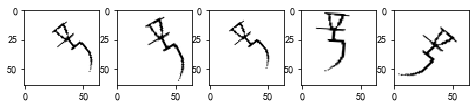

In [90]:
fig = plt.figure(figsize = (8,8))
n_rows = 5
n_cols = 5

filepath = df_jiaguwen.iloc[2].filepath
img_char = image.load_img(filepath, target_size = (64, 64))
arr_char = image.img_to_array(img_char)
x = np.array([arr_char])

i = 0
for batch in datagen.flow(x, batch_size = 1):
    i = i + 1
    ax = fig.add_subplot(n_rows, n_cols, i)
    ax.imshow(image.array_to_img(batch[0]))
    
    if i >= n_cols:
        break

In [91]:
df_jiaguwen.head()

,character,category,url,filepath,character_encoder
0,一,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E000.svg,hanzi_img/一\jiaguwen-41_E000.jpg,0
12,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/43_EE62.svg,hanzi_img/乂\jiaguwen-43_EE62.jpg,25
16,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECB1.svg,hanzi_img/乂\jiaguwen-41_ECB1.jpg,25
19,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECA8.svg,hanzi_img/乂\jiaguwen-41_ECA8.jpg,25
20,入,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_E7C5.svg,hanzi_img/入\jiaguwen-42_E7C5.jpg,107


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
label_encoder = LabelEncoder()
character_encoder = label_encoder.fit_transform(df_jiaguwen['character'])


In [94]:
character_encoder

array([ 0, 25, 25, ..., 33, 33, 33])

In [95]:
df_jiaguwen['character_encoder'] = character_encoder

C:\Users\jiang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_jiaguwen[:10]

,character,category,url,filepath,character_encoder
0,一,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E000.svg,hanzi_img/一\jiaguwen-41_E000.jpg,0
12,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/43_EE62.svg,hanzi_img/乂\jiaguwen-43_EE62.jpg,25
16,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECB1.svg,hanzi_img/乂\jiaguwen-41_ECB1.jpg,25
19,乂,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_ECA8.svg,hanzi_img/乂\jiaguwen-41_ECA8.jpg,25
20,入,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_E7C5.svg,hanzi_img/入\jiaguwen-42_E7C5.jpg,107
25,入,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_E7D4.svg,hanzi_img/入\jiaguwen-42_E7D4.jpg,107
28,人,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_F47D.svg,hanzi_img/人\jiaguwen-42_F47D.jpg,59
34,人,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_F47E.svg,hanzi_img/人\jiaguwen-42_F47E.jpg,59
37,人,jiaguwen,https://img.zdic.net/zy/jiaguwen/42_F47F.svg,hanzi_img/人\jiaguwen-42_F47F.jpg,59
40,八,jiaguwen,https://img.zdic.net/zy/jiaguwen/41_E38E.svg,hanzi_img/八\jiaguwen-41_E38E.jpg,108


In [97]:
df_jiaguwen.to_csv('jiaguwen.csv', index = False)

In [98]:
train_datagen = image.ImageDataGenerator(rescale = 1.0/255)
validation_datagen = image.ImageDataGenerator(rescale = 1.0/255)
test_datagen = image.ImageDataGenerator(rescale = 1.0/255)


In [99]:
train_generator = train_datagen.flow_from_directory('./train', batch_size = 32, target_size=(64,64))
validation_generator = train_datagen.flow_from_directory('./validation', batch_size = 32, target_size=(64,64))
test_generator = train_datagen.flow_from_directory('./test', batch_size = 32, target_size=(64,64))


Found 38640 images belonging to 1016 classes.
Found 3864 images belonging to 1016 classes.
Found 3864 images belonging to 1016 classes.


### Build Model

In [100]:
import keras
from keras import models, layers

In [101]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

#model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
#model.add(layers.MaxPooling2D(2, 2))

#model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1016, activation='relu'))


In [102]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 2048)             

### Model encode

In [103]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

In [104]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 3,
    
    validation_data = validation_generator,
    validation_steps = 20
)


Epoch 1/3
50/50 [==============================] - 34s 685ms/step - loss: 15.6020 - acc: 6.2500e-04 - val_loss: 15.2779 - val_acc: 0.0016
Epoch 2/3
50/50 [==============================] - 40s 810ms/step - loss: 15.6663 - acc: 0.0019 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/3
50/50 [==============================] - 39s 773ms/step - loss: 15.8056 - acc: 0.0000e+00 - val_loss: 15.7022 - val_acc: 0.0000e+00
